In [1]:
!pip install -U numpy
!pip install -U pandas
!pip install -U openpyxl
!pip install -U seaborn
!pip install -U matplotlib
!pip install -U scikit-learn
!pip install -U shap
!pip install -U xgboost

In [2]:
import numpy as np
import pandas as pd
import openpyxl as xl
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 
import shap
import edvart

# Data processing  

In [3]:
excel_path = r"../../static/mock/antibio_data/16.04.2024_Arbanas.xlsx"
artifacts_path = r"../../static/mock/antibio_artifacts/"
version = "0.2"

In [4]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df = tables_dict["Table1"]['dataframe']


worksheet name: Sheet1
tables in worksheet: 1
table name: Table1


In [5]:
df.columns

Index(['Type', 'RE', 'Образец', 'DФЗ', 'D,%', 'Dc', 'температура насыщения',
       'обьем кристаллизатора. мл ', 'длительность роста. час',
       'скорость перемешивания', 'плотность раствора. ', 'масса допанта ',
       'масса исходной соли', 'масса воды. г', 'концентрация допанта,', 'СМ',
       'сектор роста', 'масса кристалла', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6',
       'D7', 'D8'],
      dtype='object')

In [6]:
X = df.drop(["RE", "D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", 'Образец'], axis=1)
y = df[["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8"]]
X.shape, y.shape

((14, 16), (14, 8))

In [7]:
# X['сектор роста'] = X['сектор роста'].astype("category")
# X['Type'] = X['Type'].astype("category")
X.dtypes

Type                            int64
DФЗ                           float64
D,%                           float64
Dc                            float64
температура насыщения         float64
обьем кристаллизатора. мл       int64
длительность роста. час         int64
скорость перемешивания          int64
плотность раствора.           float64
масса допанта                 float64
масса исходной соли             int64
масса воды. г                   int64
концентрация допанта,         float64
СМ                            float64
сектор роста                    int64
масса кристалла               float64
dtype: object

# Table of Contents
---

 * [Overview](#d87673ab-6d28-4514-b706-52189dc7a537)

	 * [Quick Info](#2eef03a3-4407-4dc8-a04e-c47fbad9a856)

	 * [Data Types](#33d0a1a8-0037-4b3a-a9df-1841f97079df)

	 * [Data Preview](#7d69b5aa-05bd-4a6f-b379-066fb2a2c219)

	 * [Missing Values](#01f6fe20-5a57-4cc8-b962-d4f3490236f6)

	 * [Rows With Missing Value](#ff76e6e8-94cf-476d-bff7-d02e9b18ebcf)

	 * [Constant Occurrence](#b260cb22-c309-499a-ac0a-c03ca9e219e1)

	 * [Duplicate Rows](#eacea017-4118-47b8-b6ae-9ec3378f0652)

 * [Univariate Analysis](#ba3df07b-c087-4aed-81bb-1eb69f61d6b3)

 * [Bivariate analysis](#0bc2ca0e-1e25-46f6-a771-ae45998b92a1)

	 * [Correlation Plot](#7f460d3b-e9f9-4e95-bb05-95d26dcff078)

	 * [Pairplot](#32be6685-a2ba-4df5-af36-fc006fa6fc6b)

	 * [Contingency table](#a2d6da98-65b0-4663-b2cf-41dac3ca2ee3)

 * [Multivariate analysis](#6828f38c-2010-4949-a123-6a49dc423c74)

	 * [Principal Component Analysis](#050a75b9-28fe-408e-9210-8a6ebb3048d7)

	 * [Parallel coordinates](#d15571b3-763f-452d-be47-2b876c6885df)

	 * [Parallel categories](#f2d2d2d1-6935-4f10-b504-e0fd786d2bd3)


# Overview<a id='d87673ab-6d28-4514-b706-52189dc7a537'>
---

## Quick Info<a id='2eef03a3-4407-4dc8-a04e-c47fbad9a856'>

Rows                     14
Columns                  26
Missing cells   17 (4.67 %)
Zeros           13 (3.57 %)
Duplicate rows   0 (0.00 %)

## Data Types<a id='33d0a1a8-0037-4b3a-a9df-1841f97079df'>

## Data Preview<a id='7d69b5aa-05bd-4a6f-b379-066fb2a2c219'>

### First rows

Type          RE  Образец  DФЗ   D,%    Dc  температура насыщения  \
0     0       α-NSH      1.0  NaN   NaN   NaN                   47.0   
1     1    NSH:S(1)      1.1  2.0  13.0  0.09                   45.5   
2     1    NSH:S(2)      1.2  2.0  13.0  0.09                   47.3   
3     1  NSH:HOT(H)      1.3  2.0  13.0  0.09                   47.0   
4     1  NSH:HOT(D)      1.4  2.0  13.0  0.09                   46.0   

   обьем кристаллизатора. мл   длительность роста. час  \
0                         500                      120   
1                         400                      168   
2                        5000                      192   
3                         500                      744   
4                         500                      120   

   скорость перемешивания  ...  сектор роста  масса кристалла  D1  D2  D3  D4  \
0                      60  ...             0              NaN  35  35  49  43   
1                      62  ...             0              NaN  33  35  38  38   
2                      60  ...             0              NaN  34  34  38  38   
3                      60  ...             0             70.0  35  38  33  33   
4                      60  ...             0             56.0  32  32  35  33   

   D5  D6  D7  D8  
0  40  48  55  50  
1  35  44  62  66  
2  32  48  55  68  
3  40  45  60  60  
4  37  42  45  65  

[5 rows x 26 columns]

### Last rows

Type                RE  Образец  DФЗ   D,%    Dc  температура насыщения  \
9      2     NSHY(2) (001)      2.4  1.0  30.0  0.20                   43.5   
10     2     NSHY(2) (101)      2.5  1.0  30.0  0.20                   43.5   
11     3  NSH:Co (1) (001)      3.1  0.0   6.0  0.02                   40.0   
12     3  NSH:Co (1) (101)      3.2  0.0   6.0  0.02                   40.0   
13     3  NSH:Co (1) (102)      3.3  0.0   6.0  0.02                   40.0   

    обьем кристаллизатора. мл   длительность роста. час  \
9                          500                      144   
10                         500                      144   
11                        5000                      336   
12                        5000                      336   
13                        5000                      336   

    скорость перемешивания  ...  сектор роста  масса кристалла  D1  D2  D3  \
9                       60  ...             1             32.0  41  37  45   
10                      60  ...             2             32.0  39  36  45   
11                      60  ...             1            162.0  48  48  48   
12                      60  ...             2            162.0  47  42  36   
13                      60  ...             3            162.0  36  40  38   

    D4  D5  D6  D7  D8  
9   37  40  45  50  55  
10  38  48  48  55  60  
11  48  46  50  48  68  
12  38  42  44  45  66  
13  37  40  46  48  67  

[5 rows x 26 columns]

### Sample

Type                RE  Образец  DФЗ   D,%    Dc  температура насыщения  \
1      1          NSH:S(1)      1.1  2.0  13.0  0.09                   45.5   
5      1       NSH:HOT(ET)      1.5  2.0  13.0  0.09                   45.0   
8      2       NSHY(1)-102      2.3  1.0  30.0  0.20                   44.1   
12     3  NSH:Co (1) (101)      3.2  0.0   6.0  0.02                   40.0   
11     3  NSH:Co (1) (001)      3.1  0.0   6.0  0.02                   40.0   

    обьем кристаллизатора. мл   длительность роста. час  \
1                          400                      168   
5                          500                      120   
8                         5000                      336   
12                        5000                      336   
11                        5000                      336   

    скорость перемешивания  ...  сектор роста  масса кристалла  D1  D2  D3  \
1                       62  ...             0              NaN  33  35  38   
5                       60  ...             0             68.0  34  33  40   
8                       75  ...             3            269.0  27  26  25   
12                      60  ...             2            162.0  47  42  36   
11                      60  ...             1            162.0  48  48  48   

    D4  D5  D6  D7  D8  
1   38  35  44  62  66  
5   35  35  48  53  65  
8   26  32  27  32  28  
12  38  42  44  45  66  
11  48  46  50  48  68  

[5 rows x 26 columns]

## Missing Values<a id='01f6fe20-5a57-4cc8-b962-d4f3490236f6'>

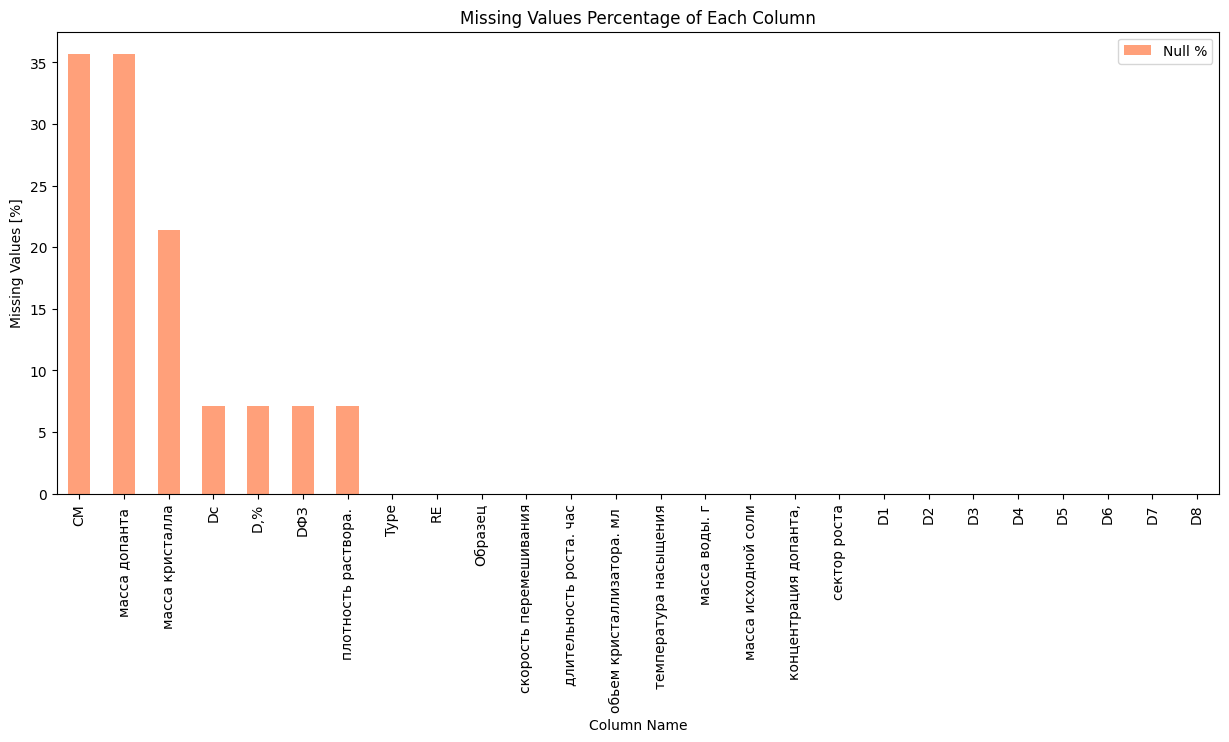

## Rows With Missing Value<a id='ff76e6e8-94cf-476d-bff7-d02e9b18ebcf'>

Missing value column subset   all columns
Missing value row count                11
Missing value row percentage      78.57 %

## Constant Occurrence<a id='b260cb22-c309-499a-ac0a-c03ca9e219e1'>

## Duplicate Rows<a id='eacea017-4118-47b8-b6ae-9ec3378f0652'>

There are no duplicated rows


# Univariate Analysis<a id='ba3df07b-c087-4aed-81bb-1eb69f61d6b3'>
---

## *Type - categorical*

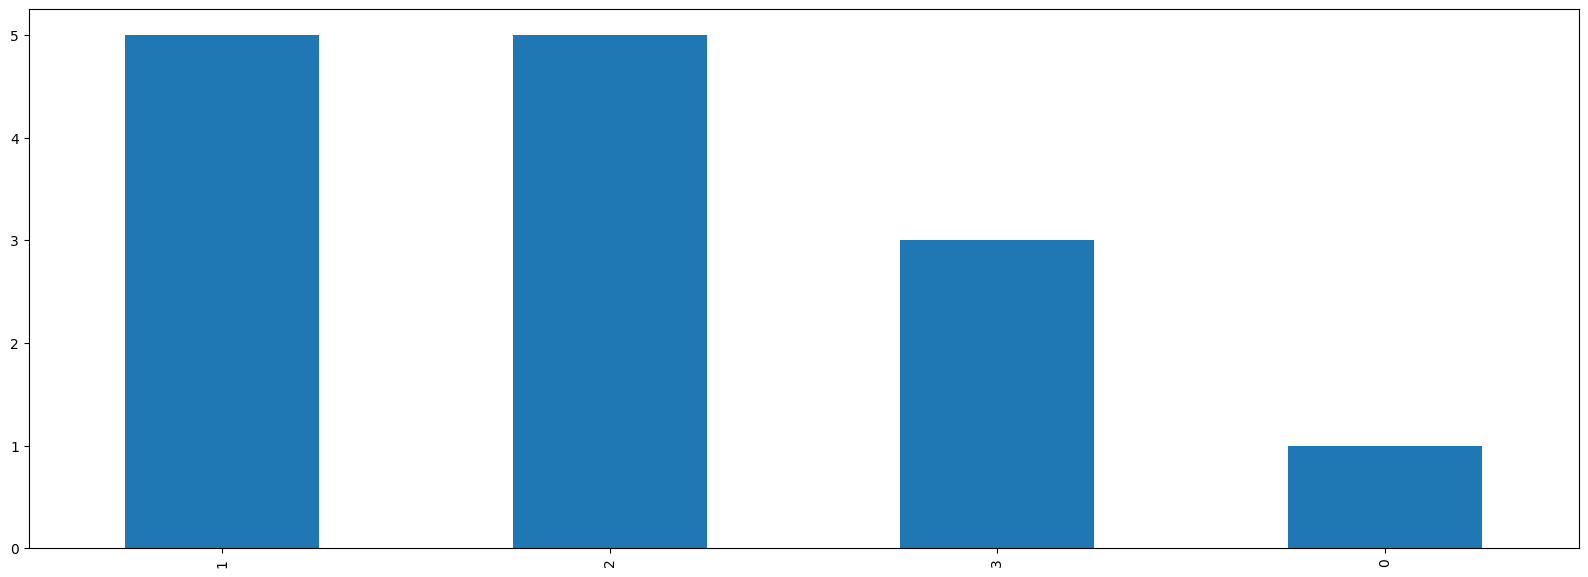

---

## *RE - unique*

Each value in the column is unique.

---

## *Образец - numeric*

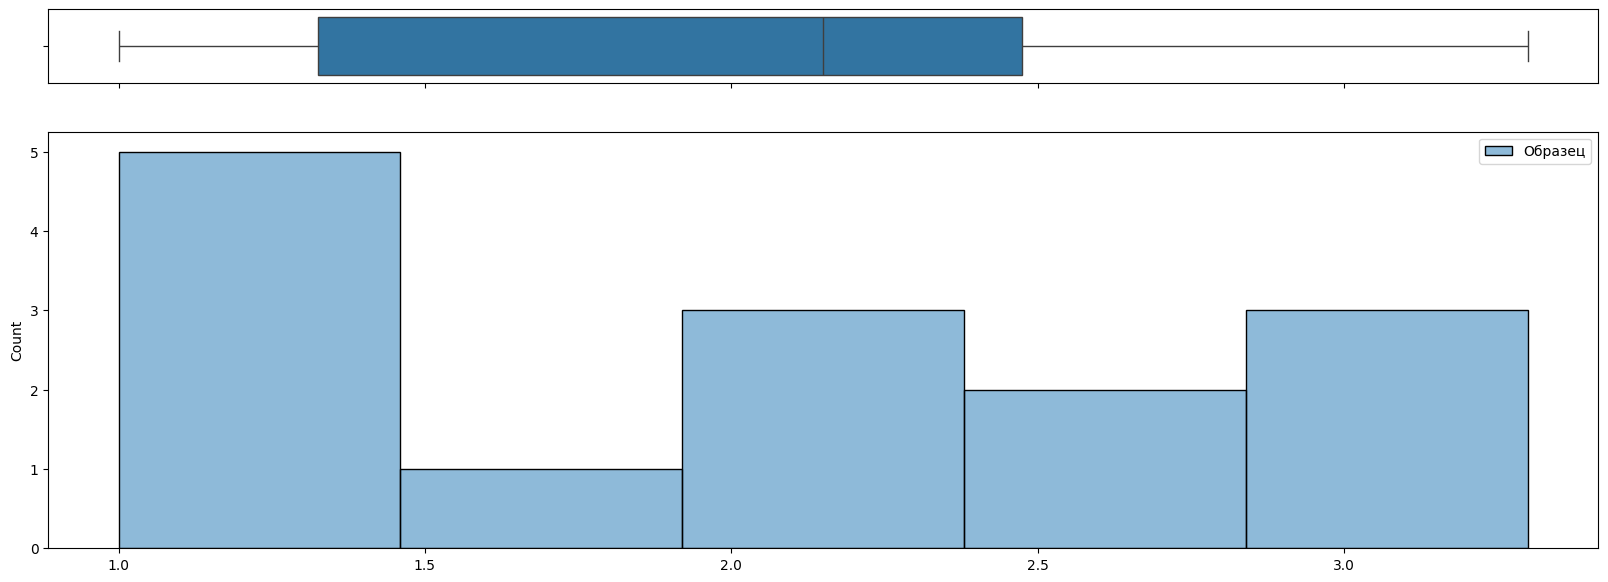

---

## *DФЗ - numeric*

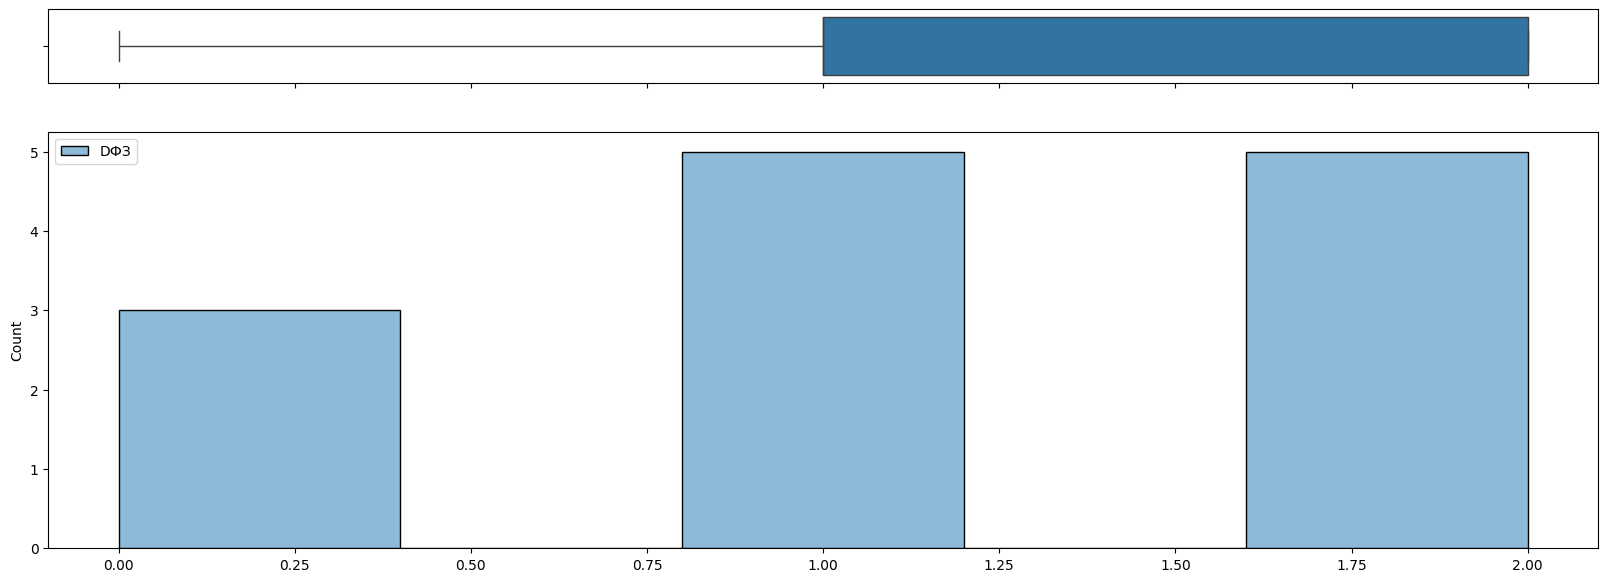

---

## *D,% - numeric*

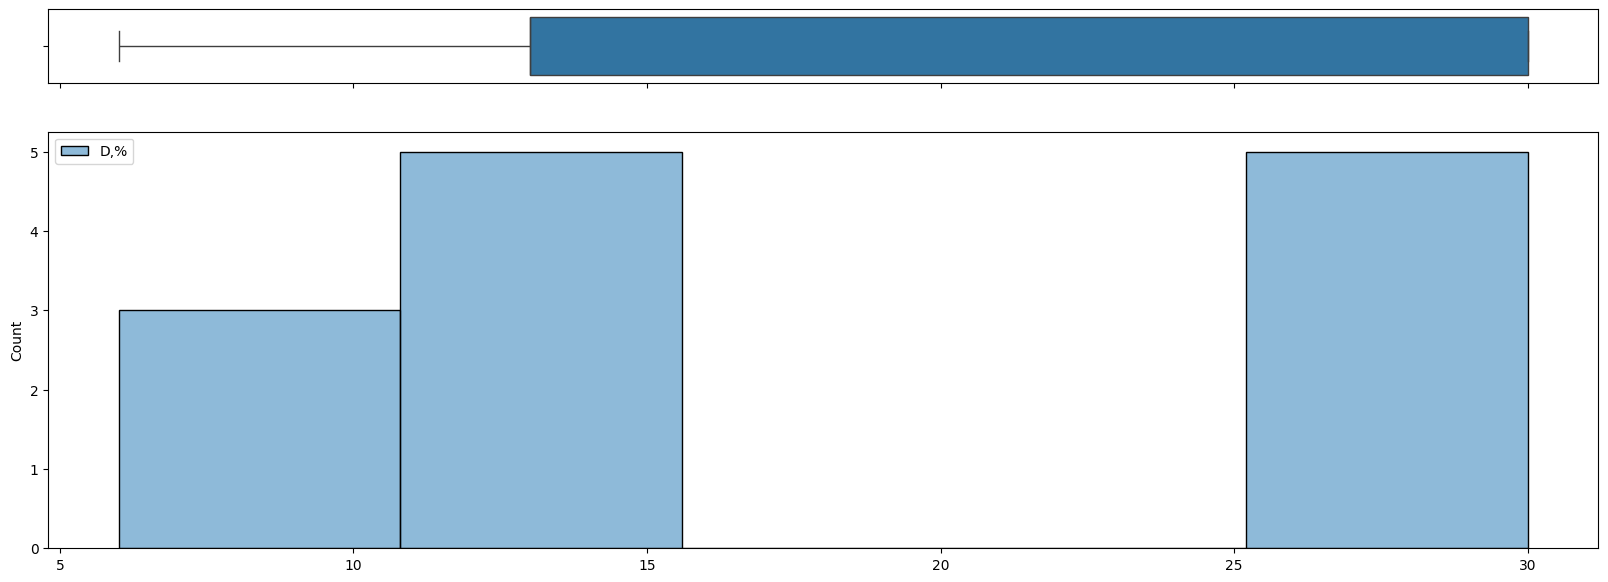

---

## *Dc - numeric*

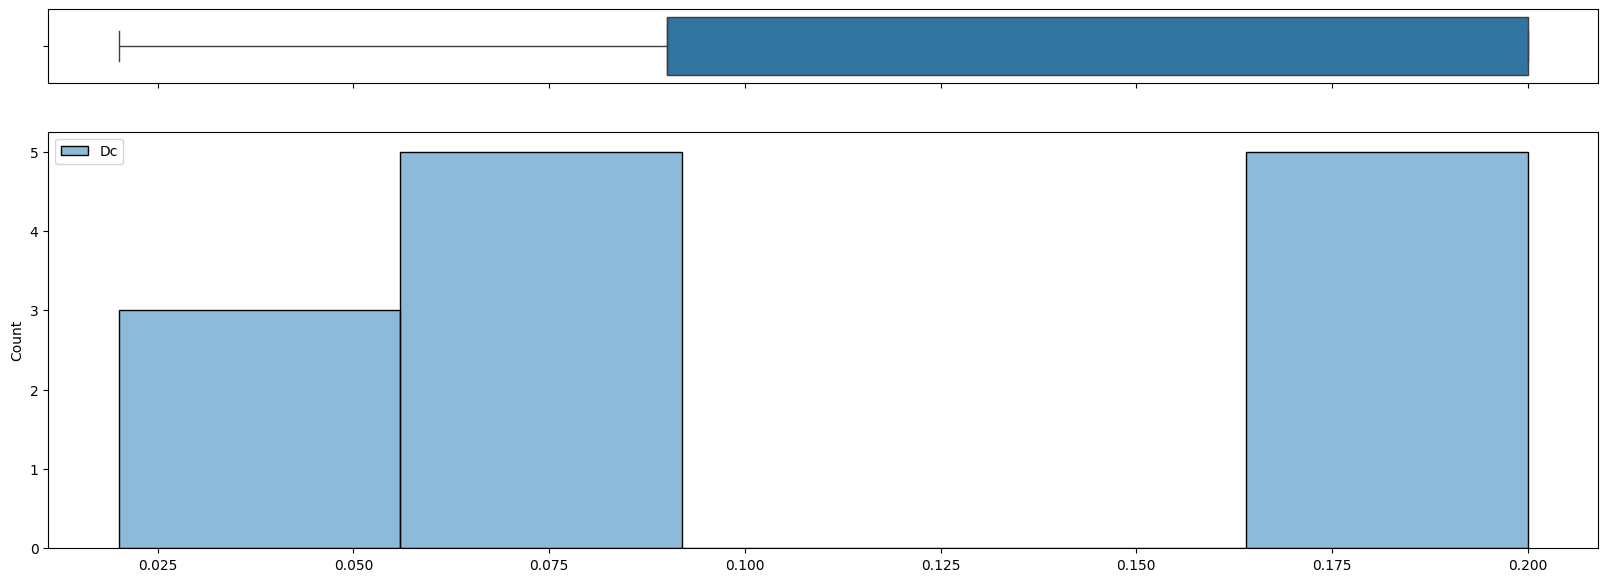

---

## *температура насыщения - numeric*

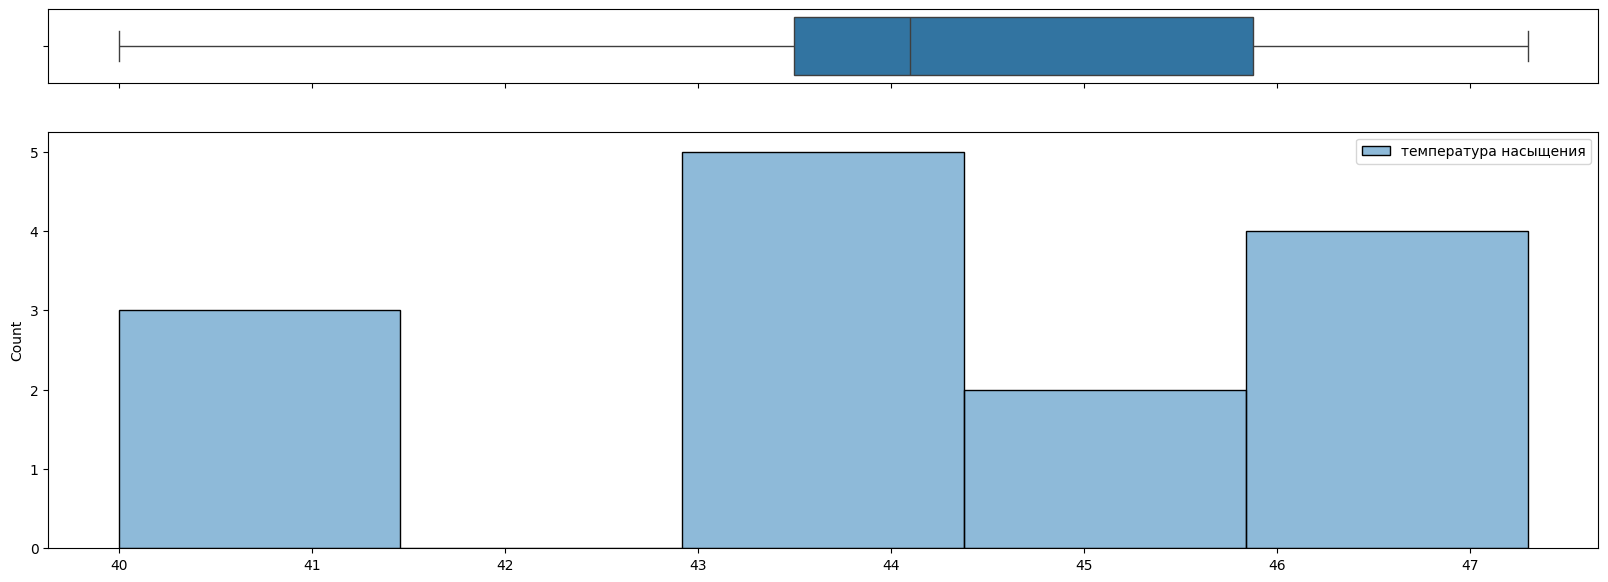

---

## *обьем кристаллизатора. мл  - categorical*

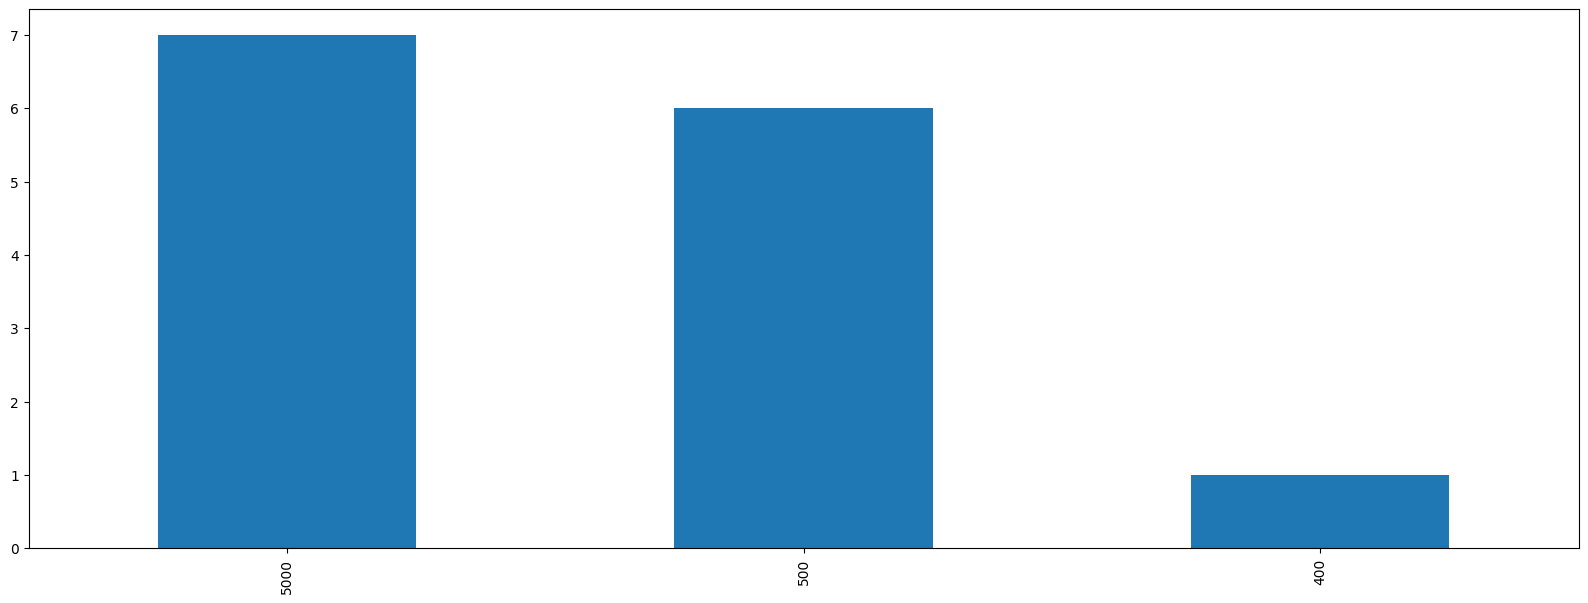

---

## *длительность роста. час - categorical*

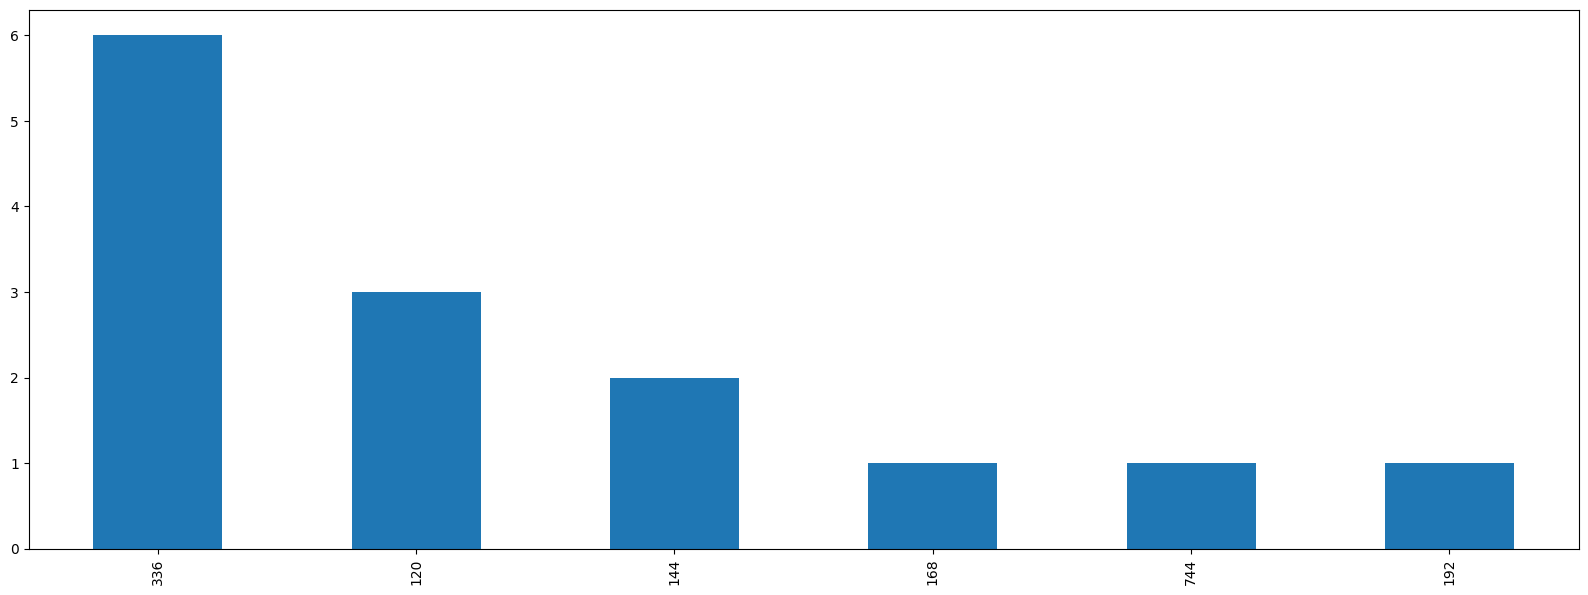

---

## *скорость перемешивания - categorical*

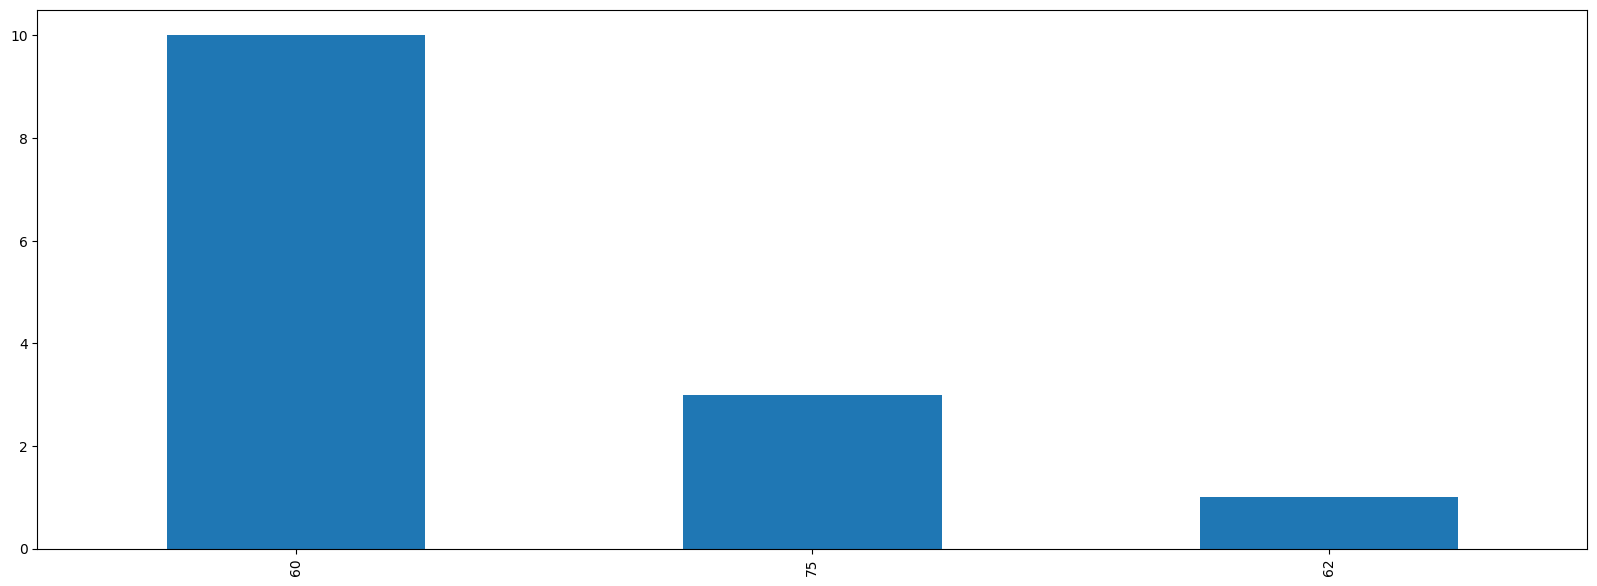

---

## *плотность раствора.  - numeric*

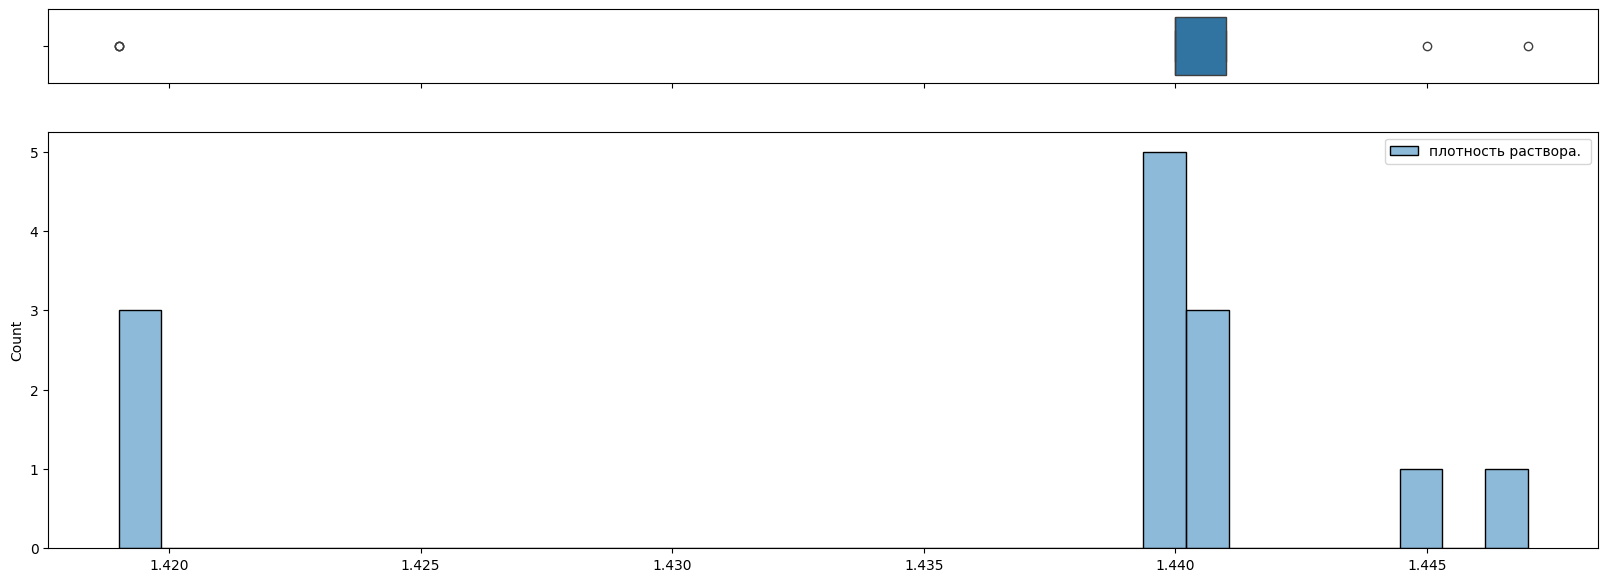

---

## *масса допанта  - numeric*

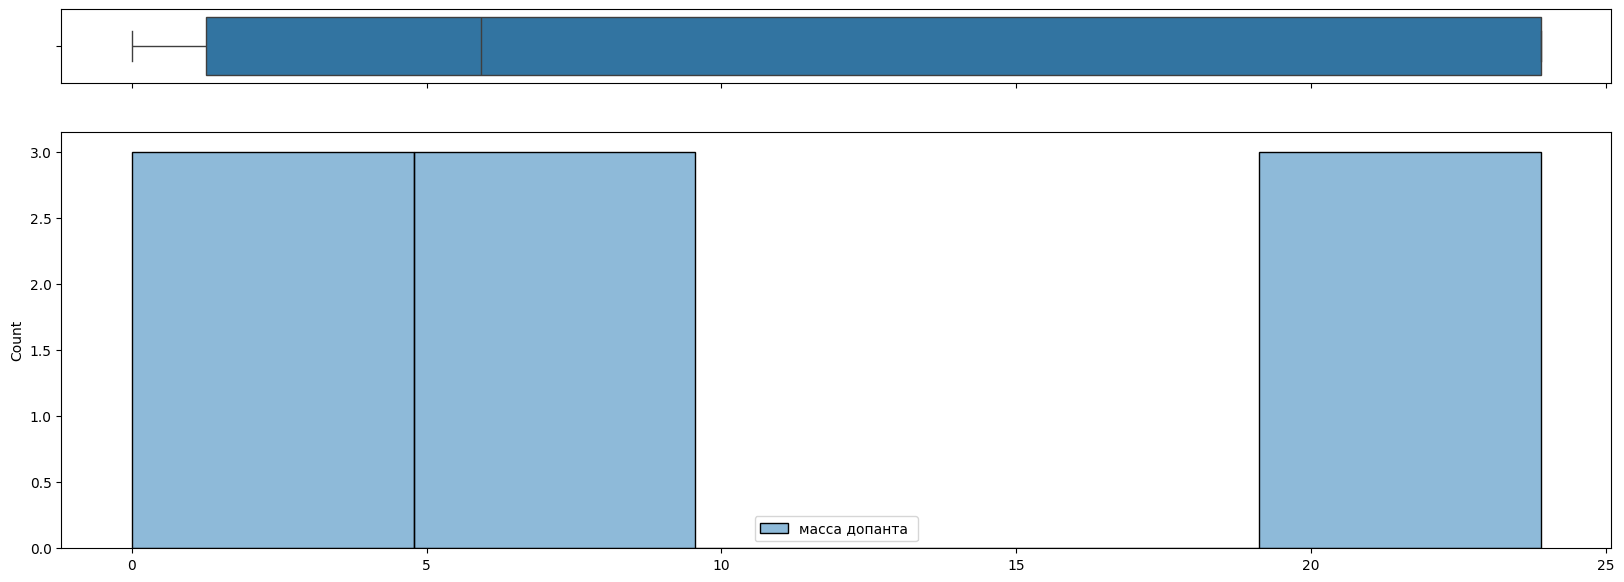

---

## *масса исходной соли - categorical*

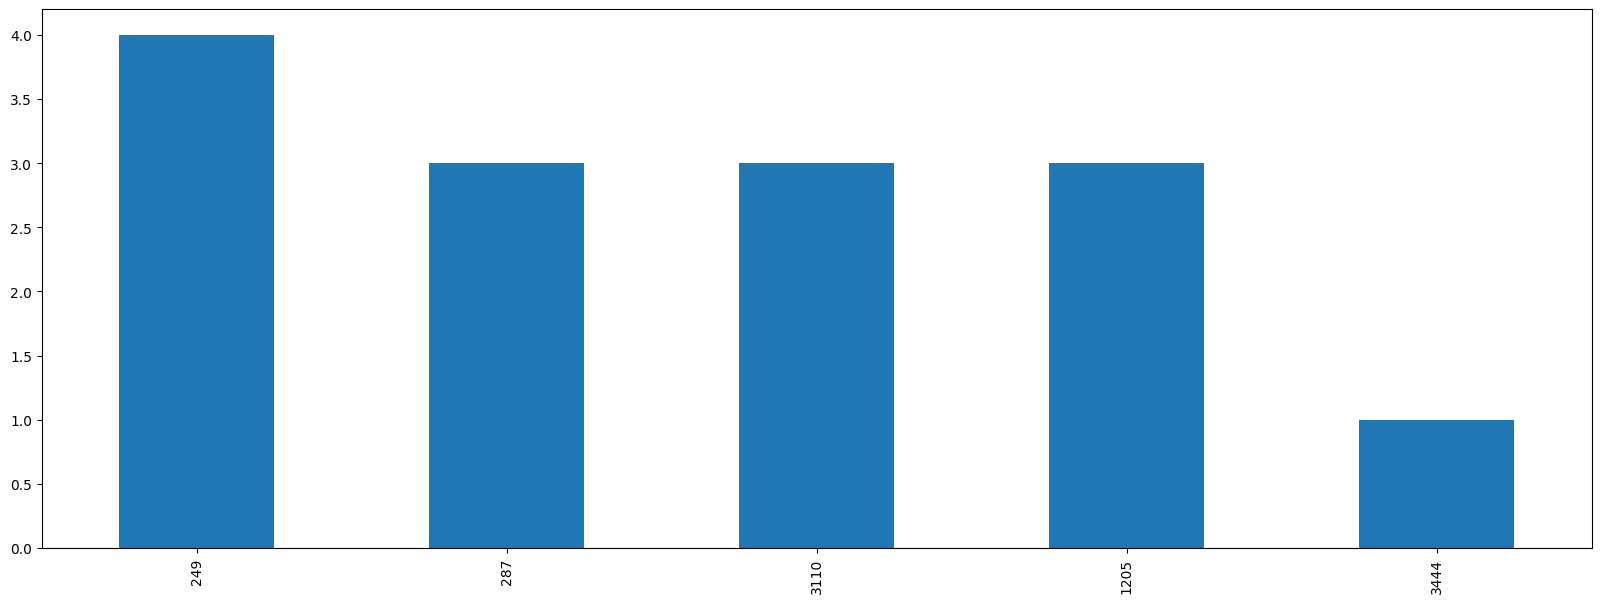

---

## *масса воды. г - categorical*

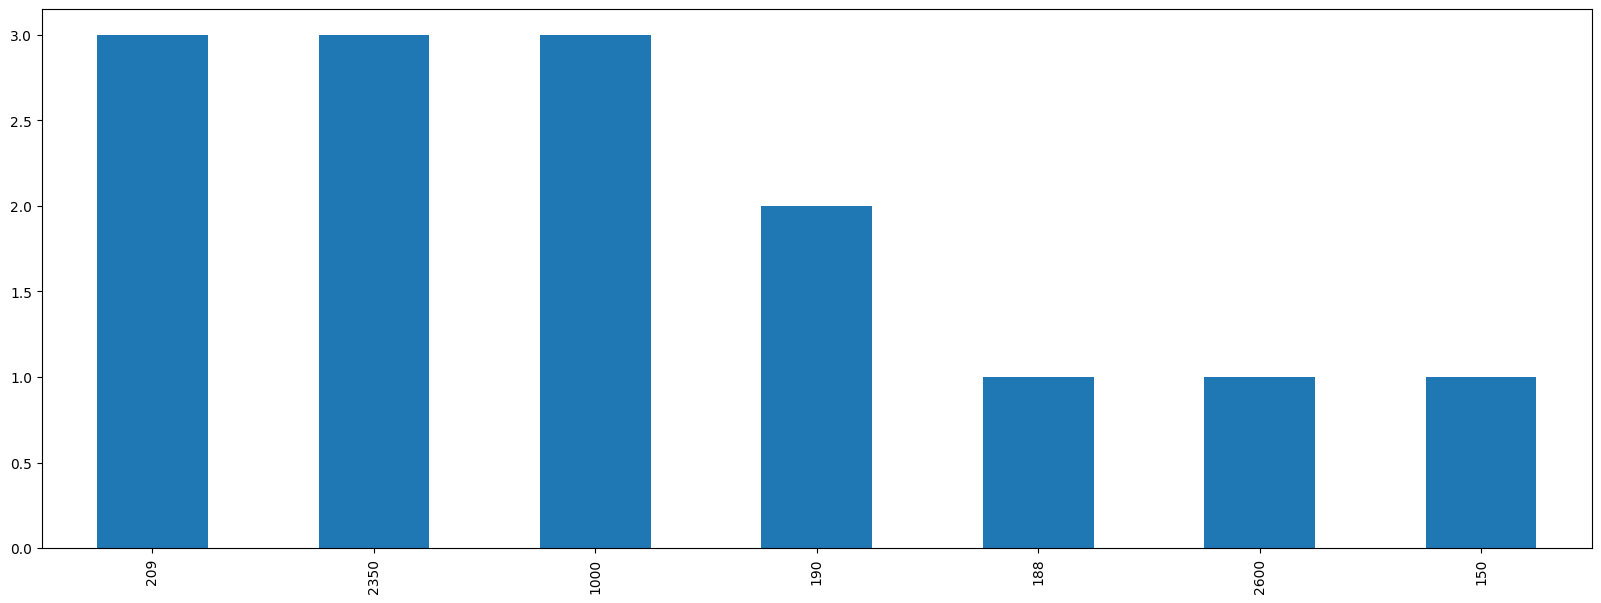

---

## *концентрация допанта, - numeric*

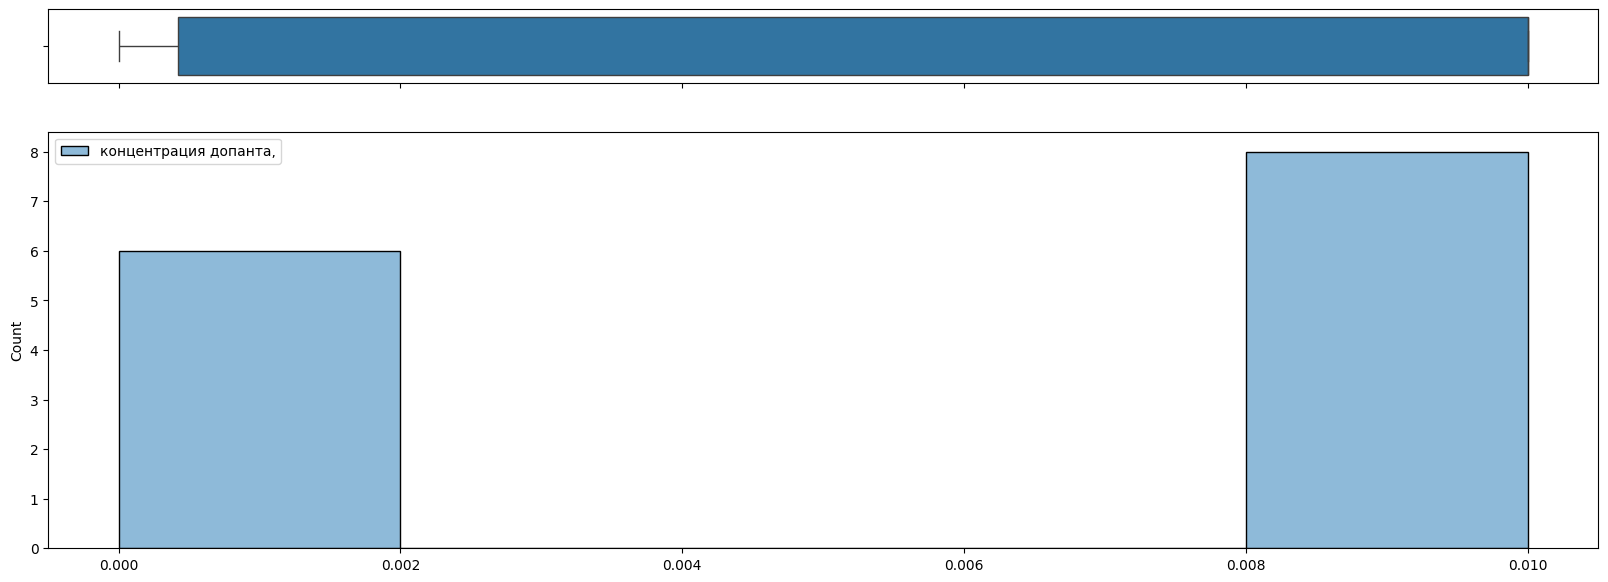

---

## *СМ - numeric*

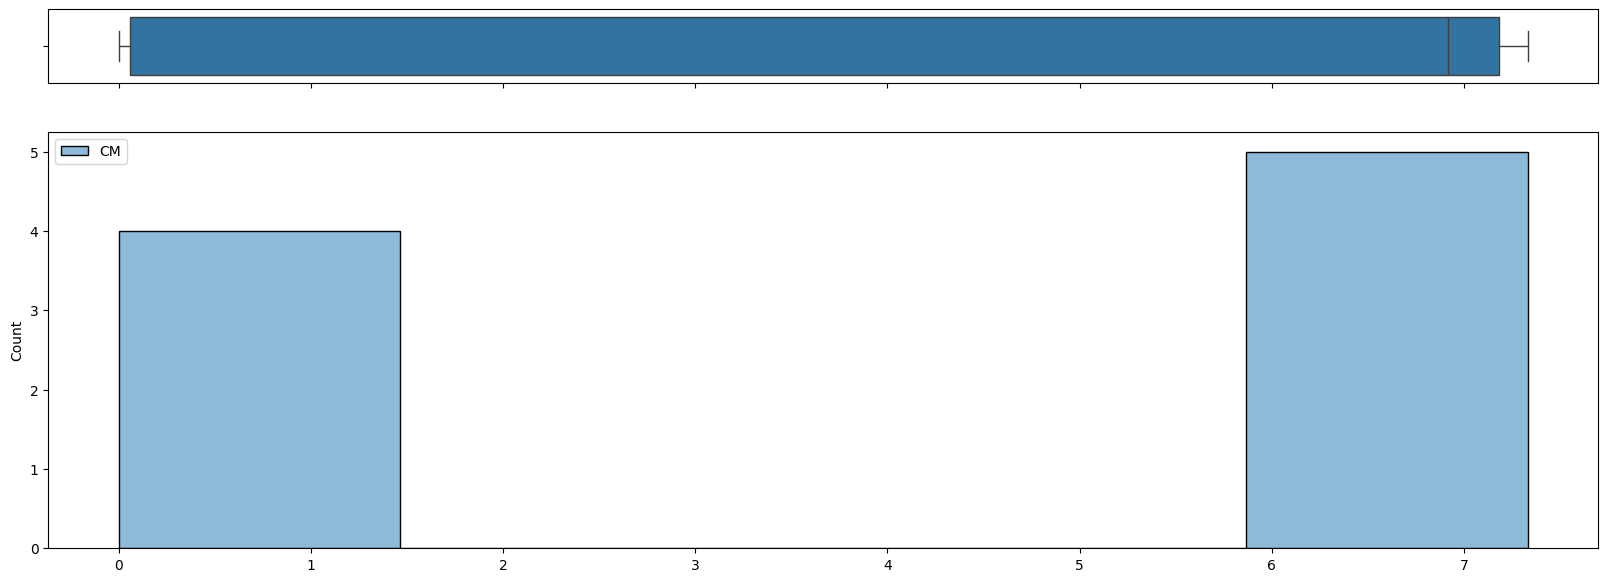

---

## *сектор роста - categorical*

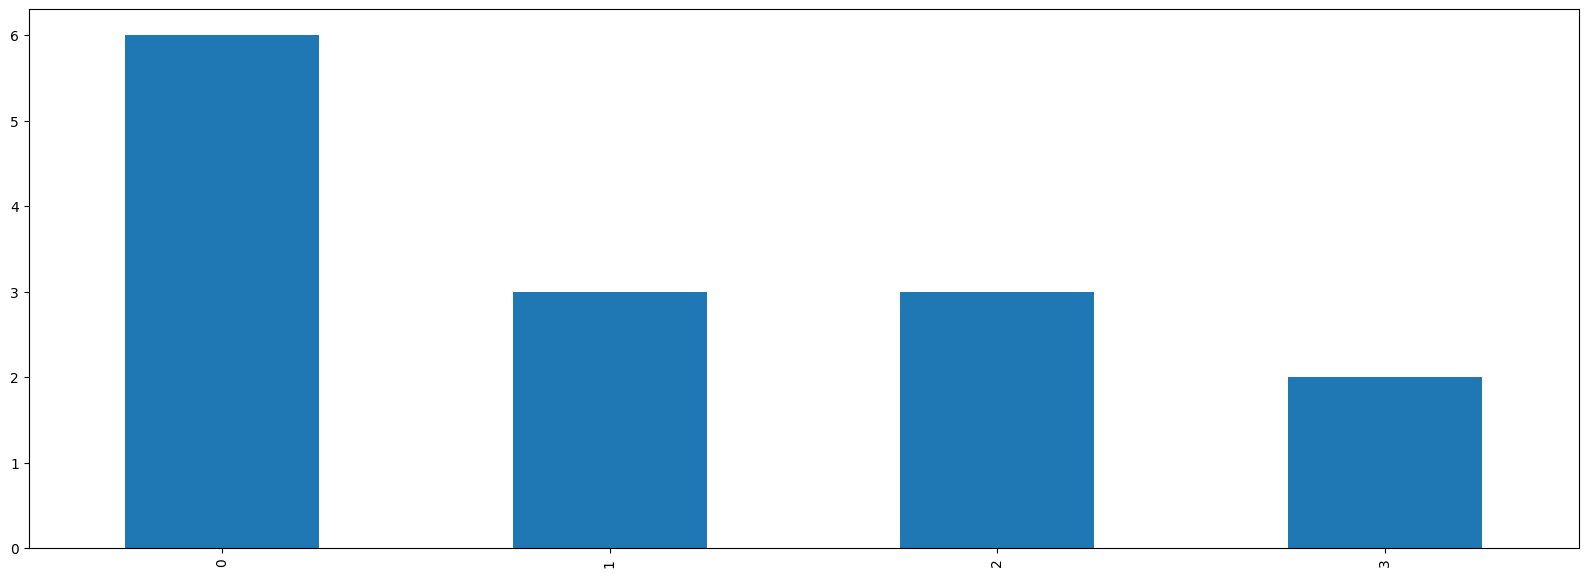

---

## *масса кристалла - numeric*

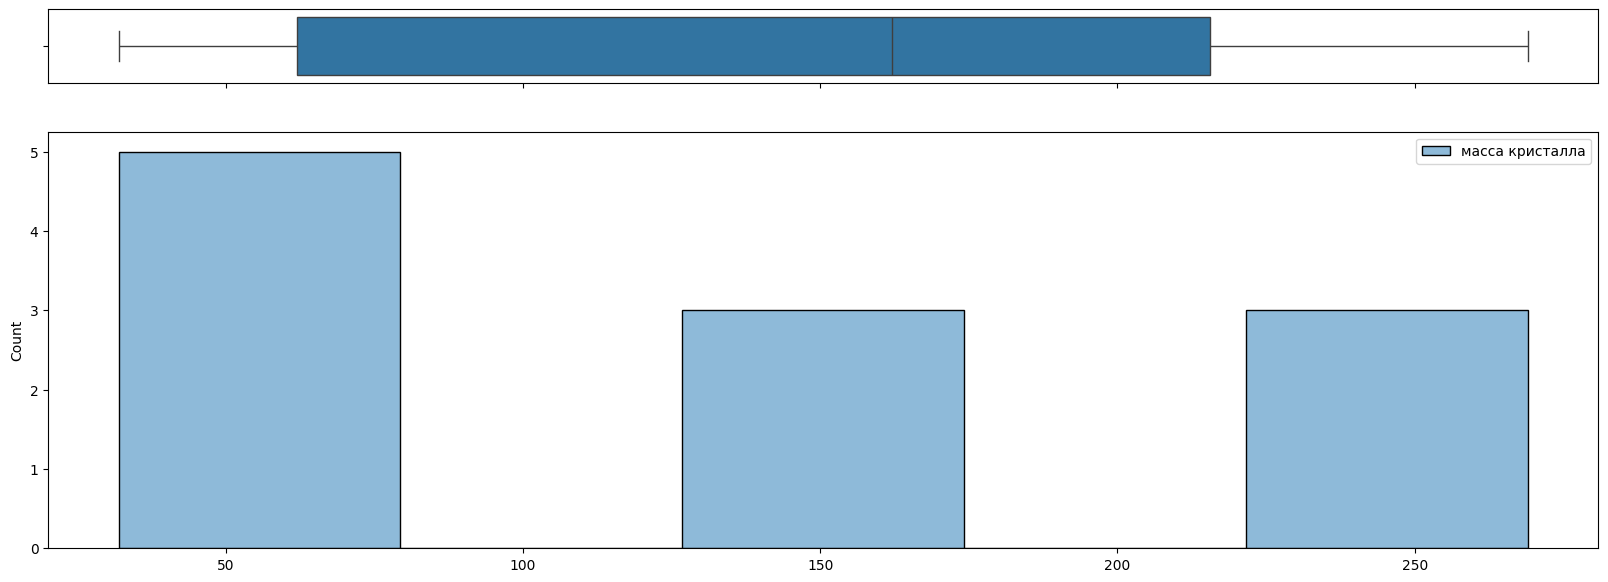

---

## *D1 - numeric*

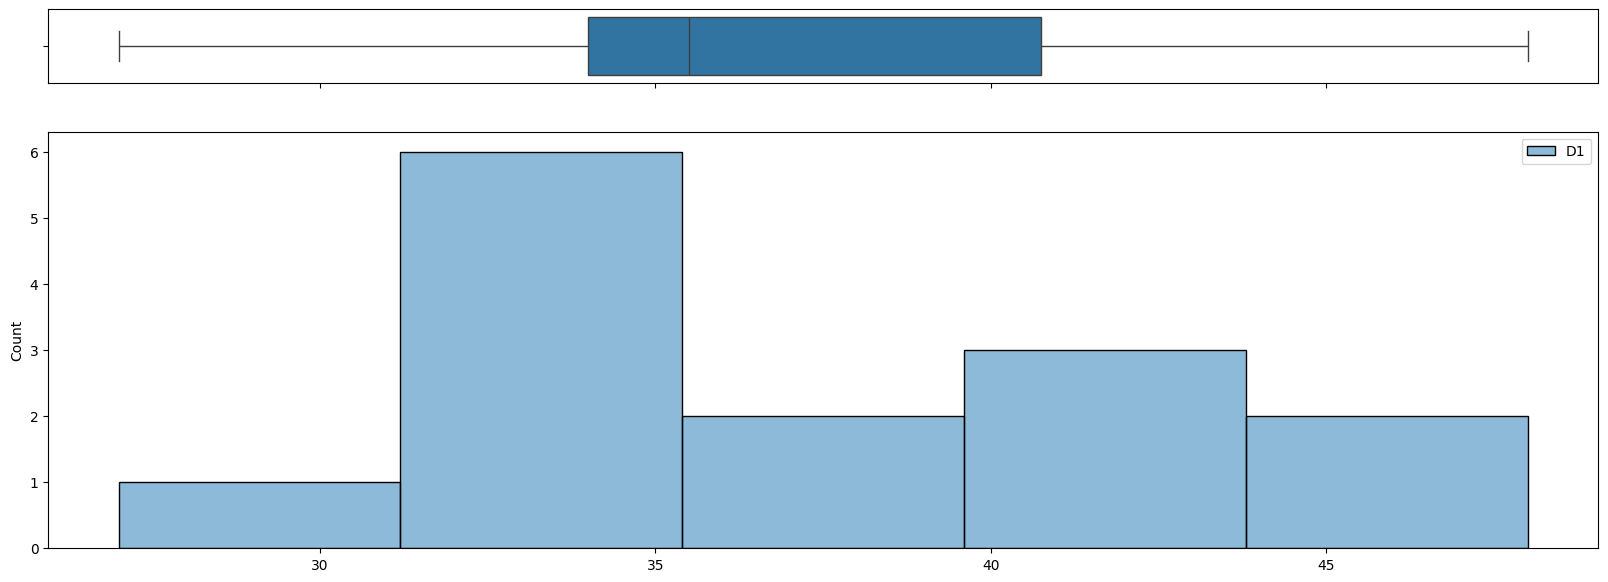

---

## *D2 - numeric*

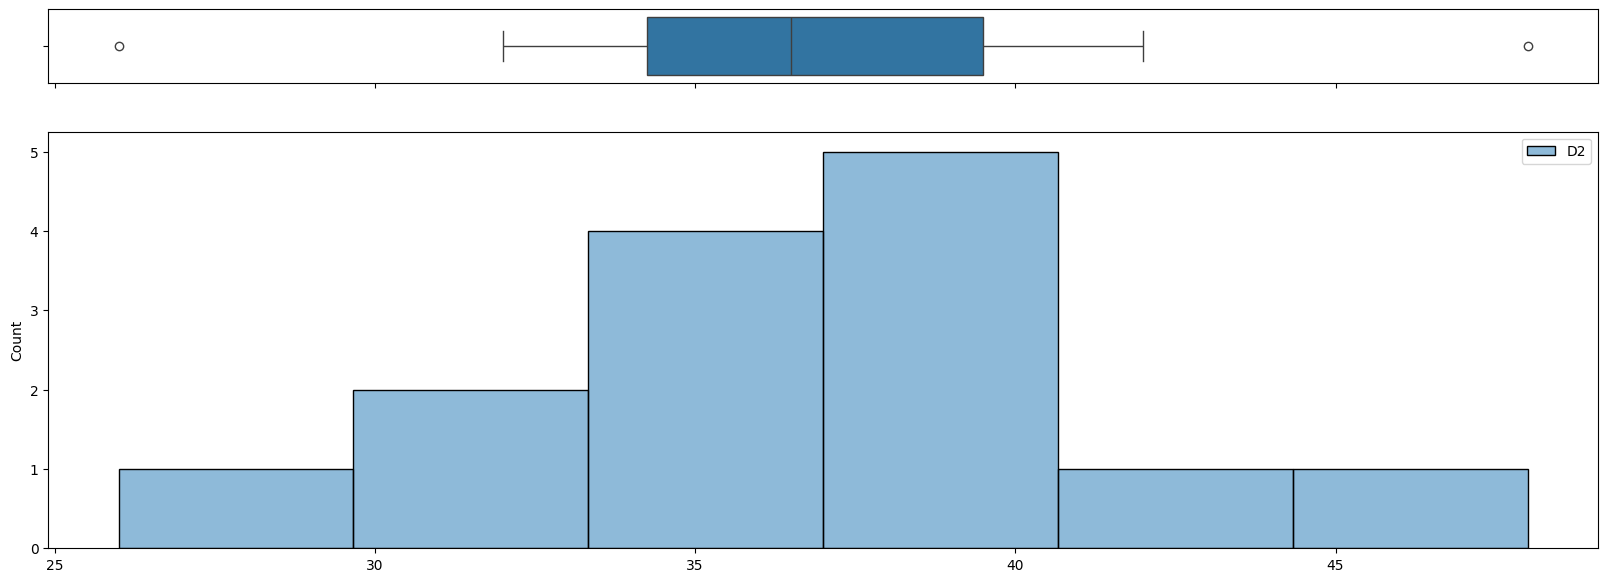

---

## *D3 - categorical*

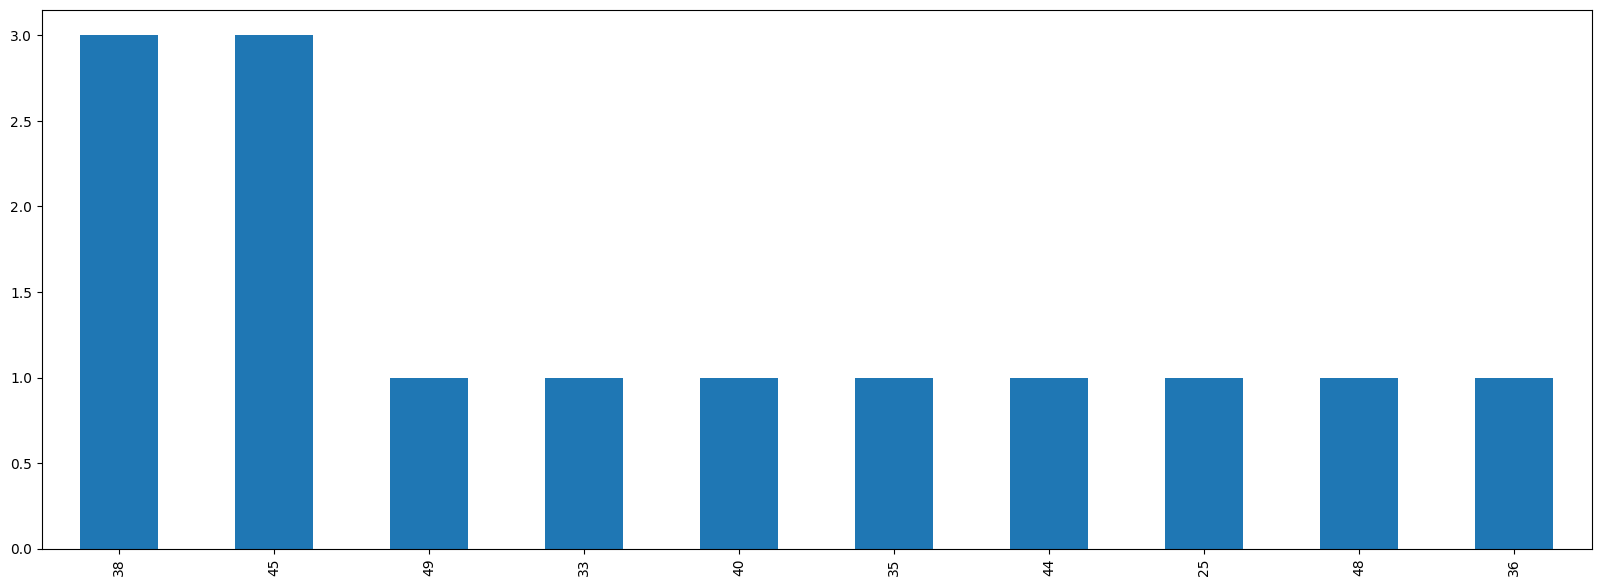

---

## *D4 - categorical*

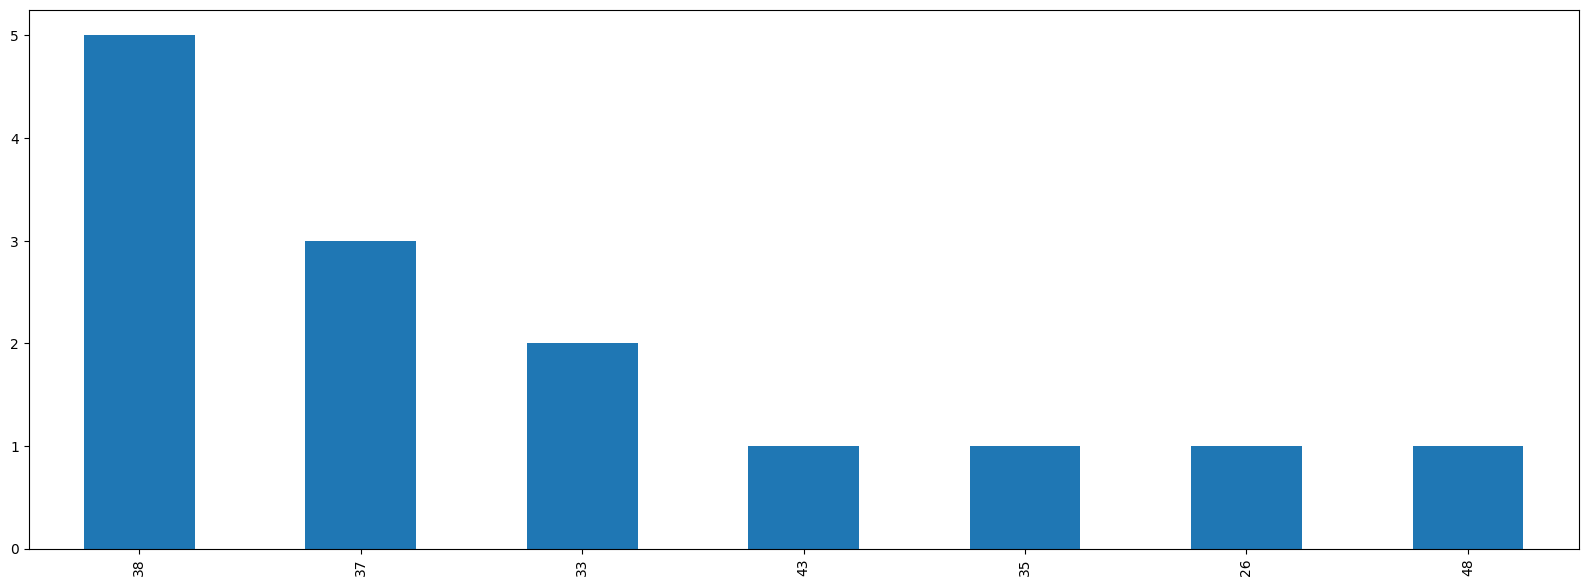

---

## *D5 - categorical*

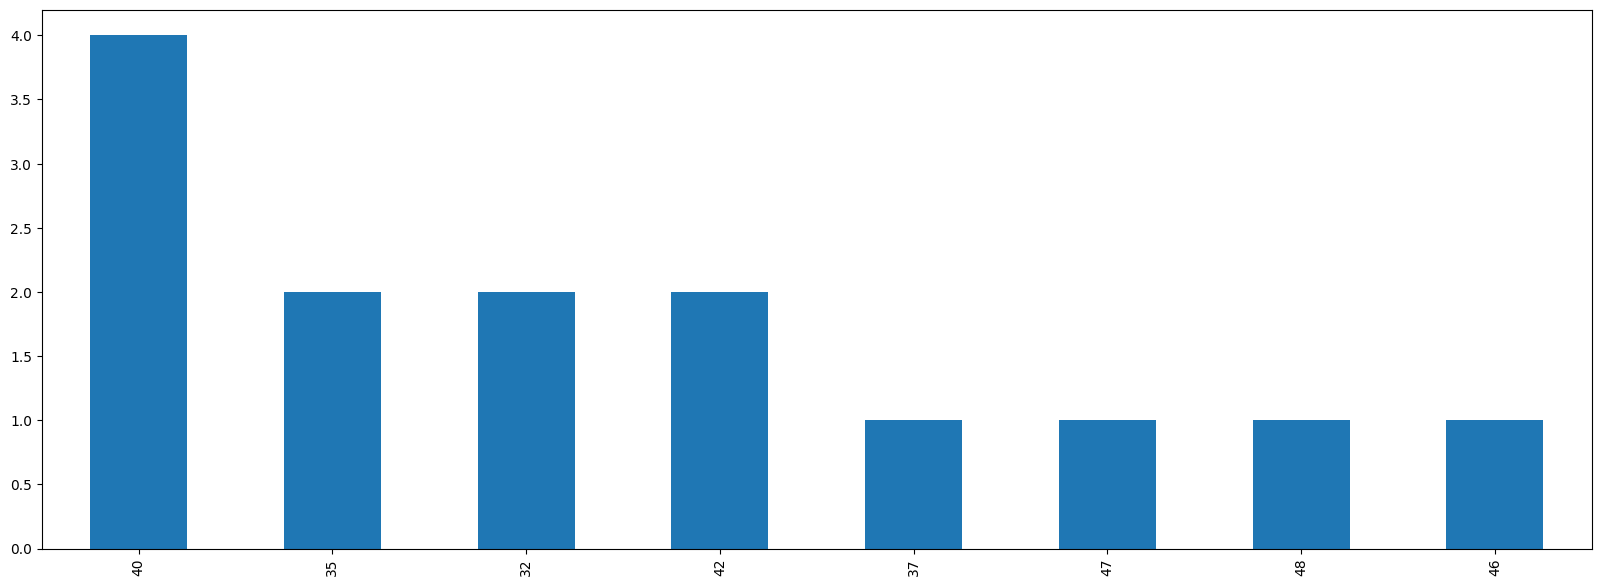

---

## *D6 - categorical*

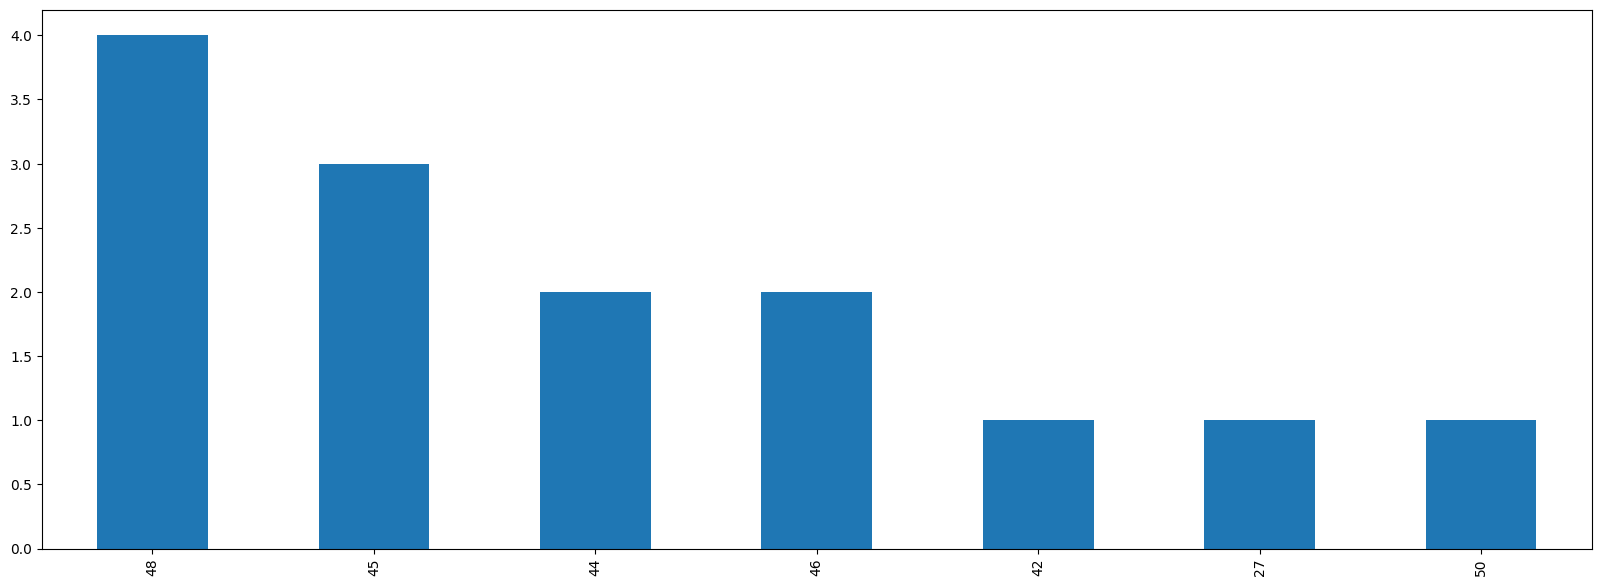

---

## *D7 - categorical*

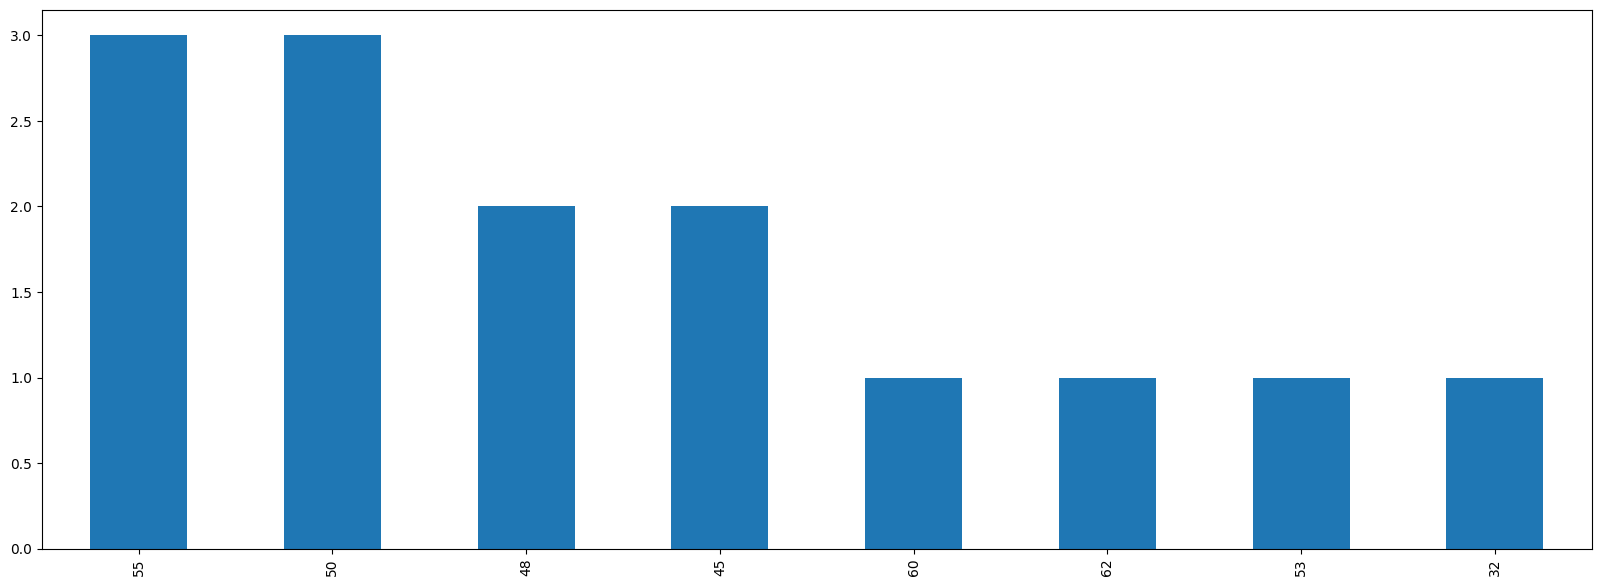

---

## *D8 - categorical*

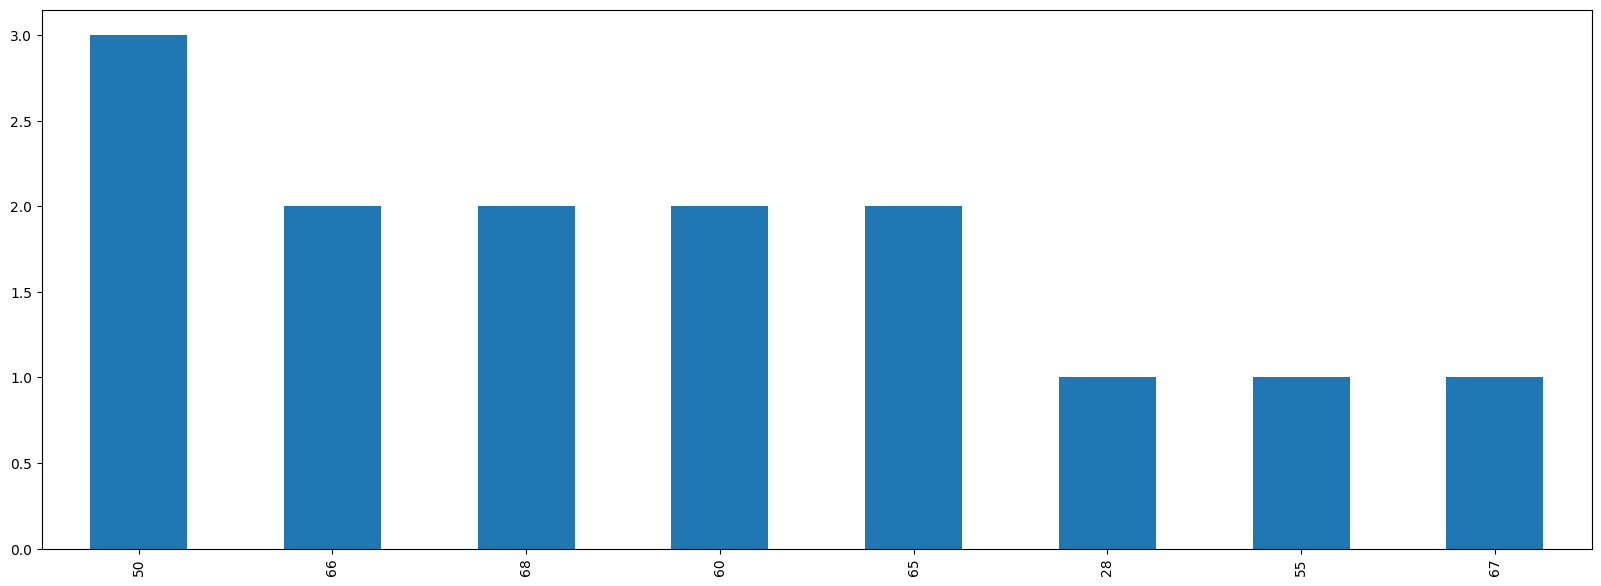

---

# Bivariate analysis<a id='0bc2ca0e-1e25-46f6-a771-ae45998b92a1'>
---

## Correlation Plot<a id='7f460d3b-e9f9-4e95-bb05-95d26dcff078'>

### Pearson Correlation

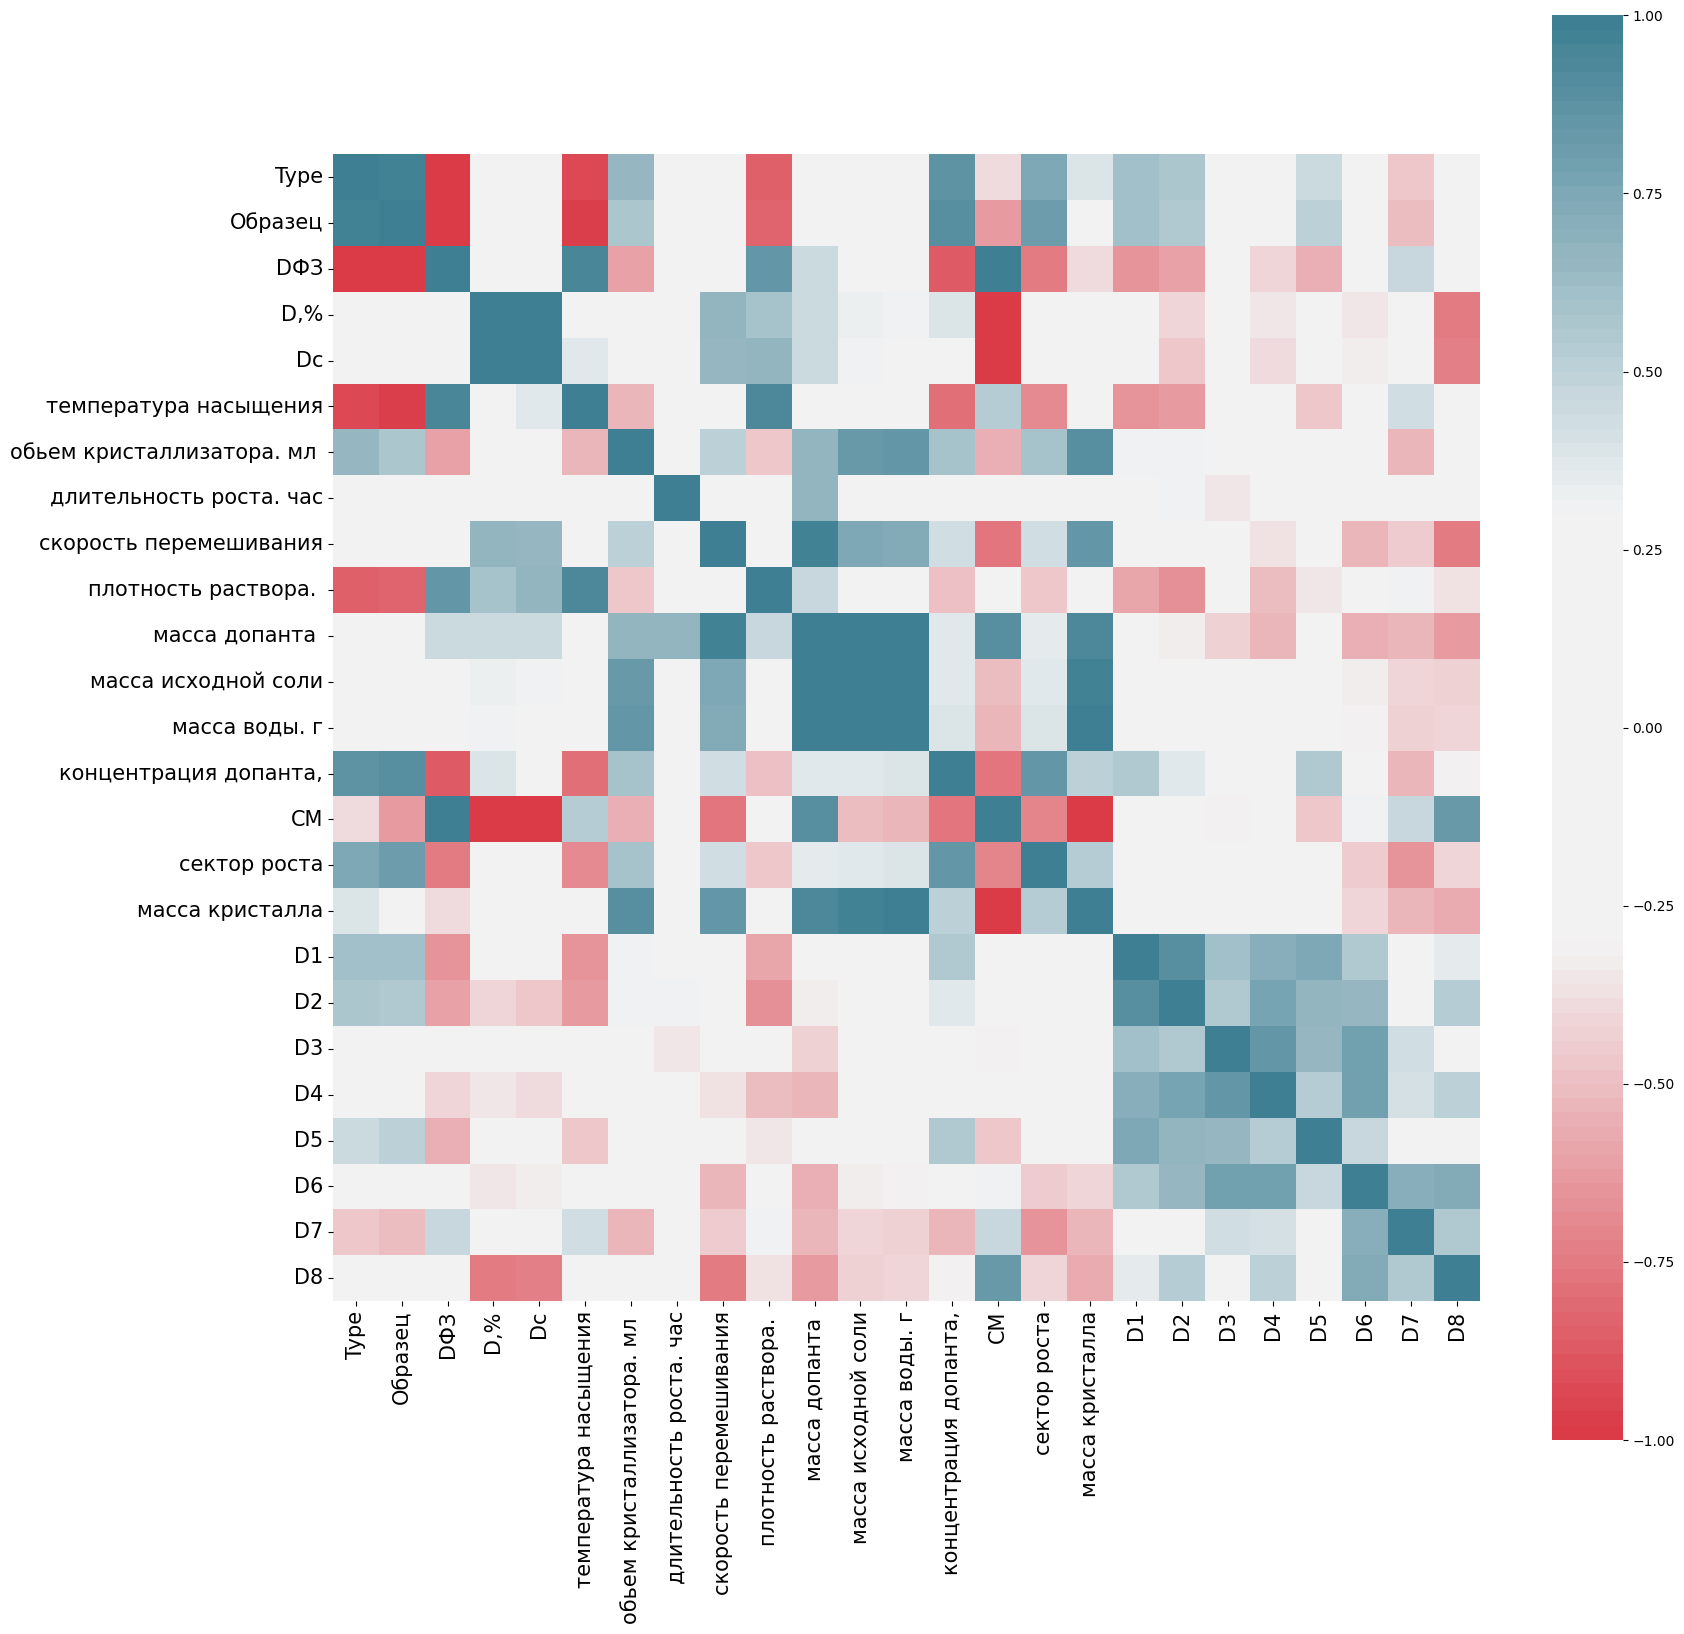

### Spearman Correlation

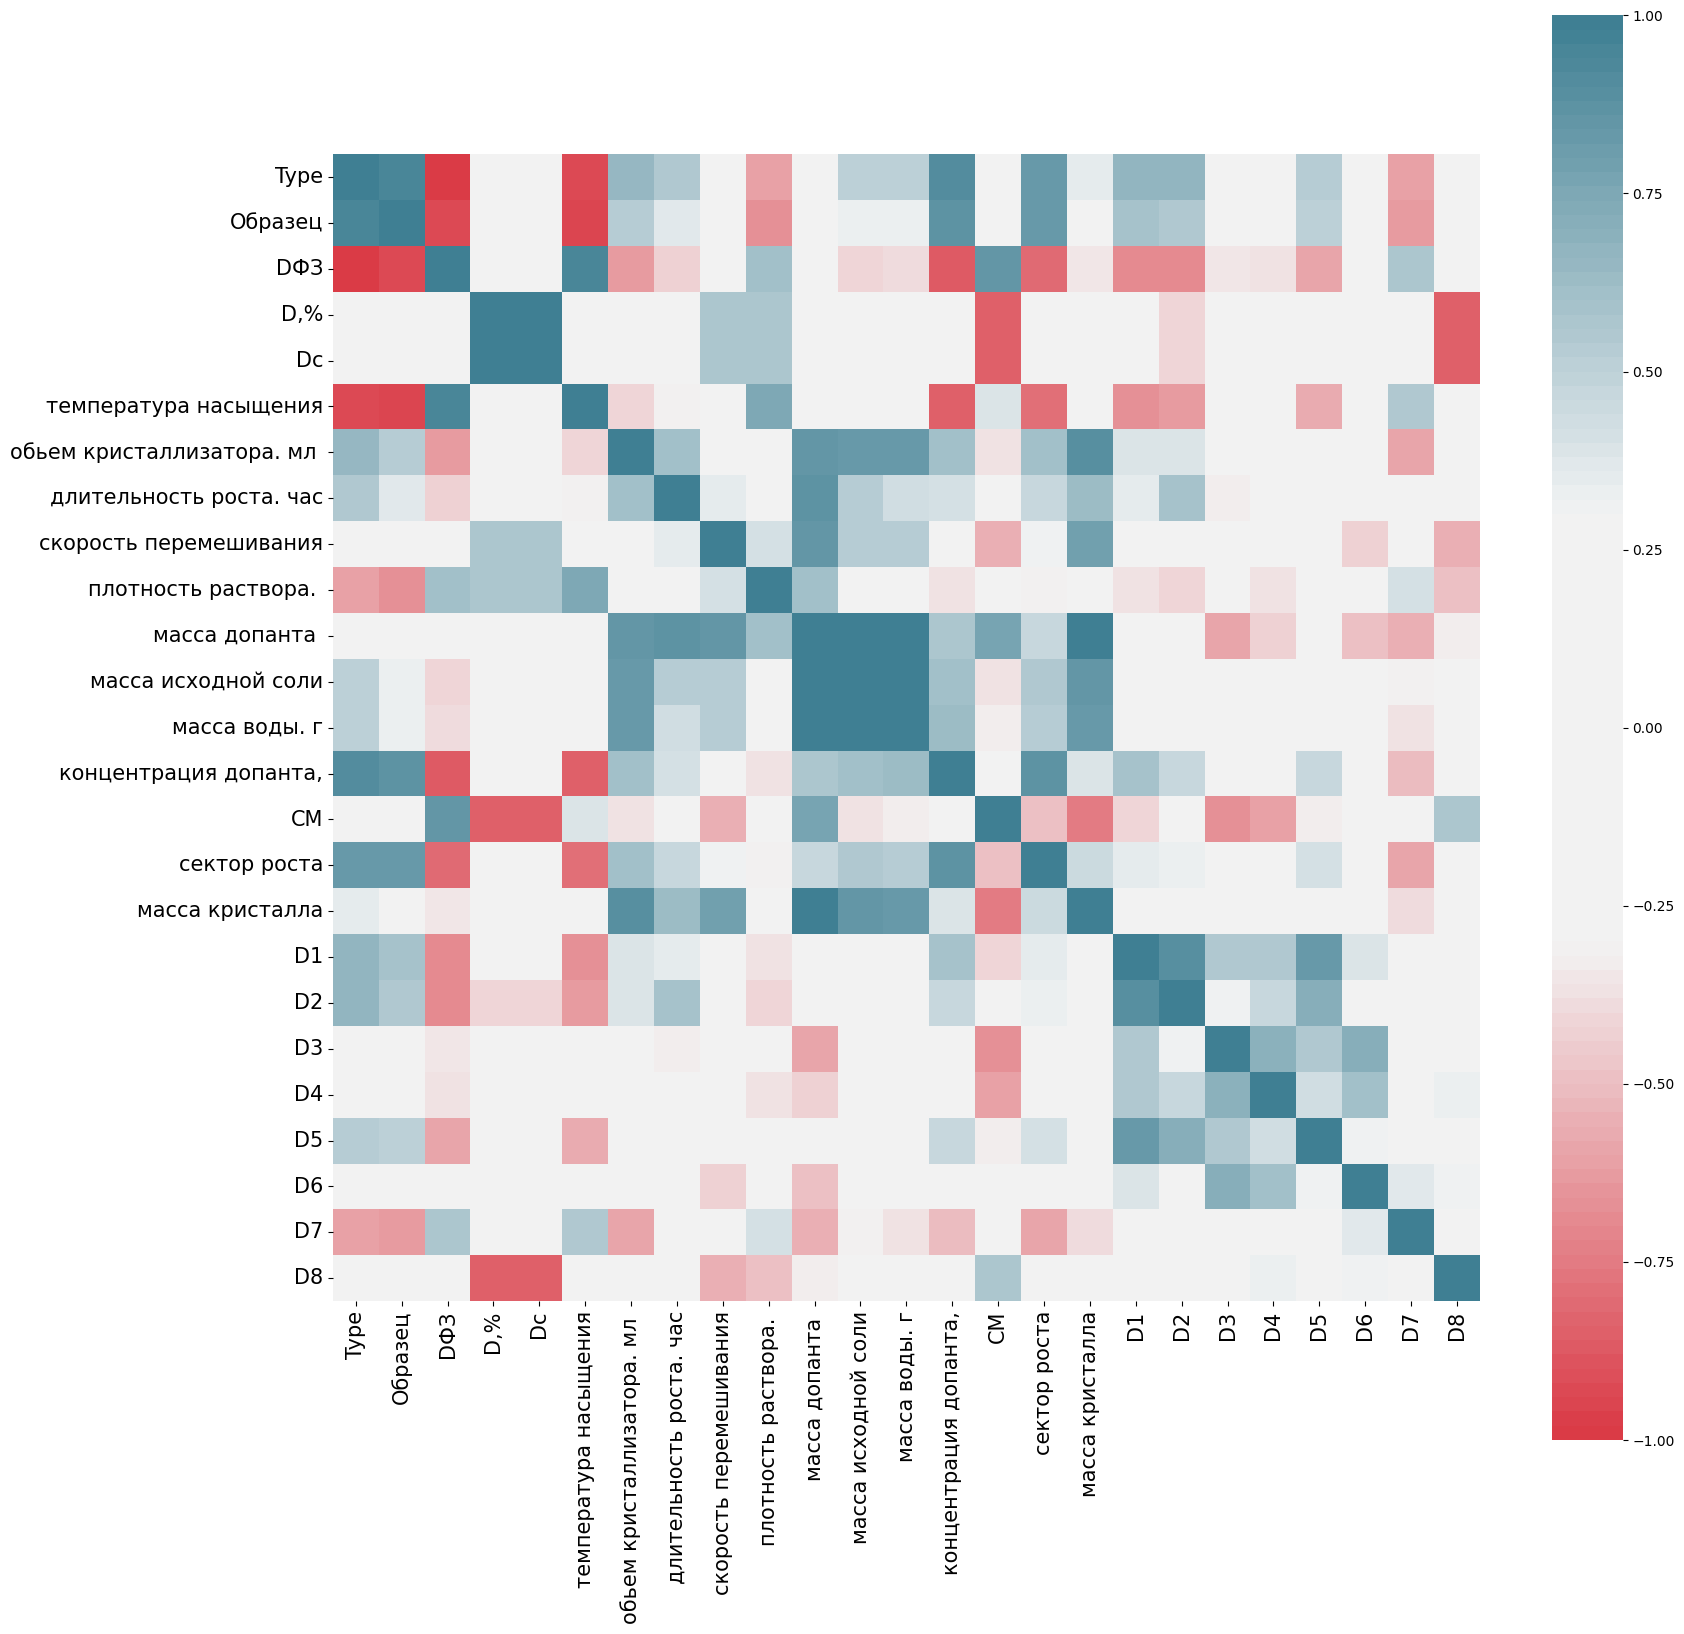

### Kendall Correlation

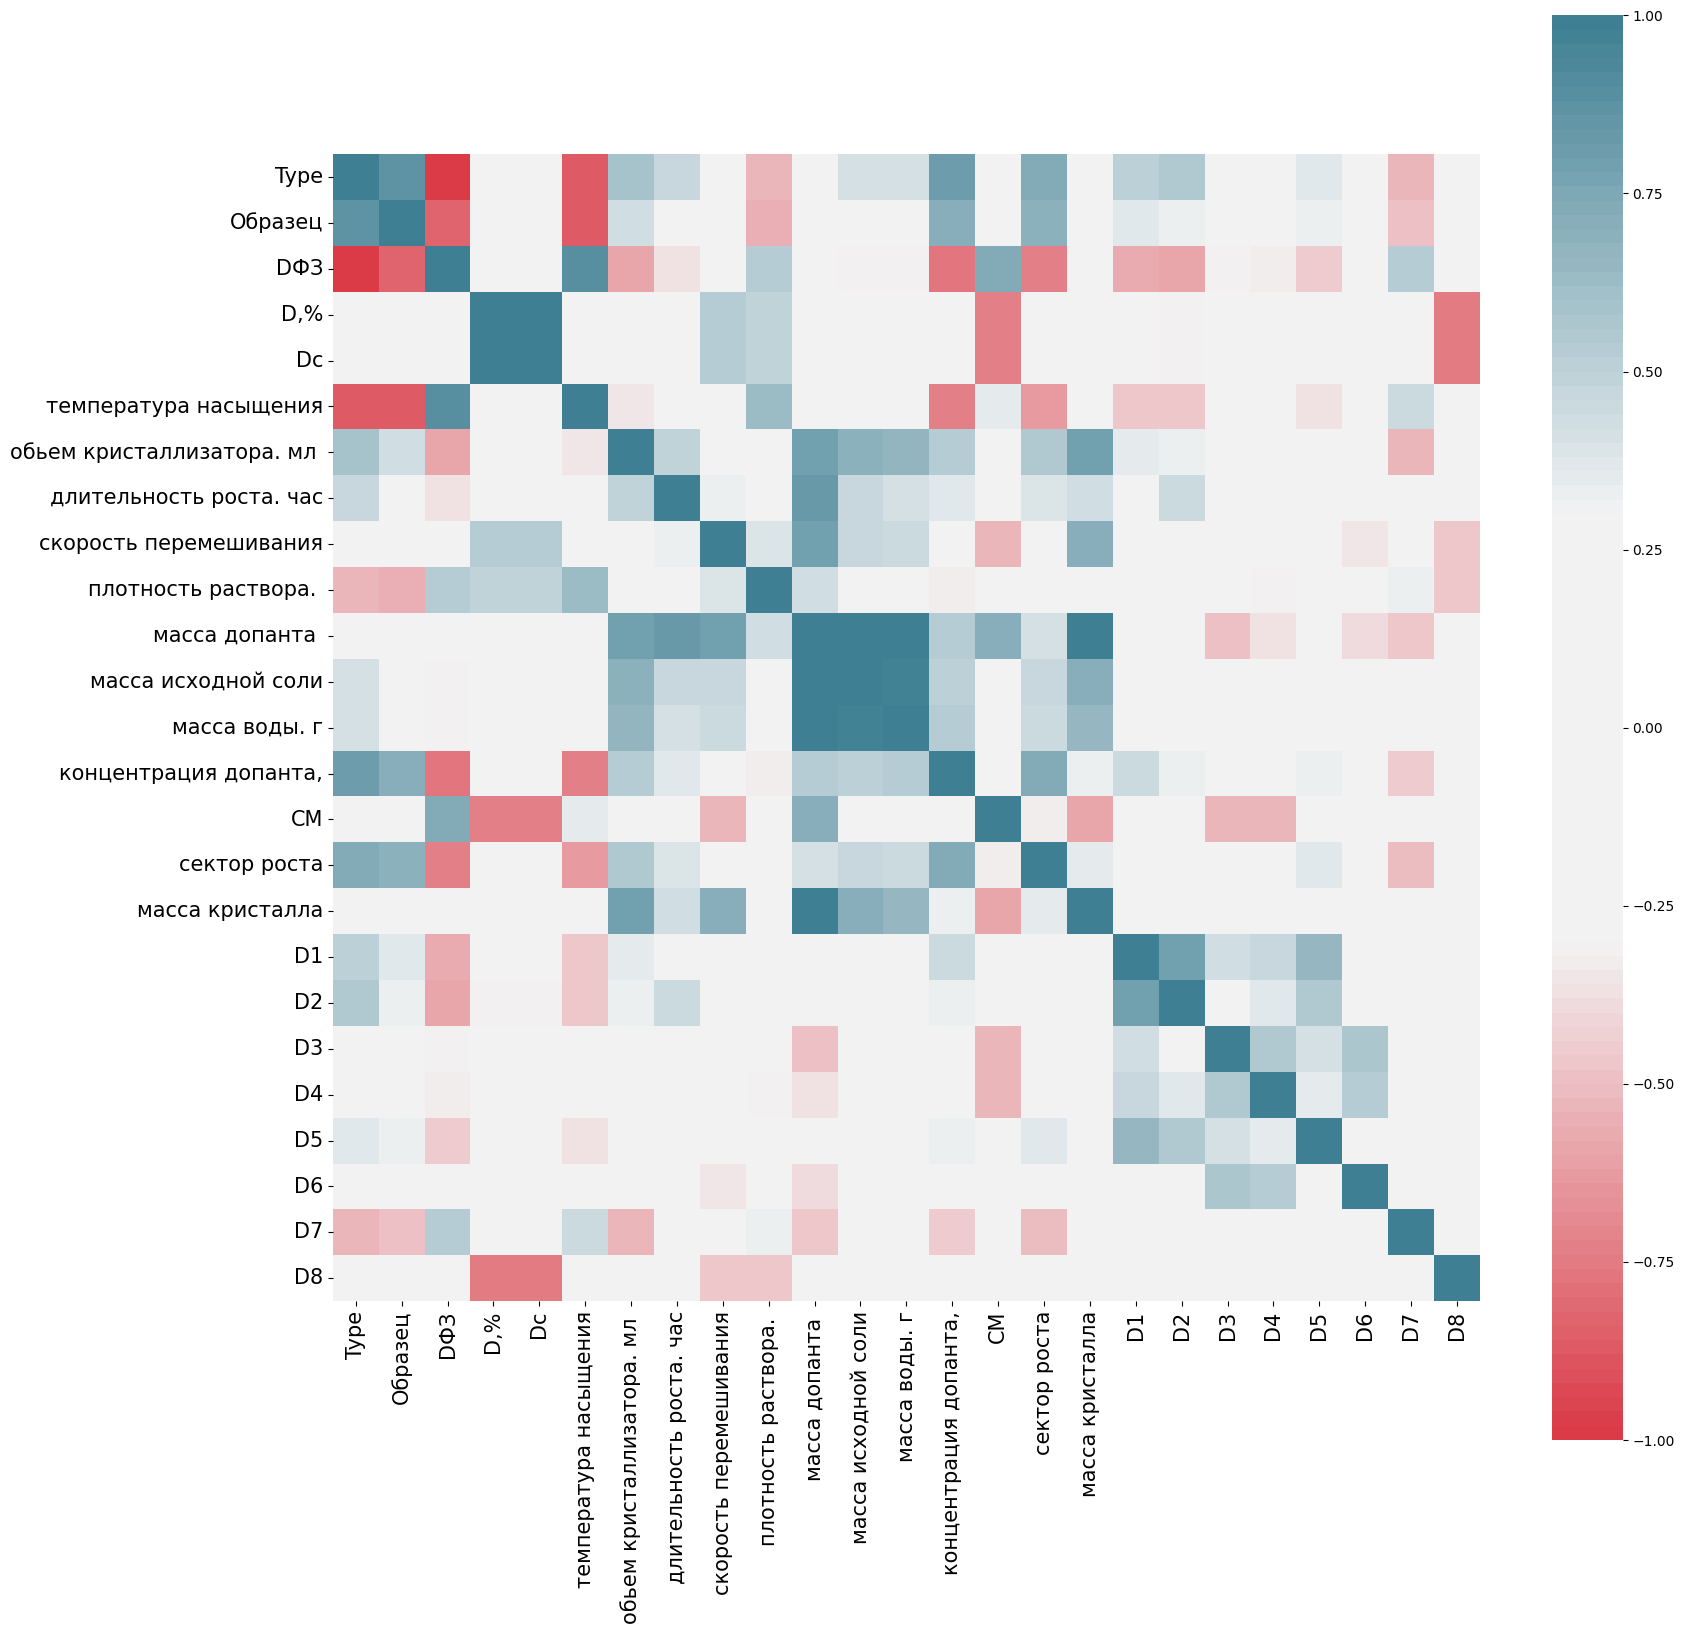

## Pairplot<a id='32be6685-a2ba-4df5-af36-fc006fa6fc6b'>

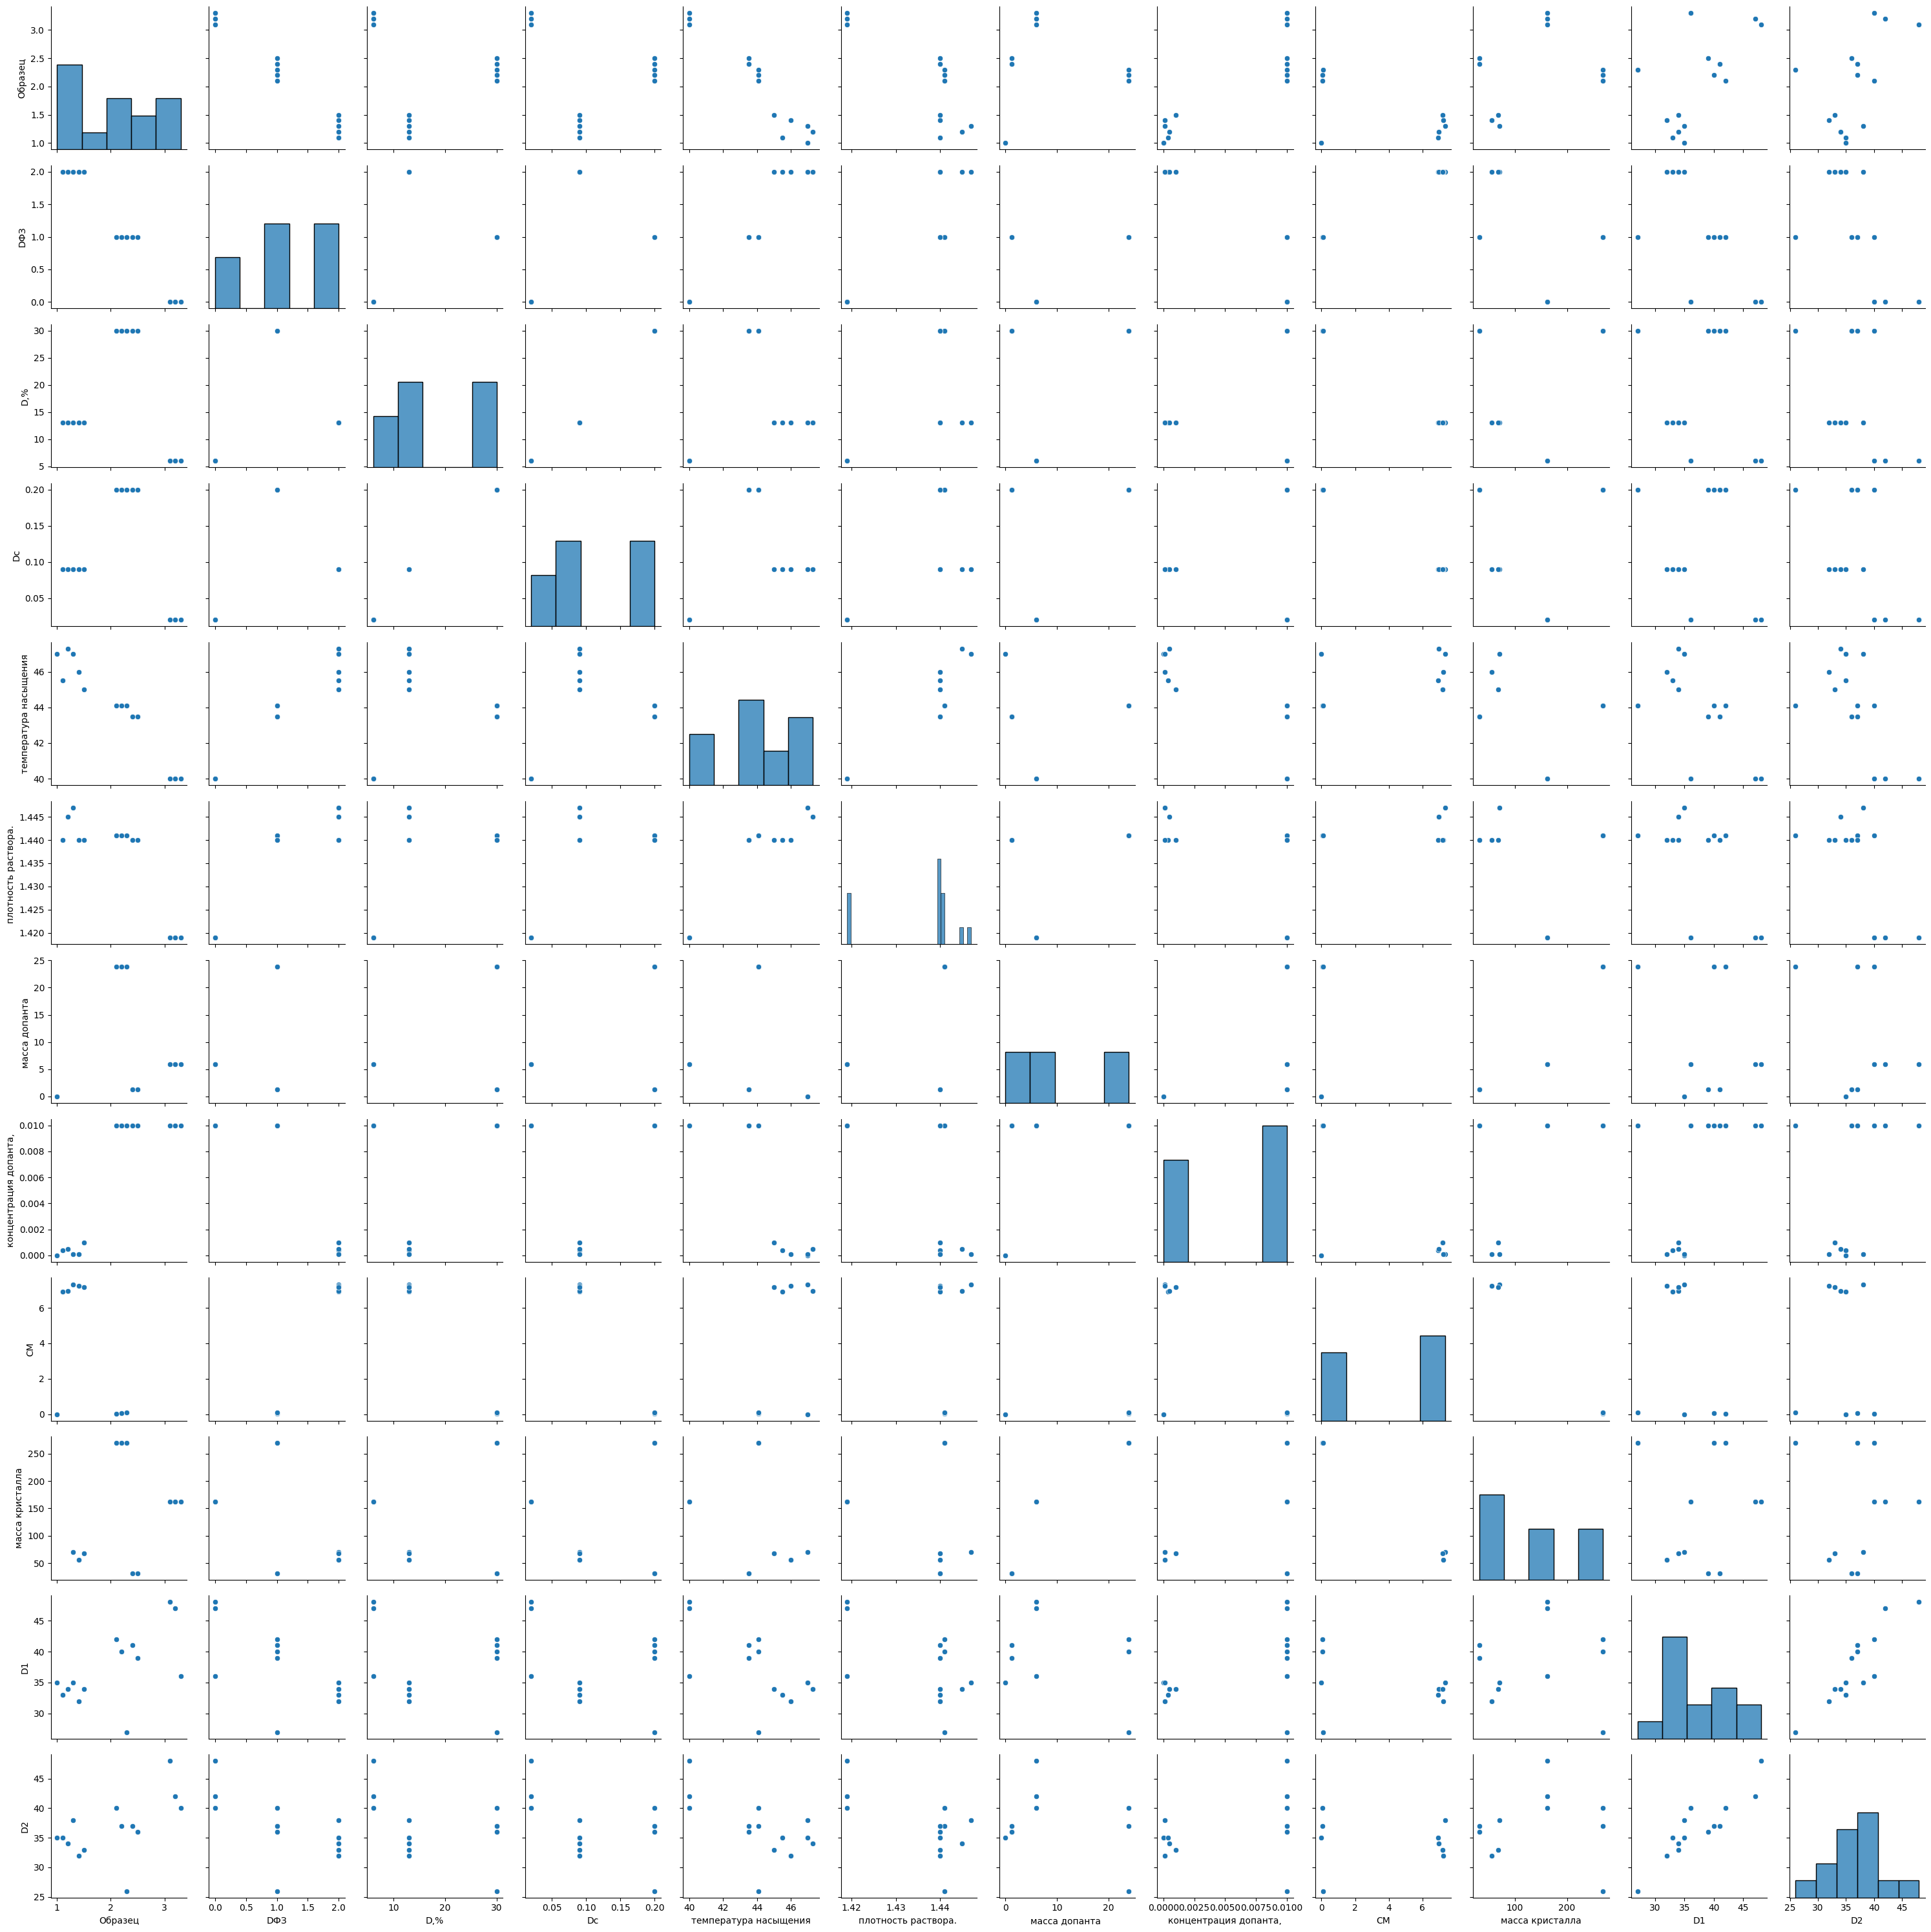

## Contingency table<a id='a2d6da98-65b0-4663-b2cf-41dac3ca2ee3'>

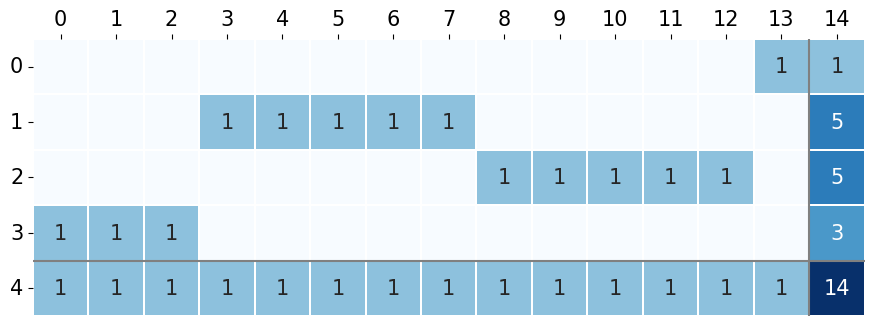

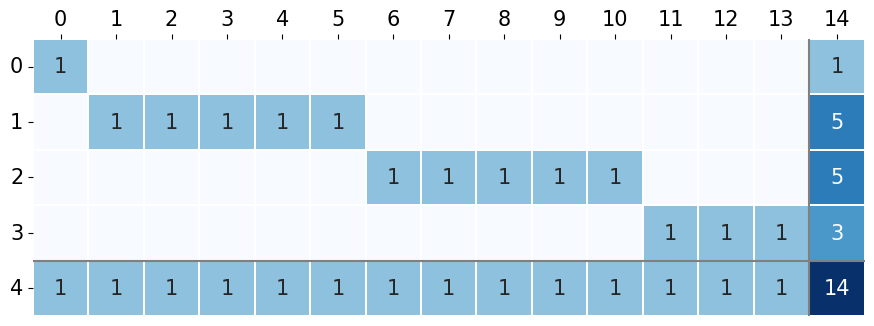

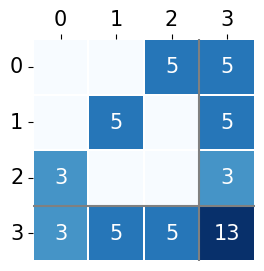

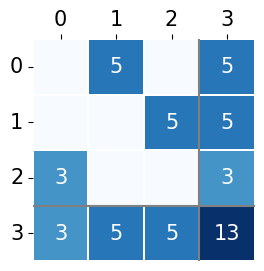

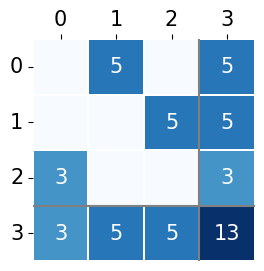

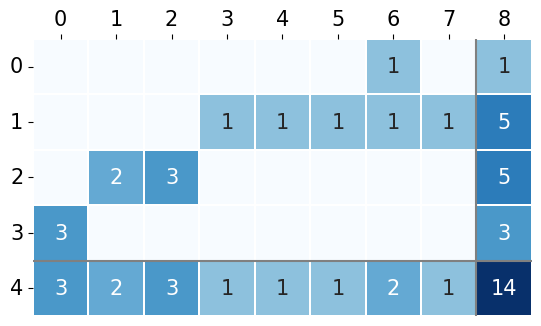

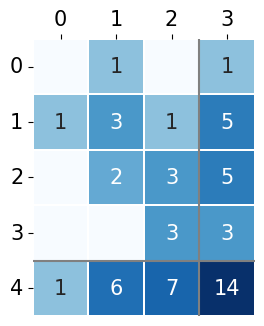

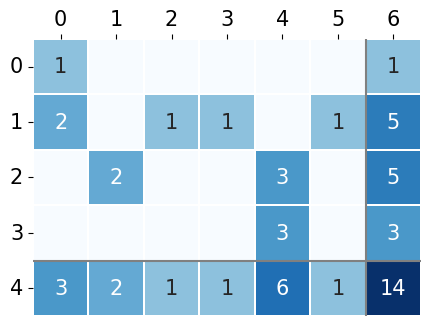

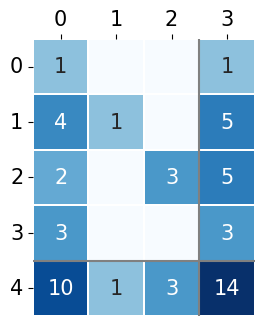

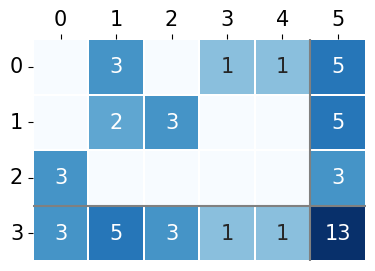

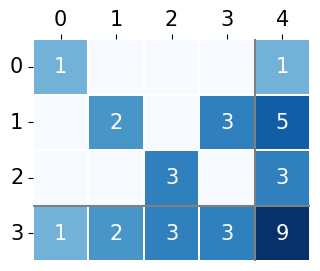

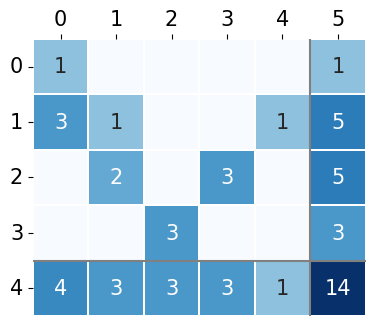

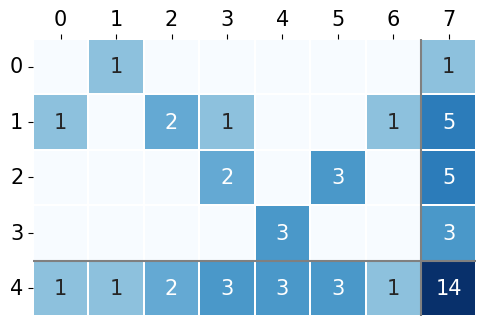

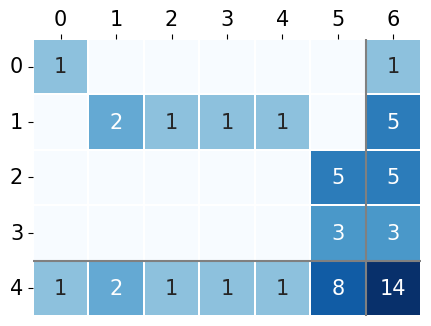

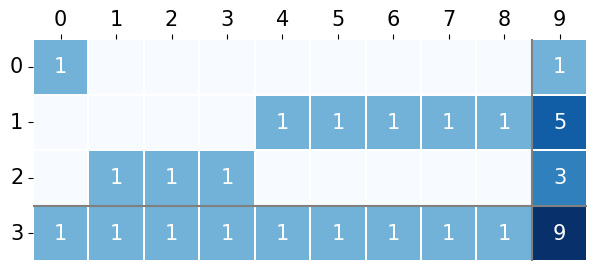

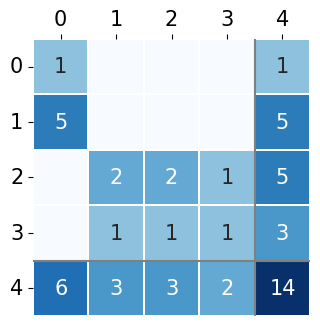

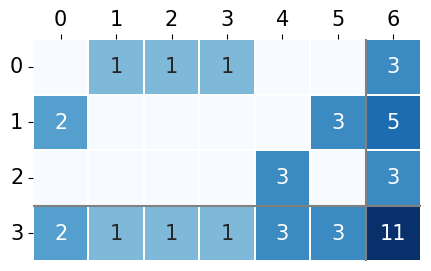

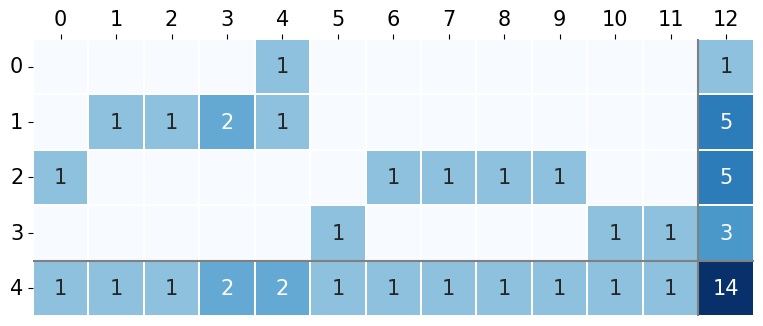

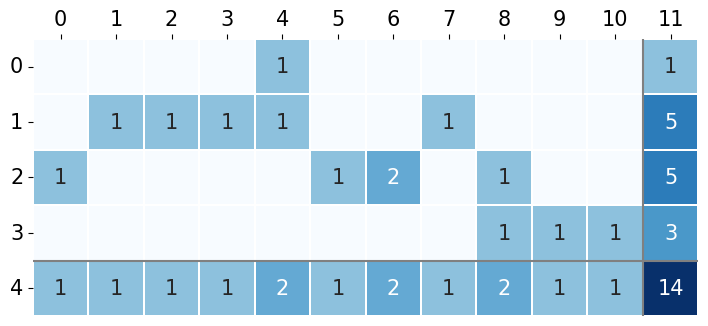

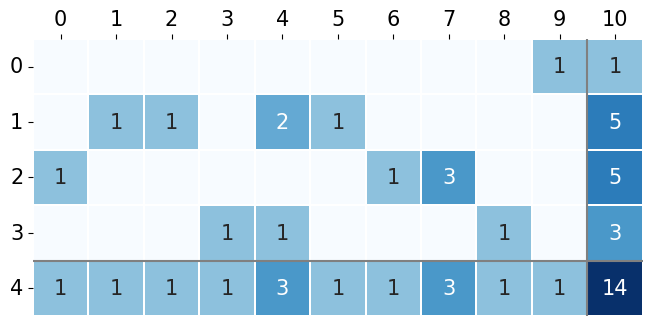

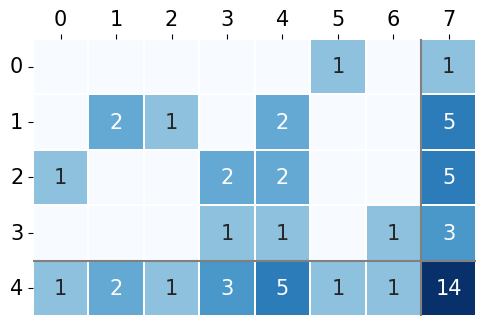

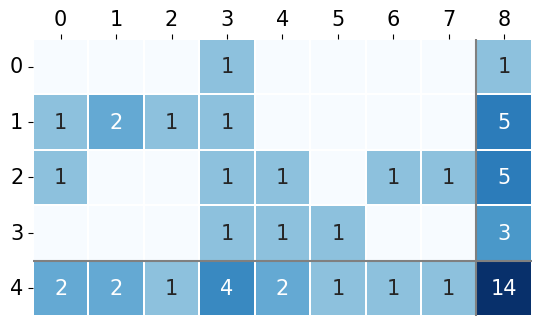

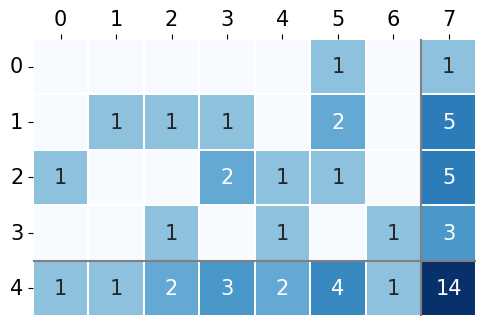

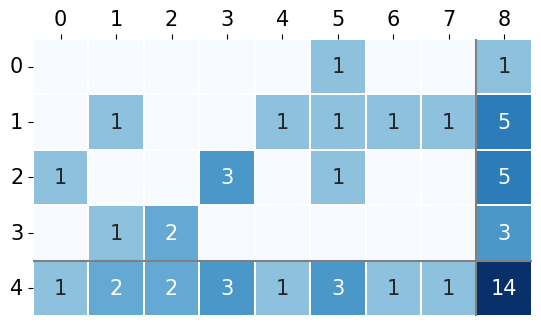

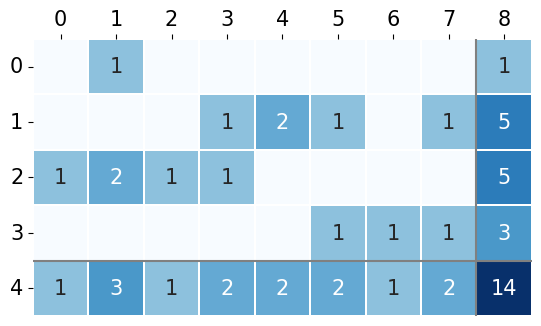

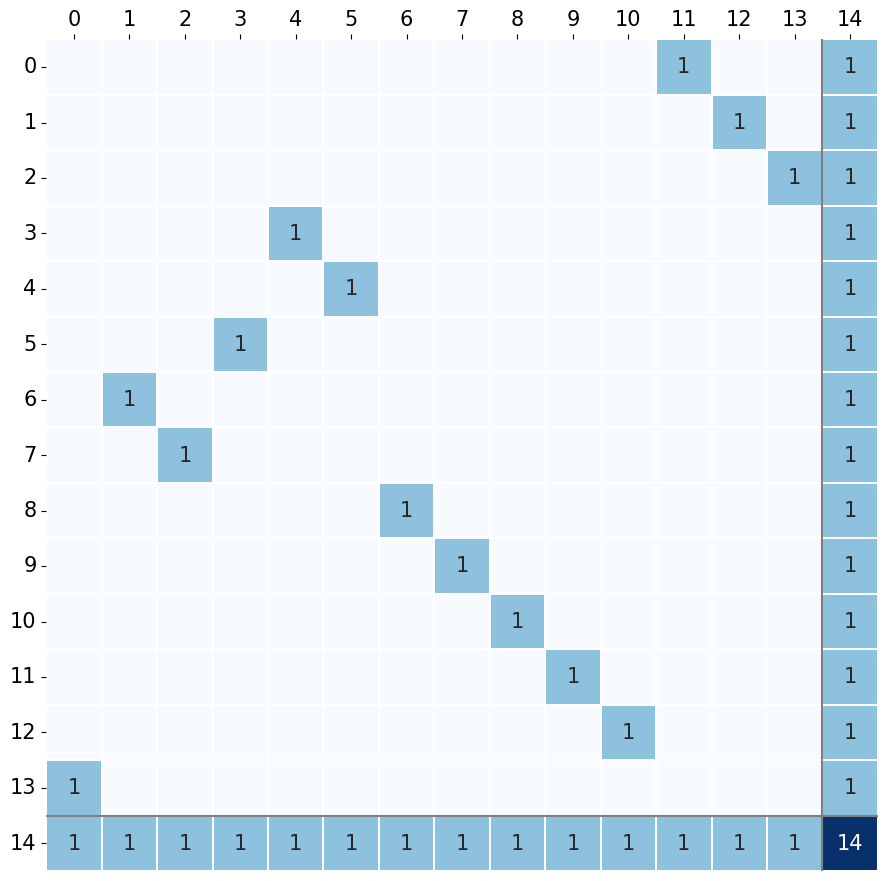

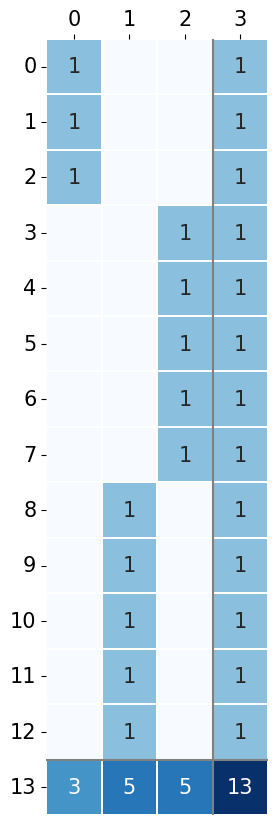

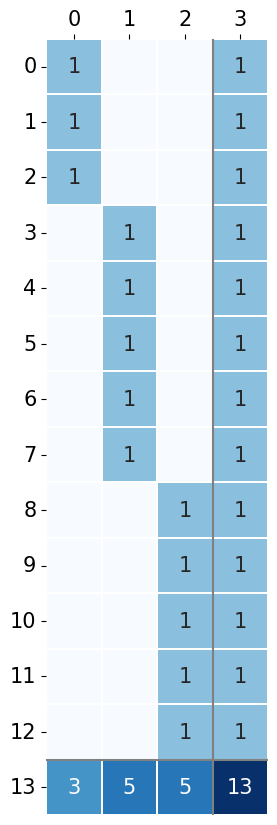

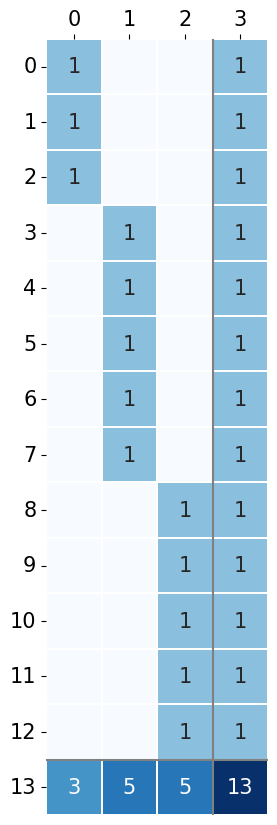

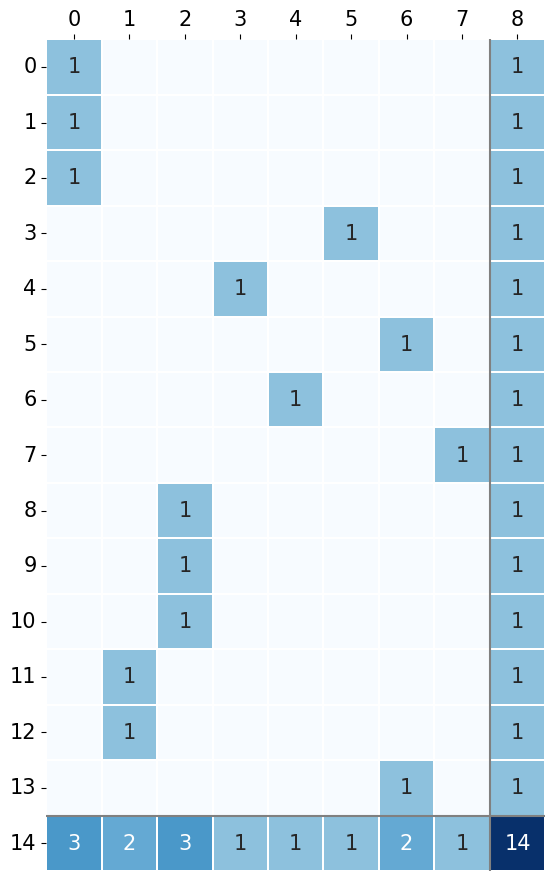

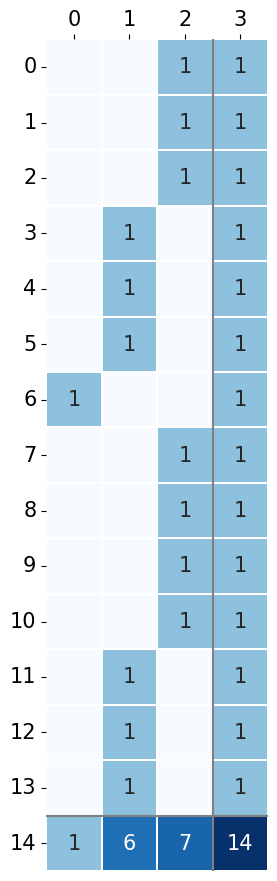

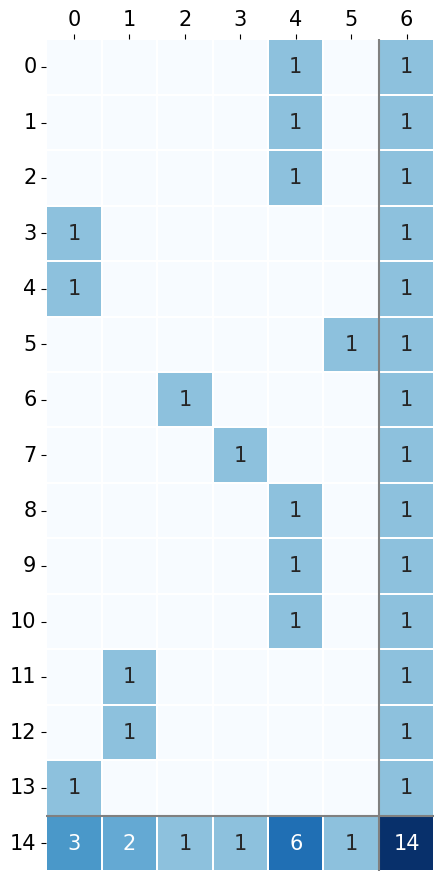

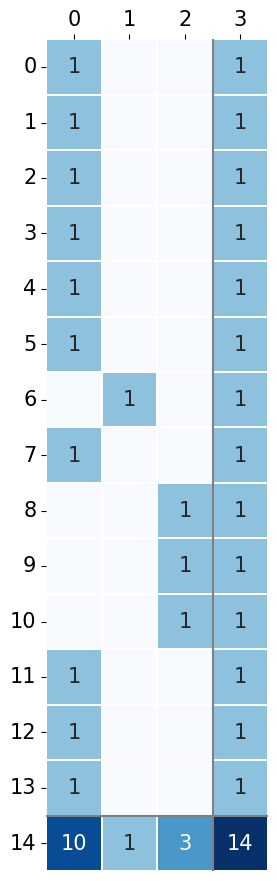

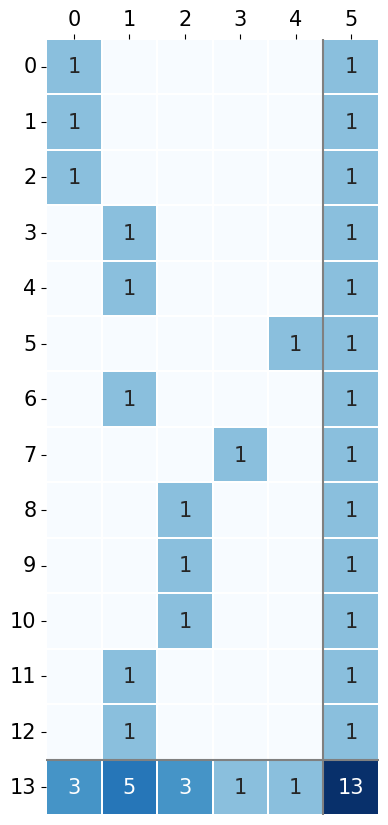

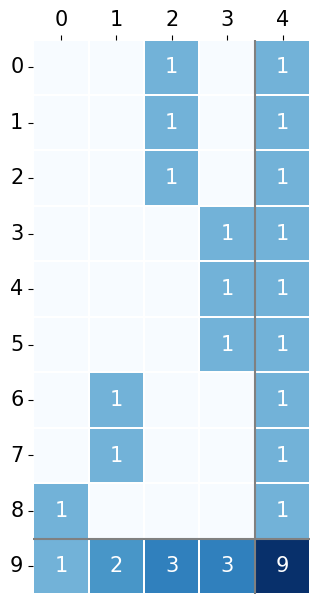

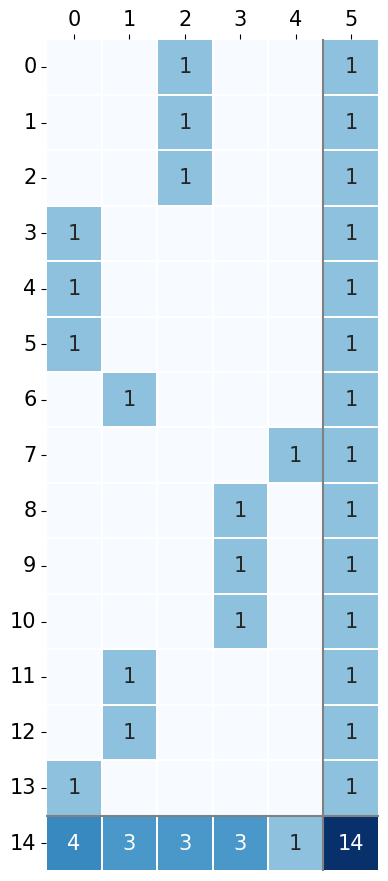

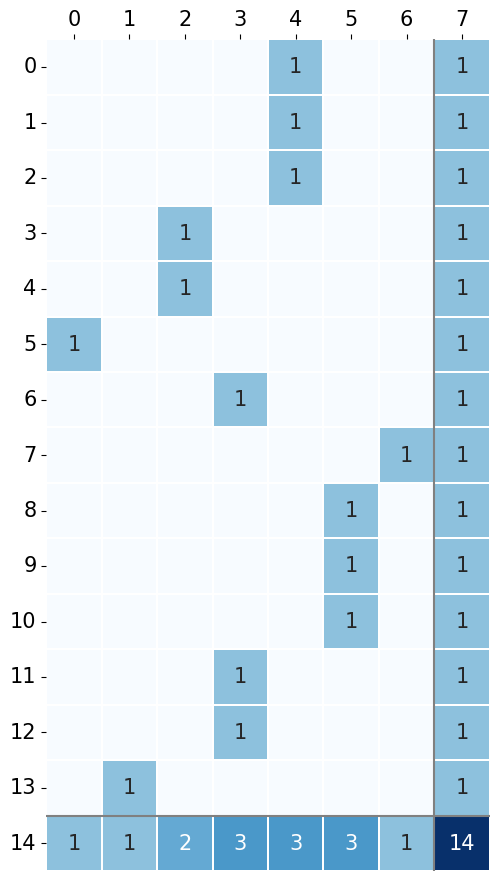

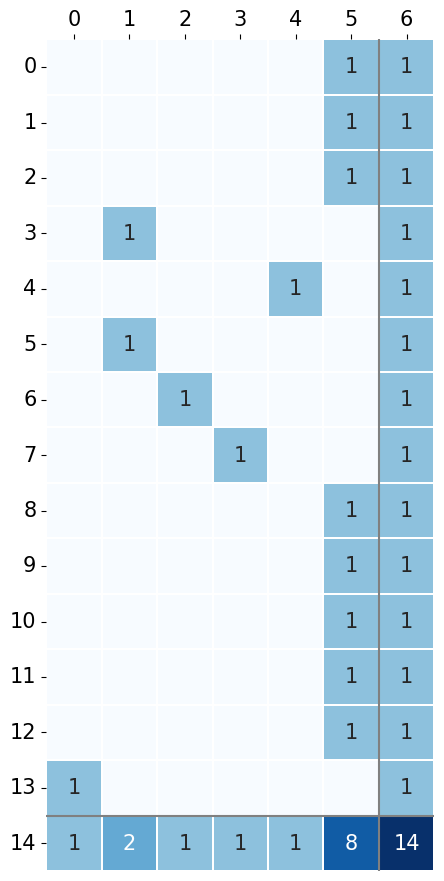

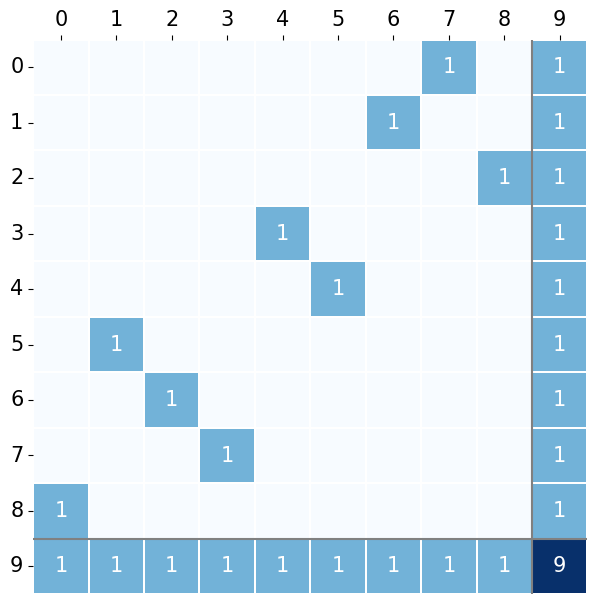

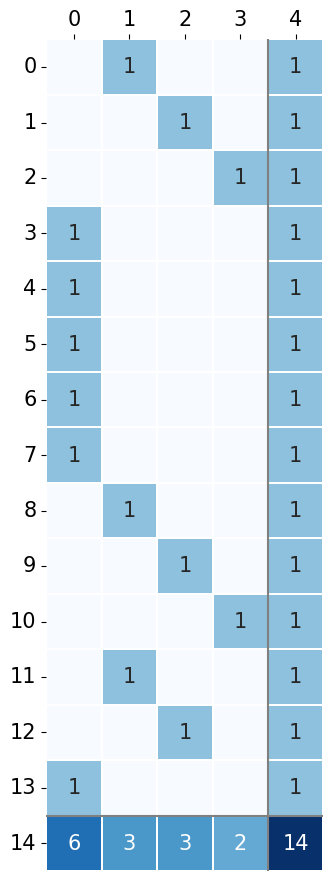

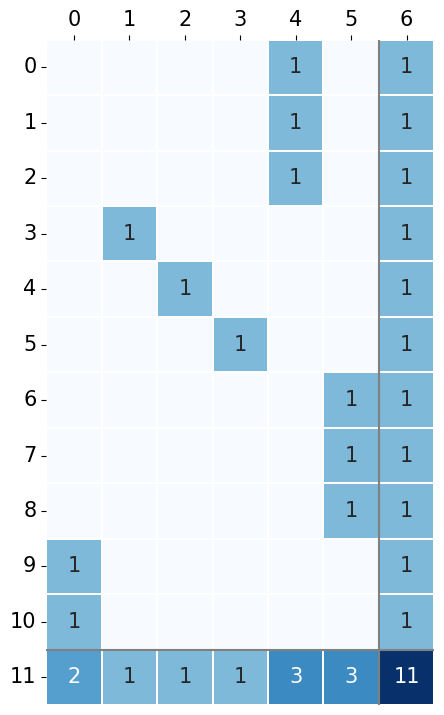

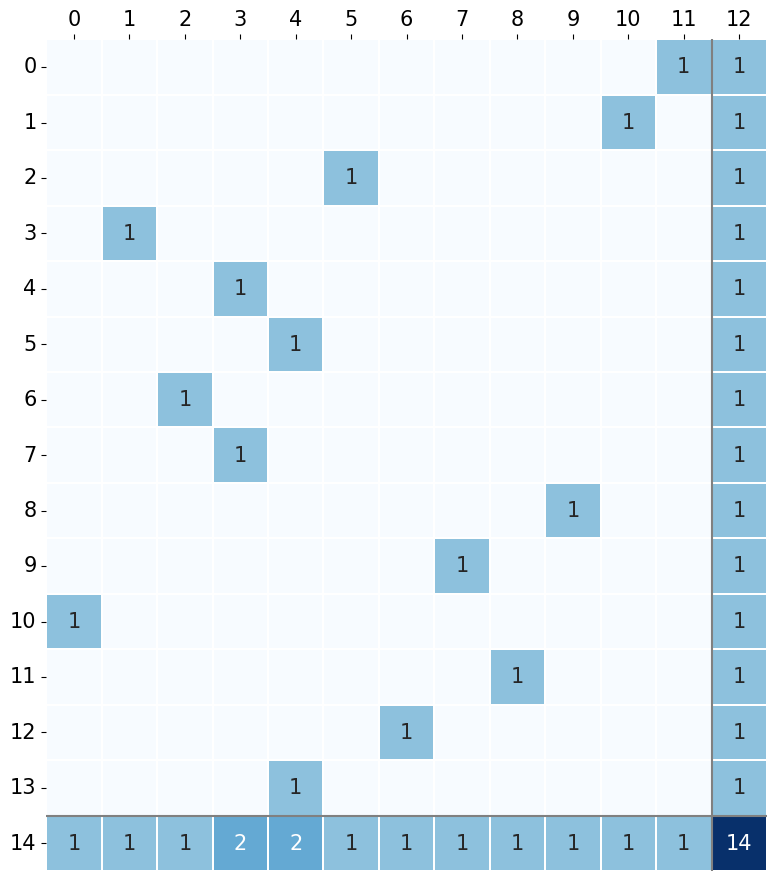

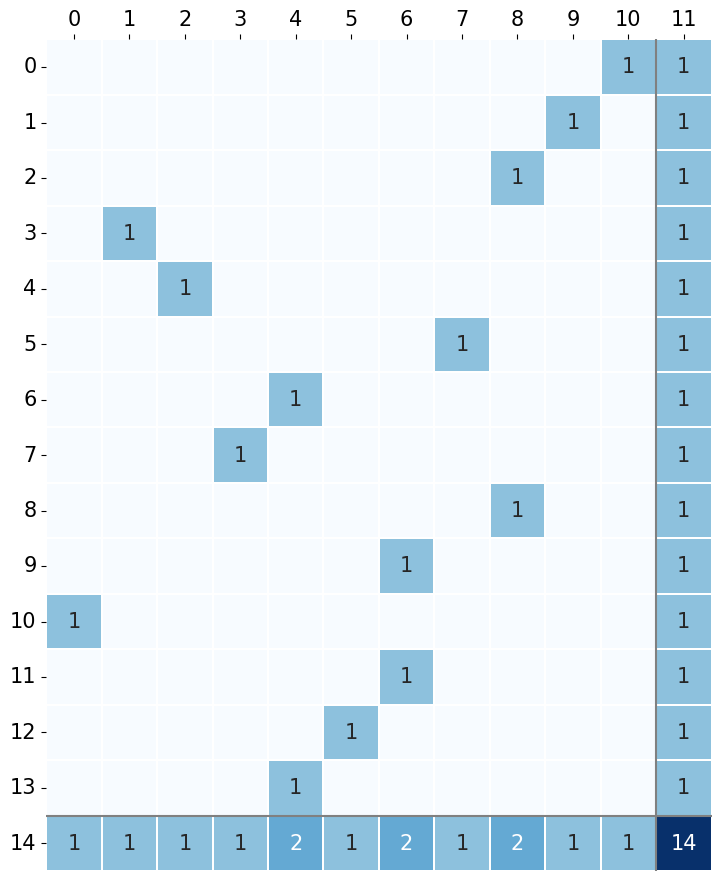

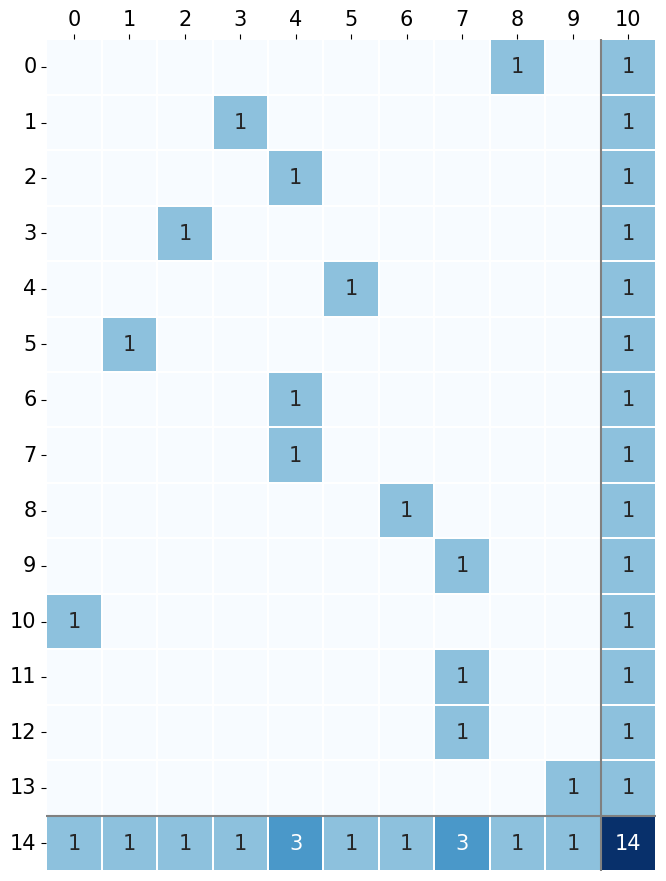

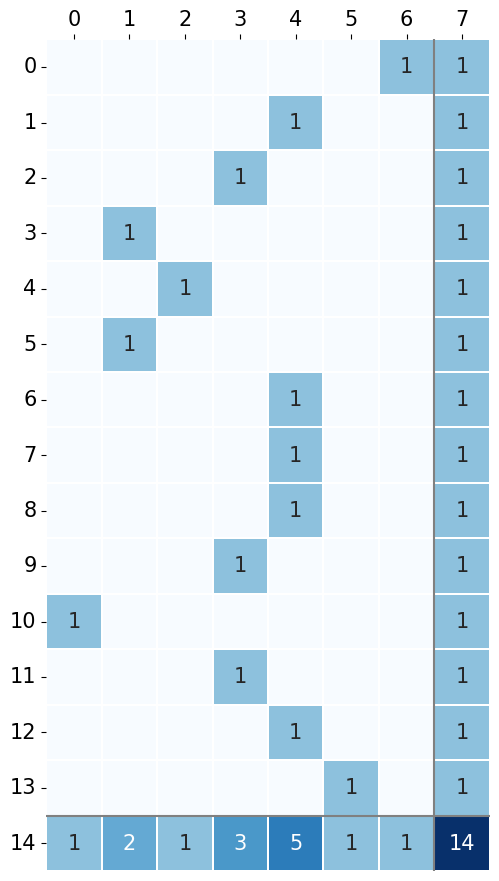

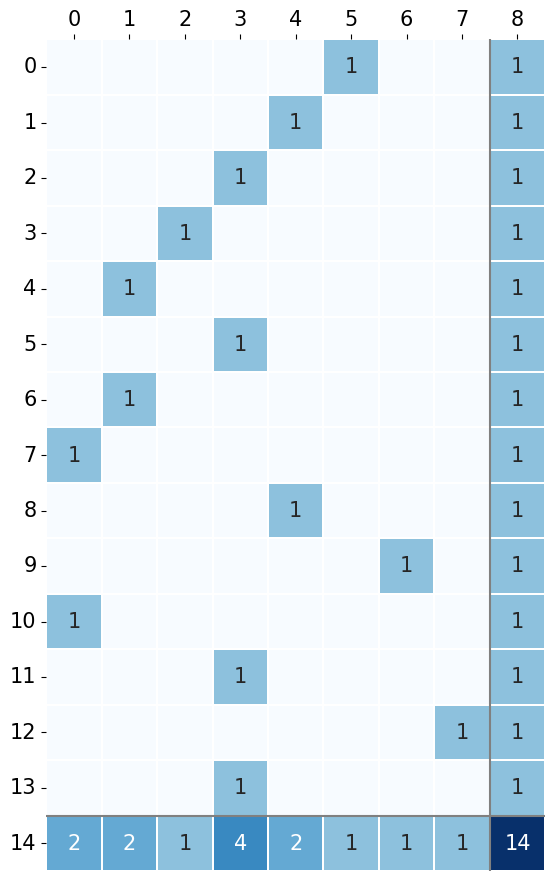

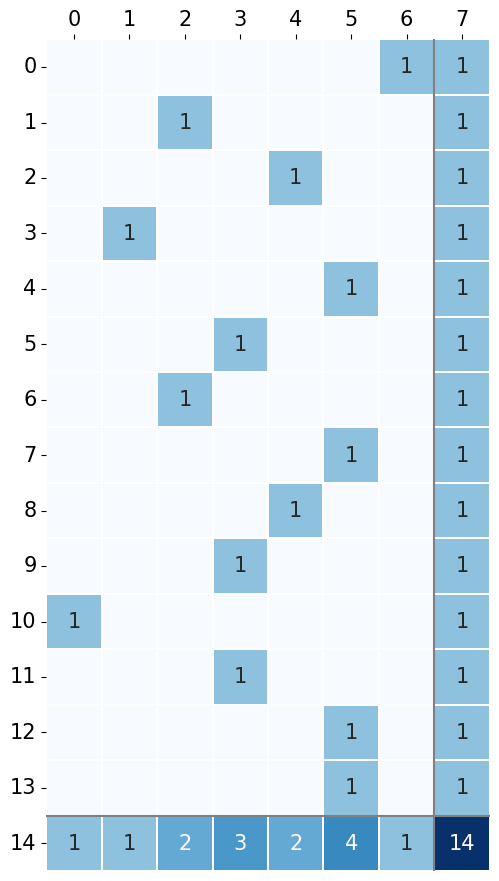

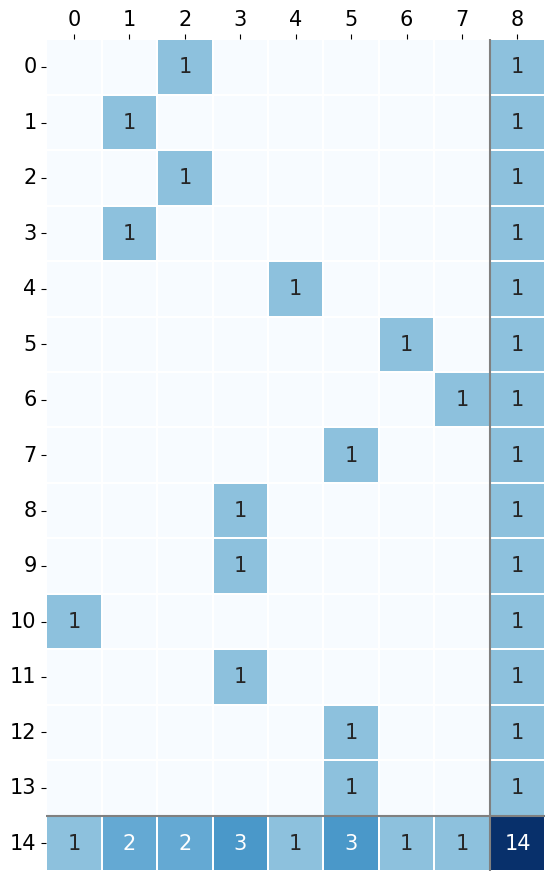

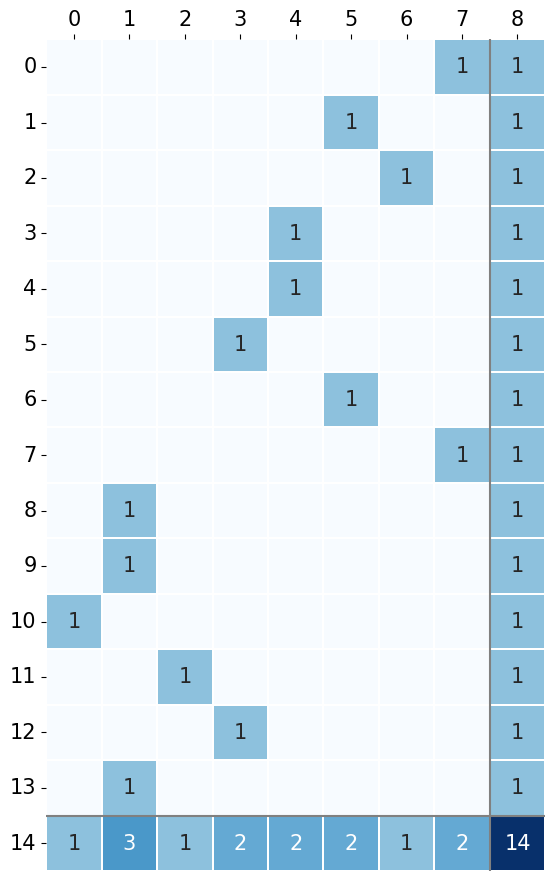

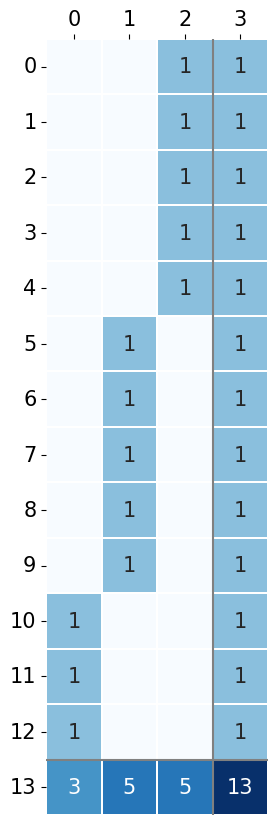

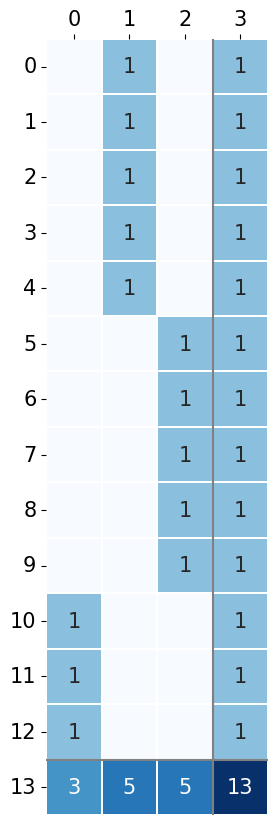

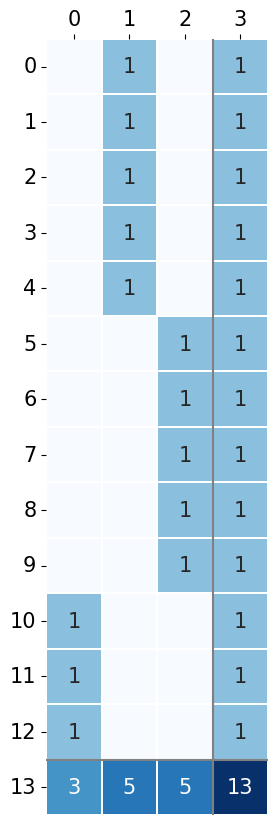

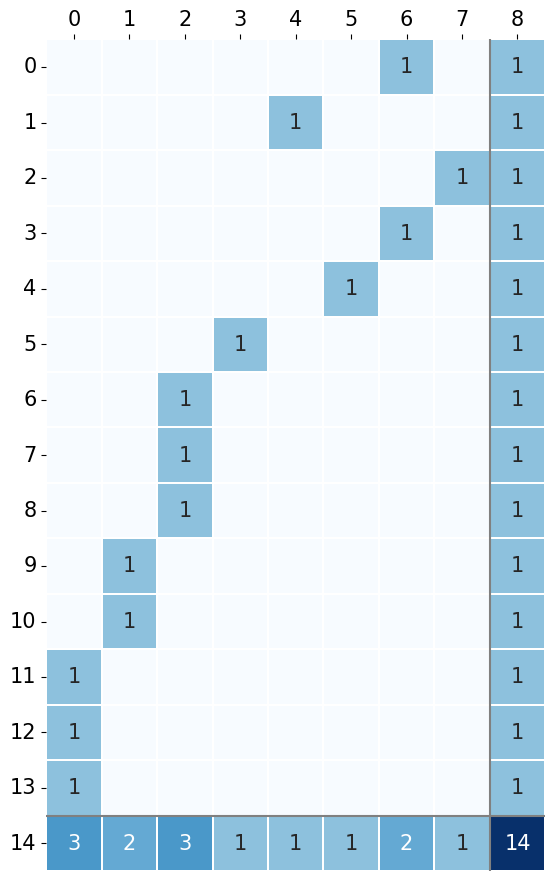

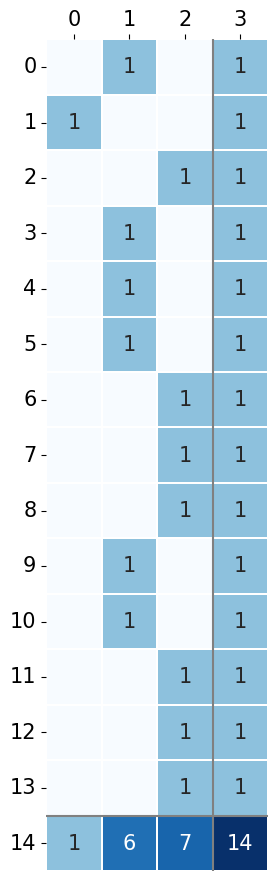

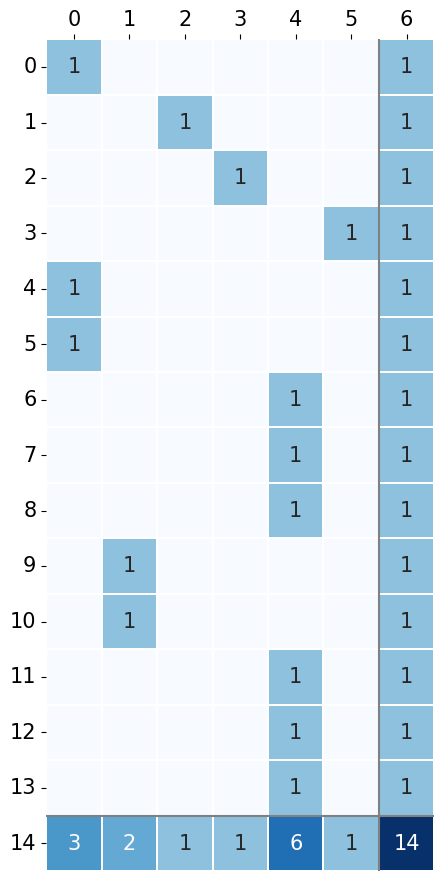

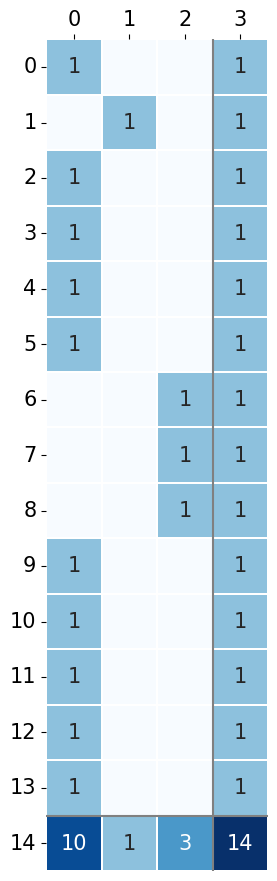

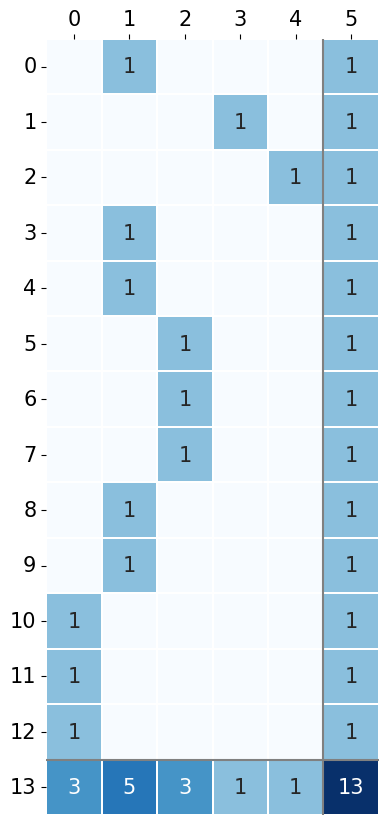

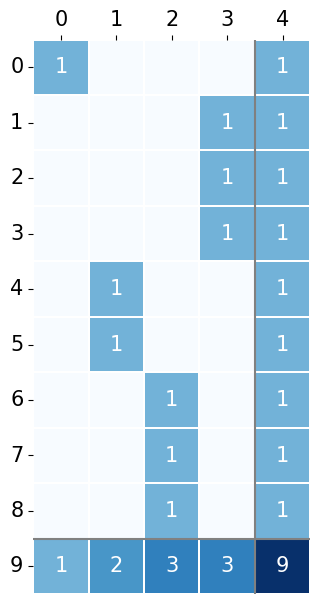

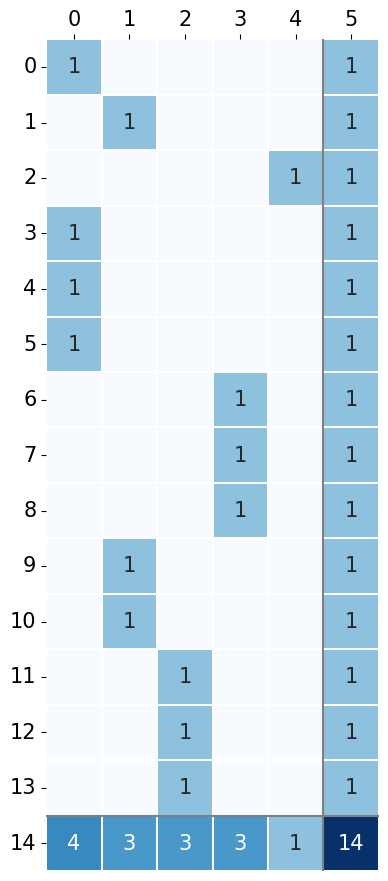

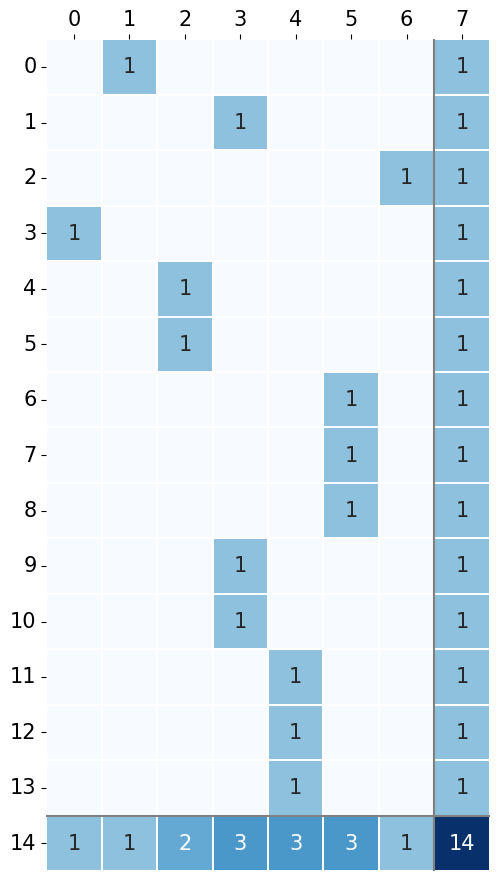

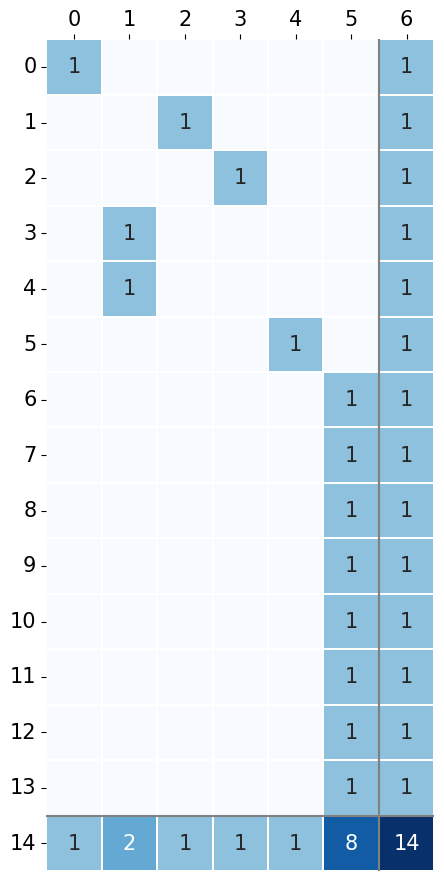

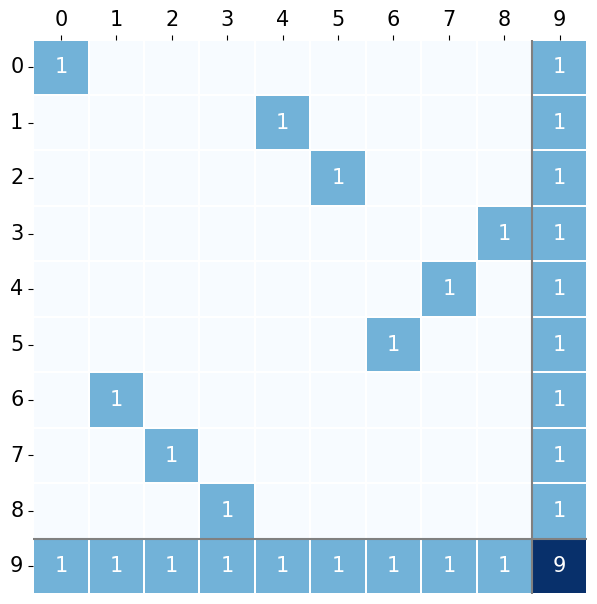

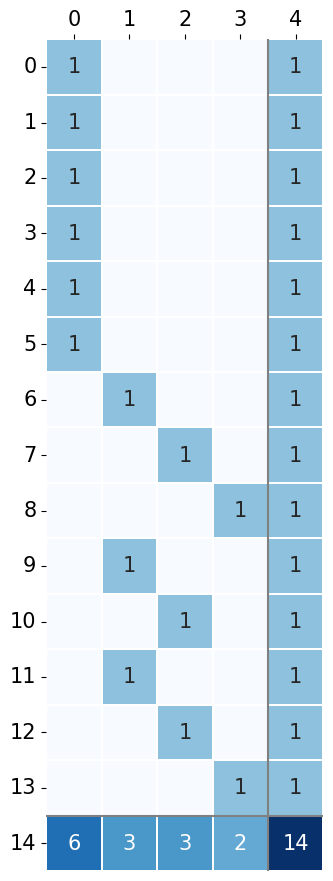

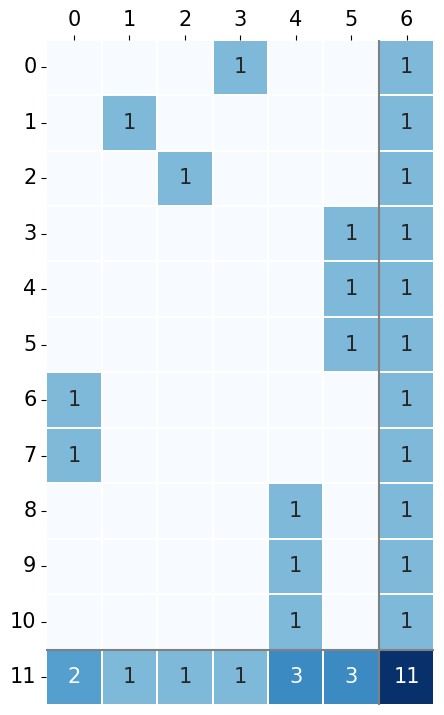

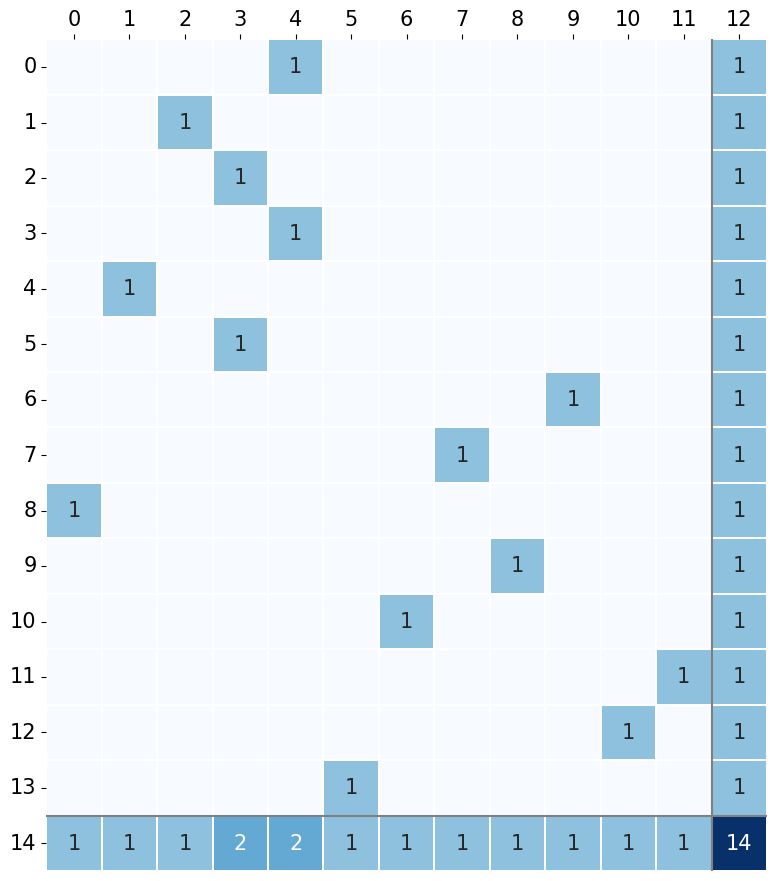

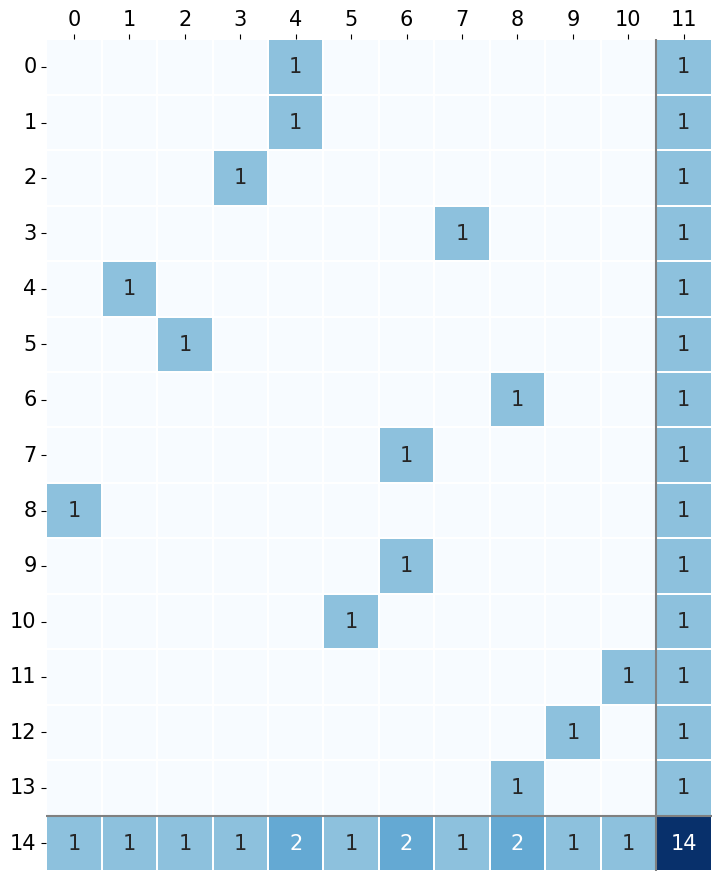

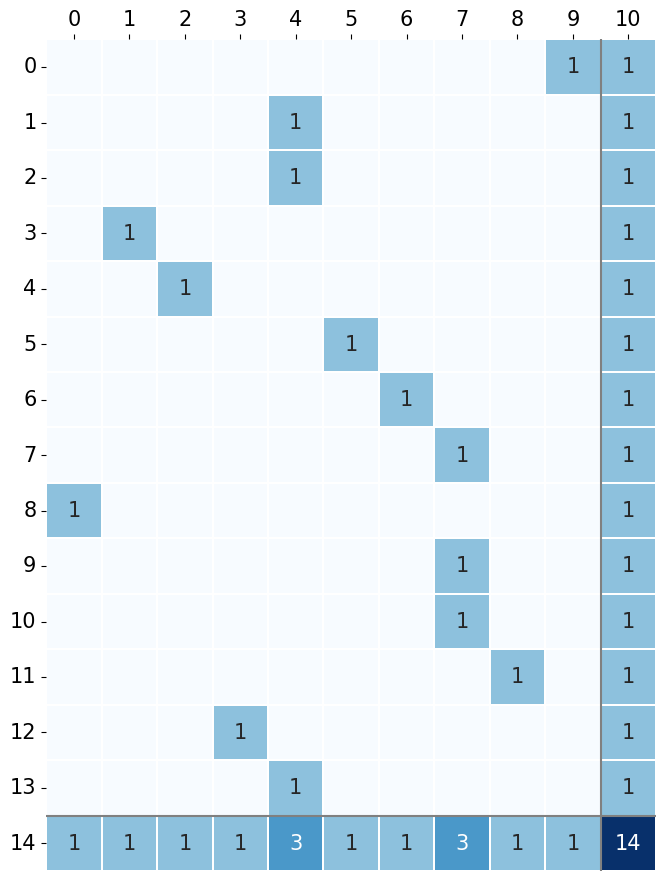

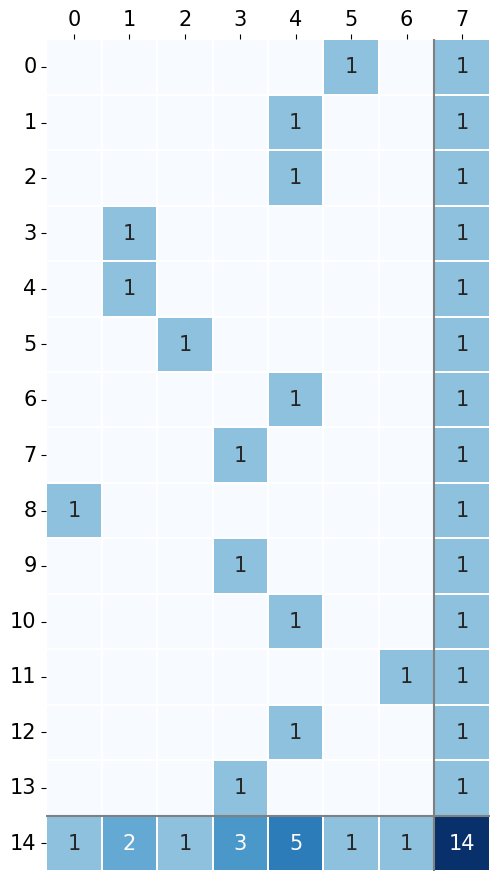

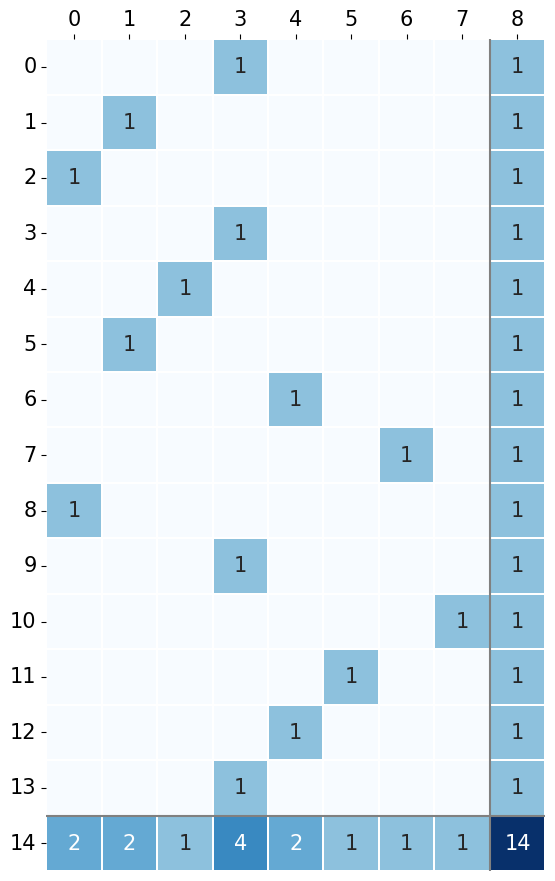

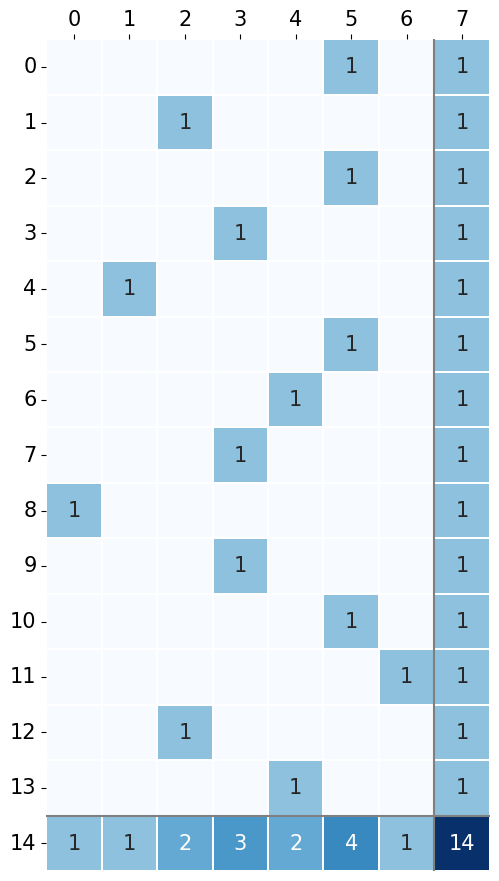

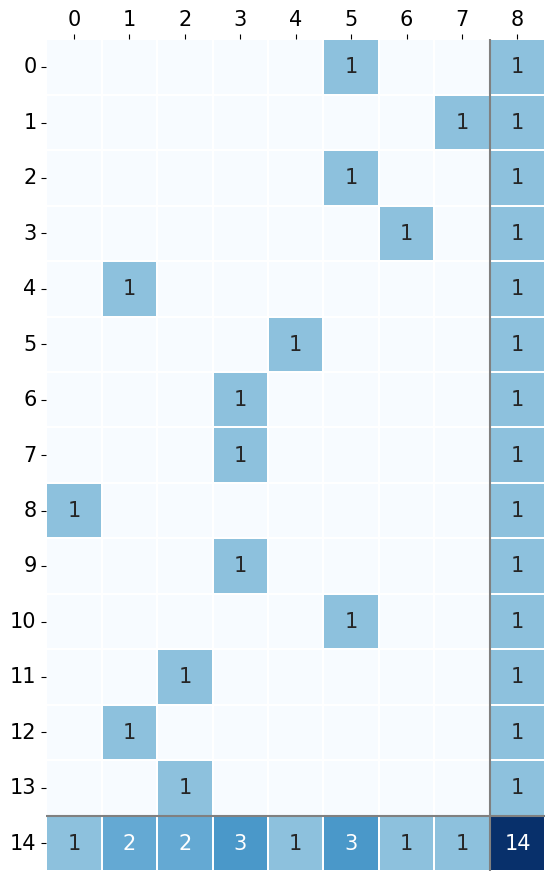

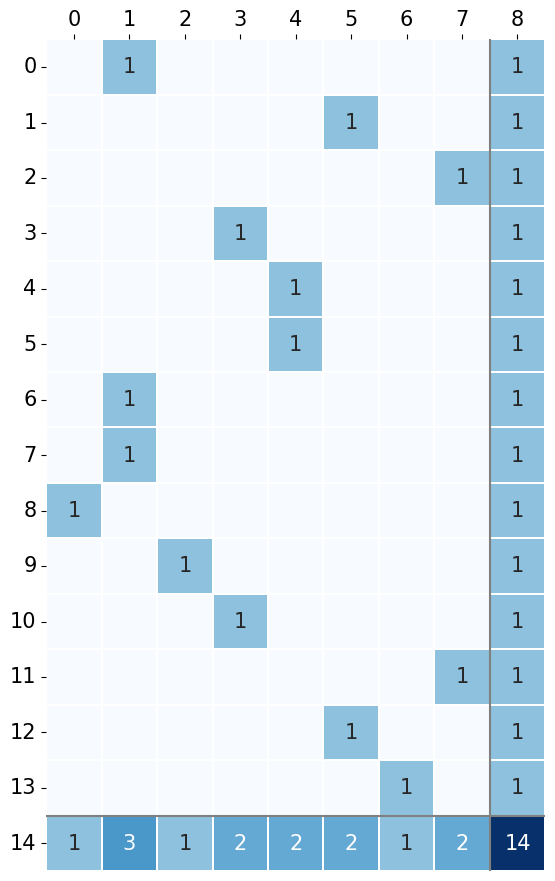

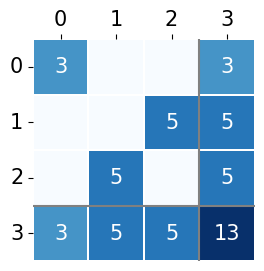

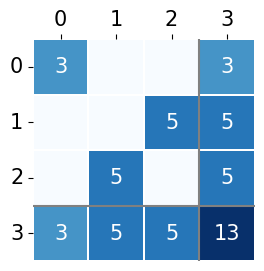

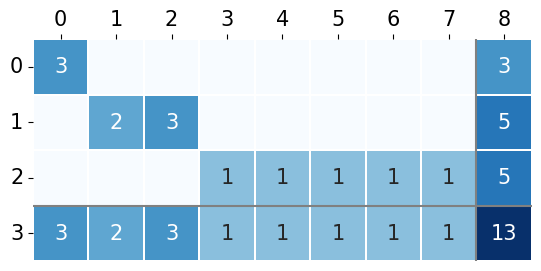

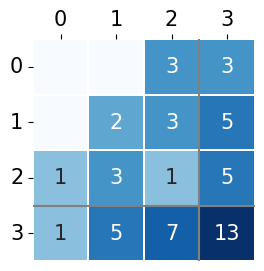

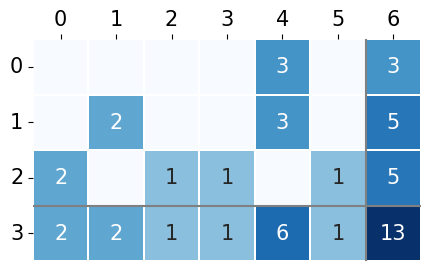

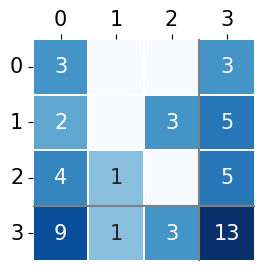

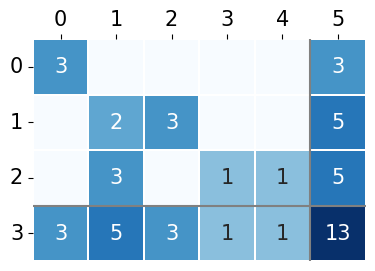

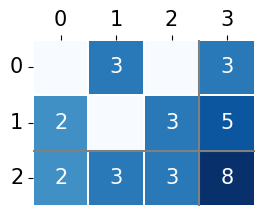

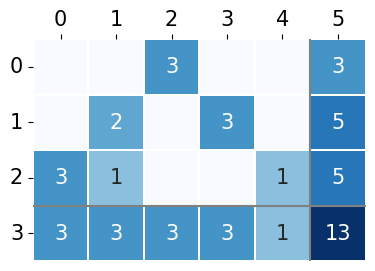

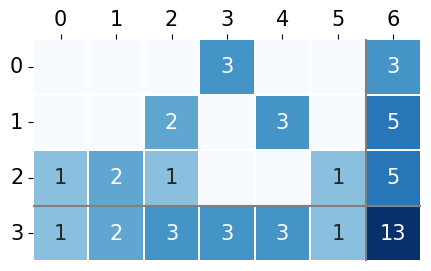

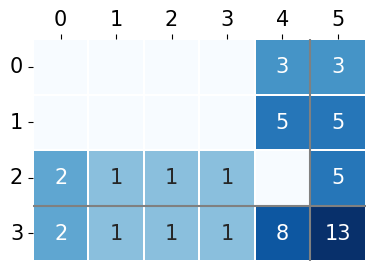

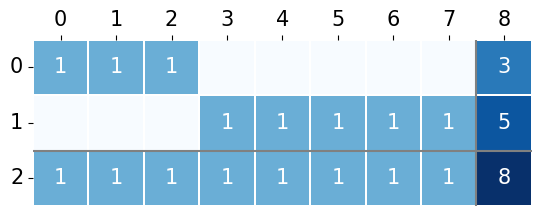

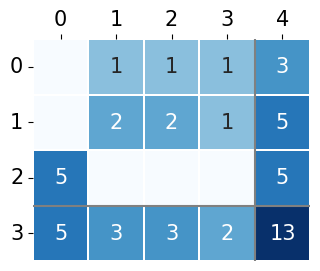

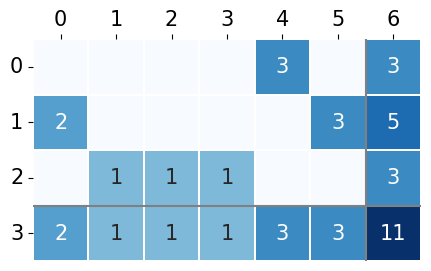

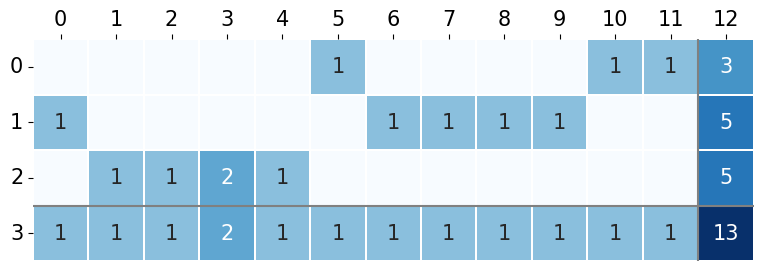

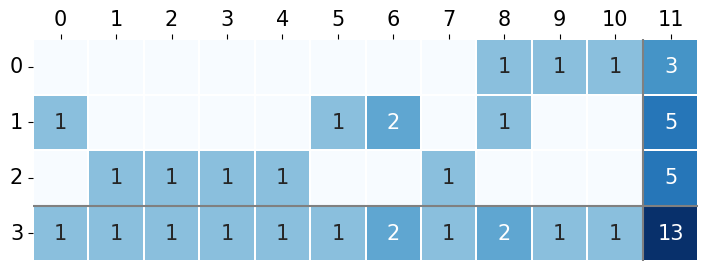

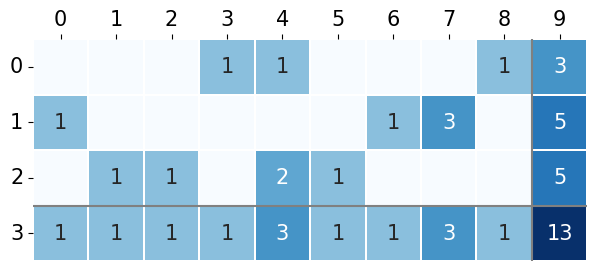

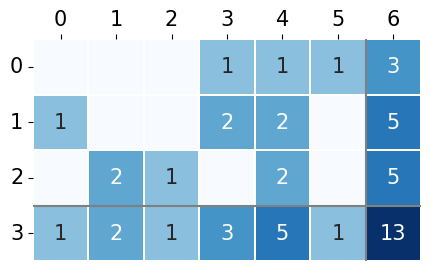

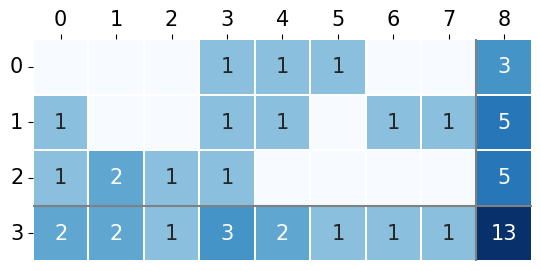

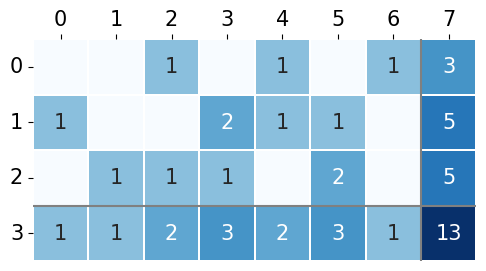

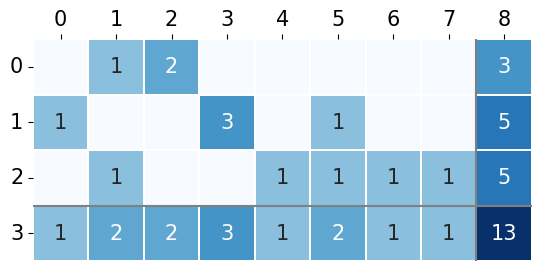

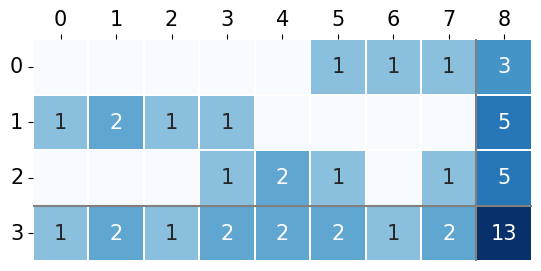

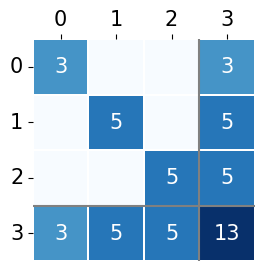

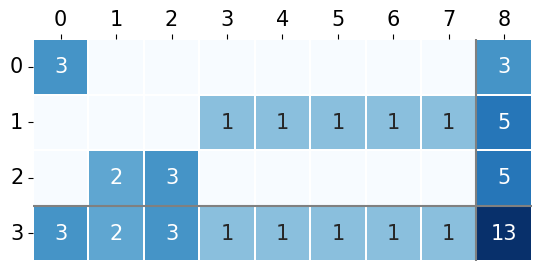

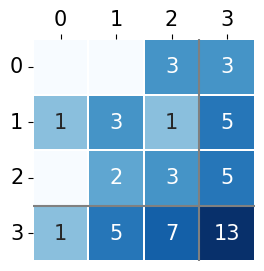

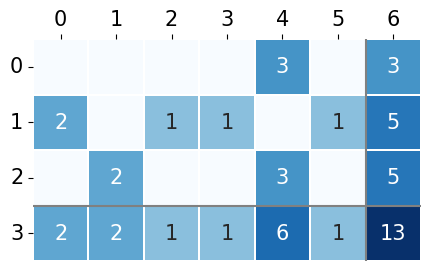

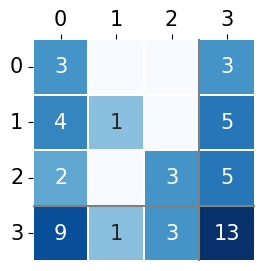

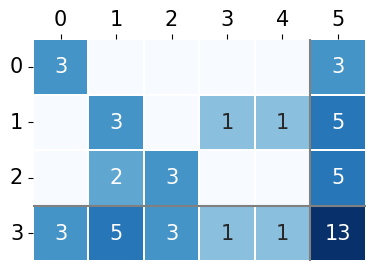

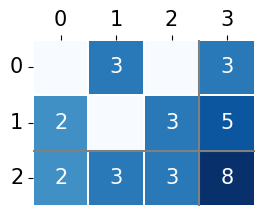

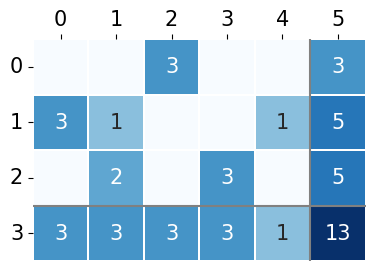

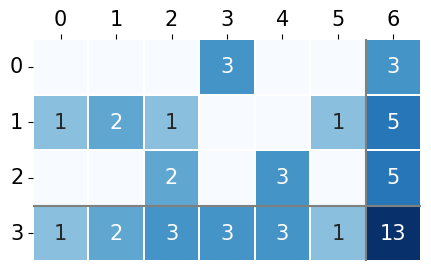

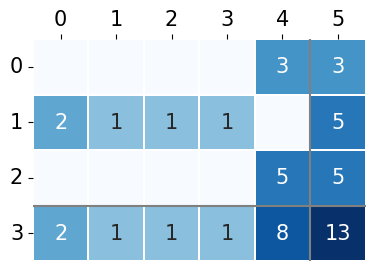

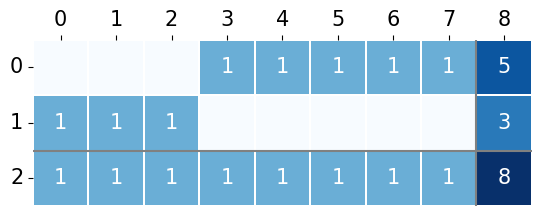

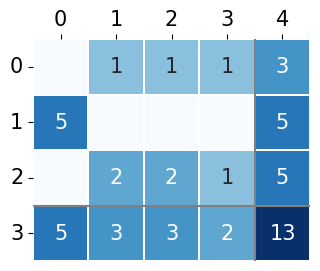

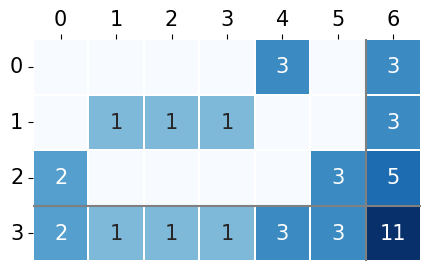

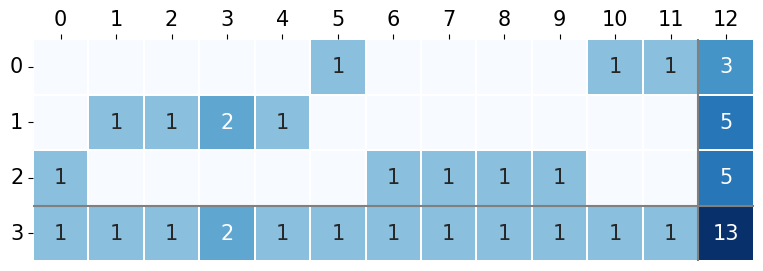

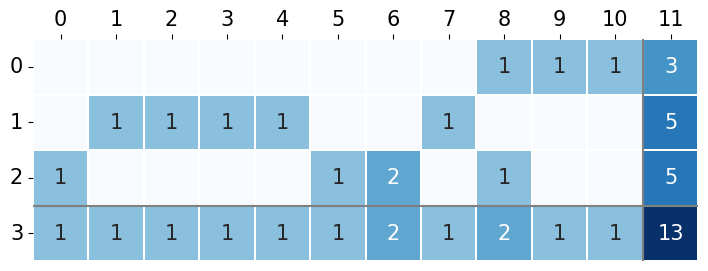

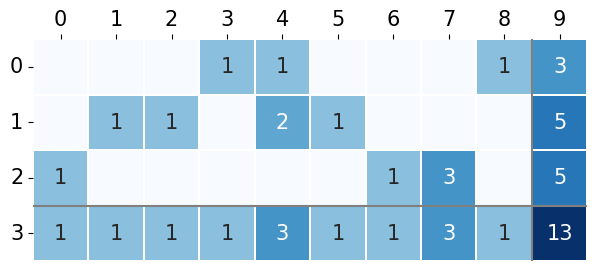

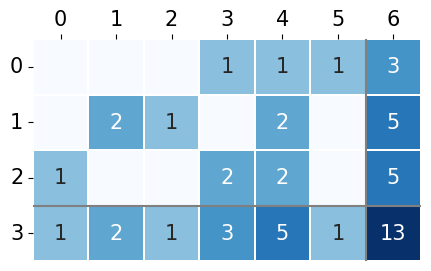

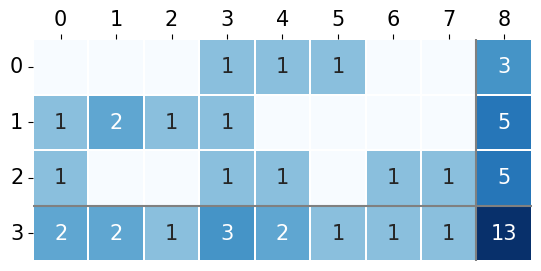

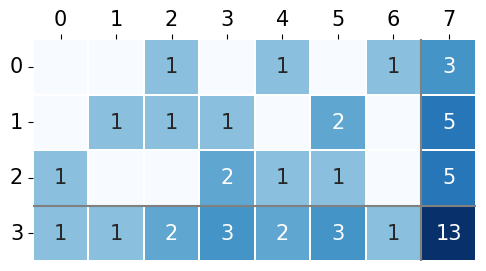

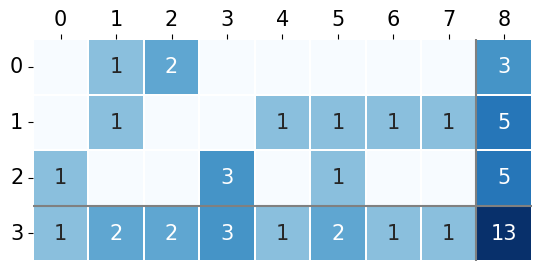

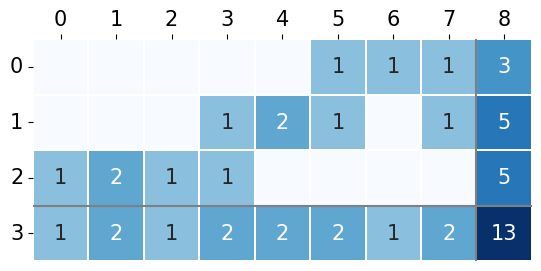

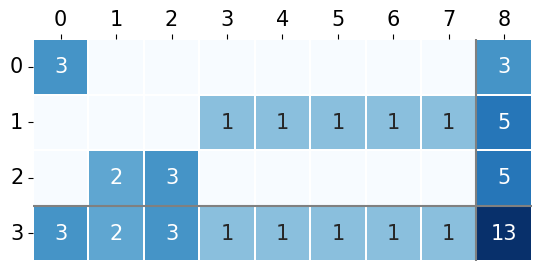

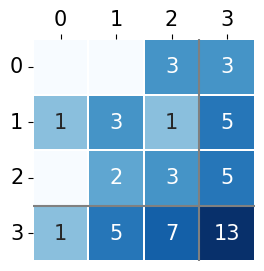

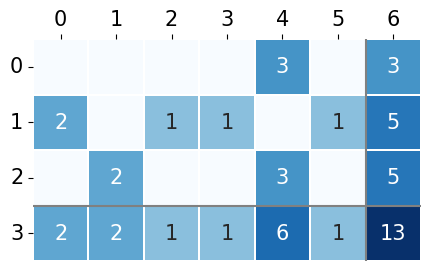

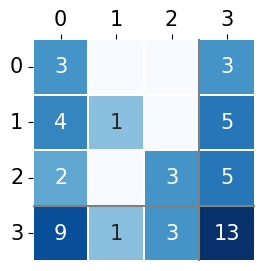

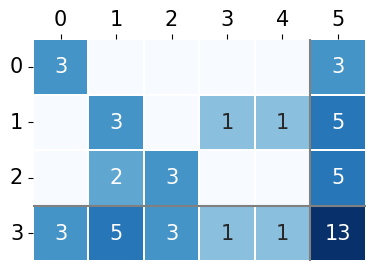

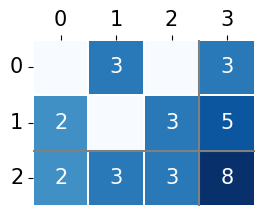

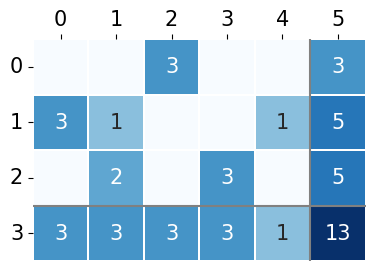

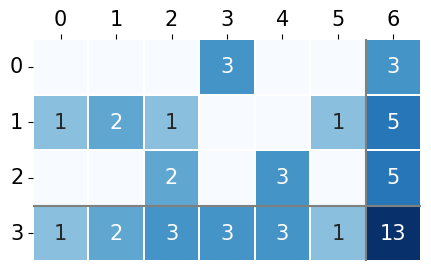

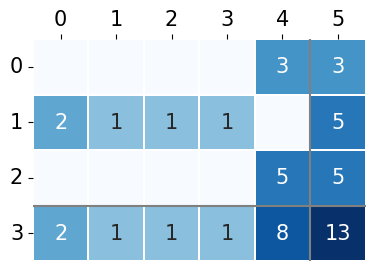

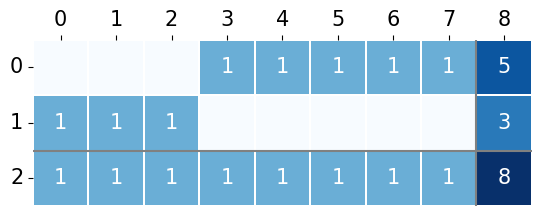

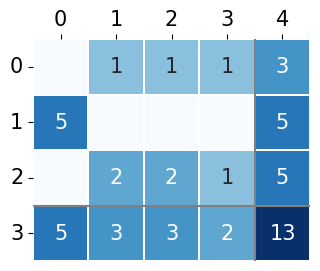

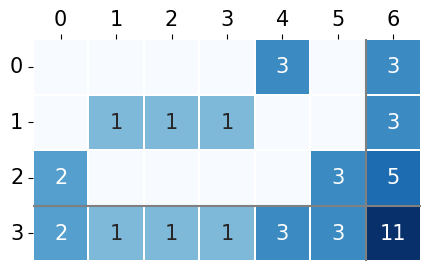

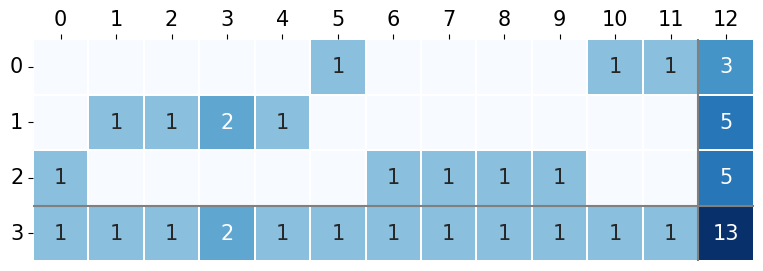

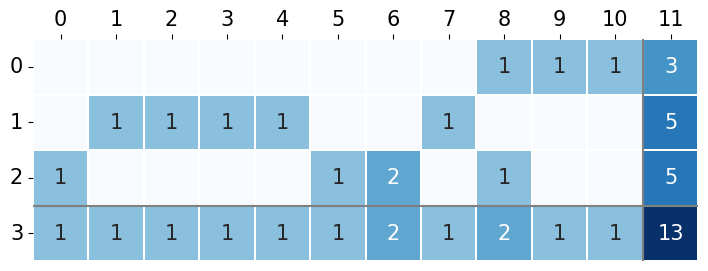

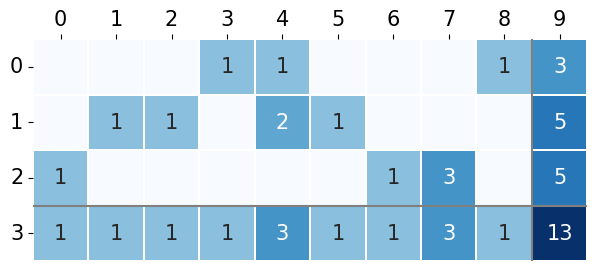

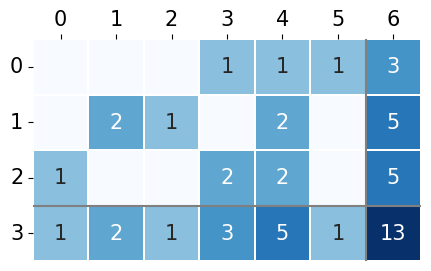

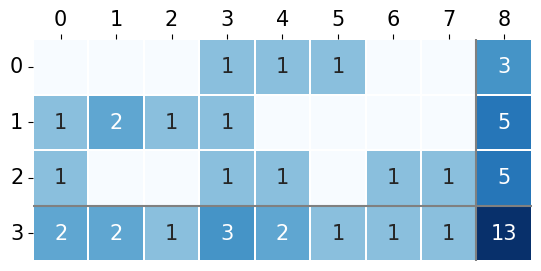

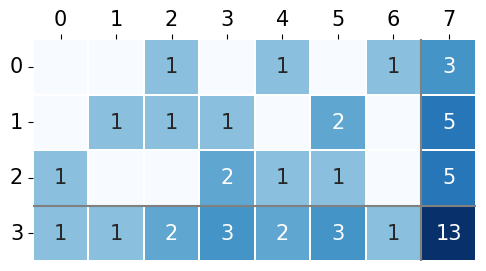

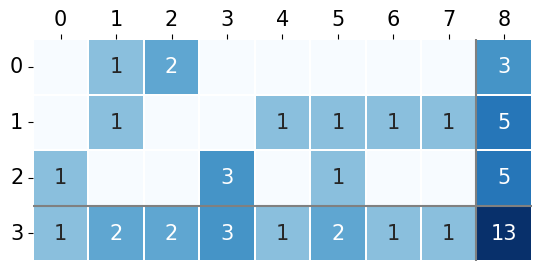

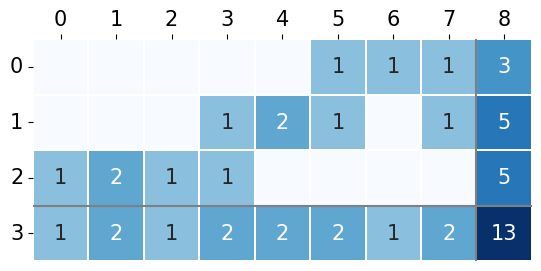

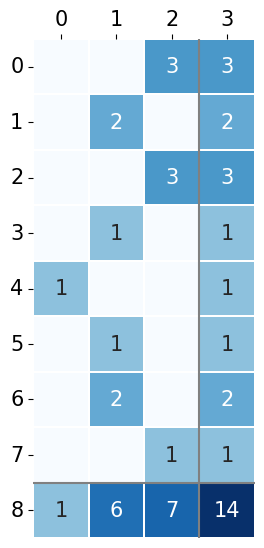

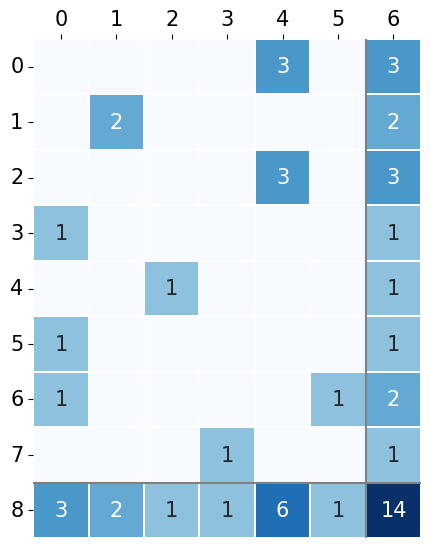

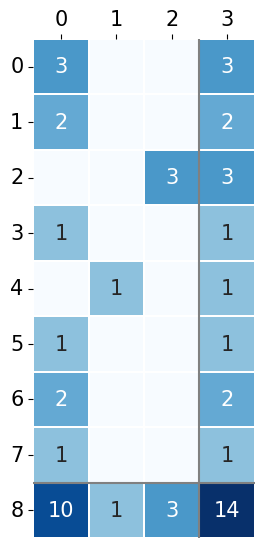

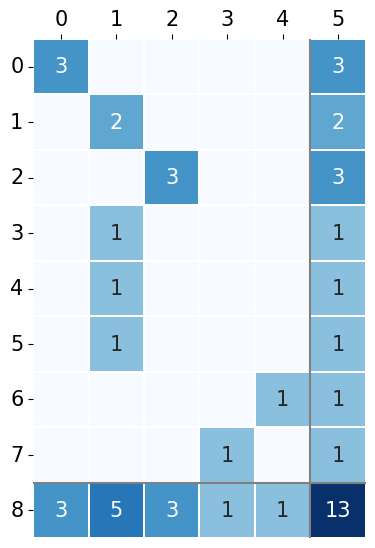

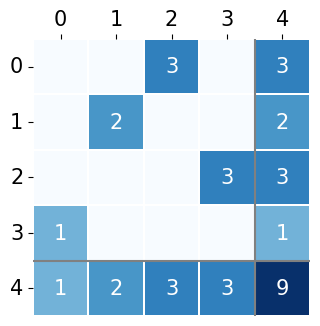

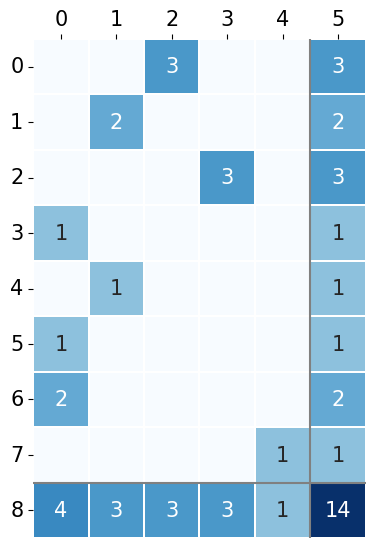

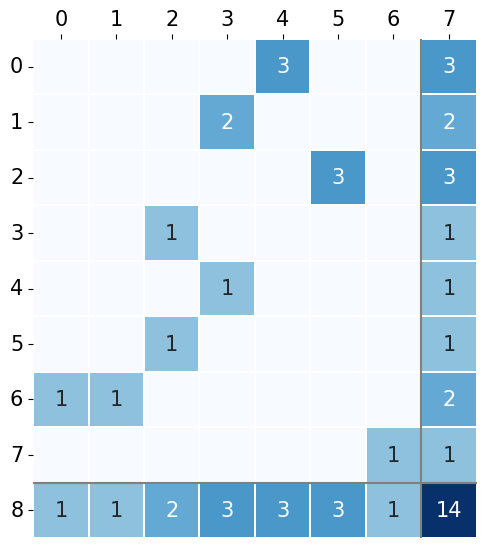

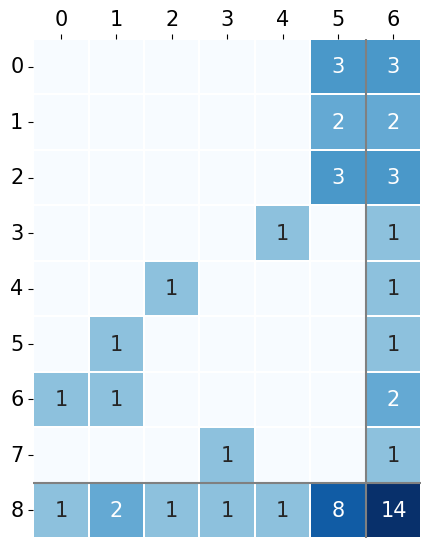

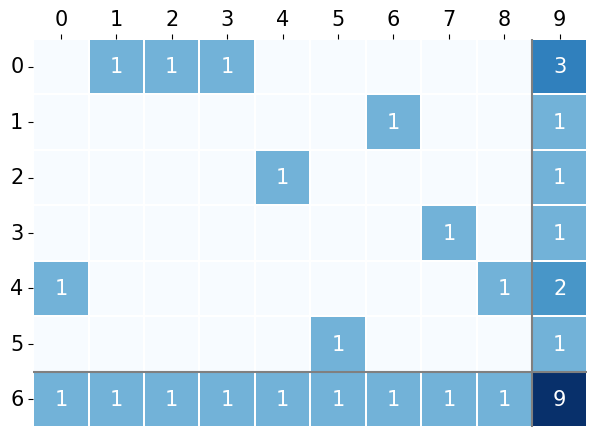

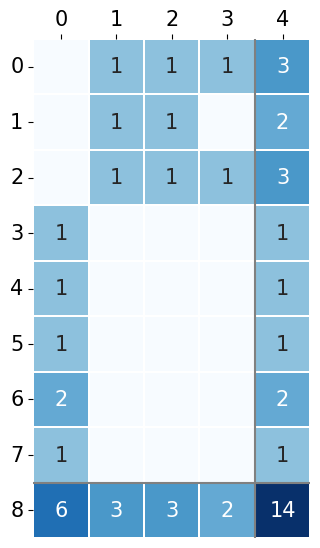

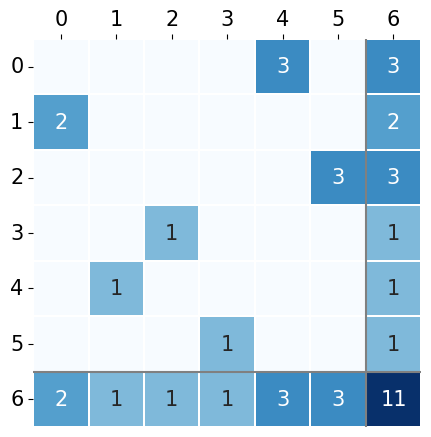

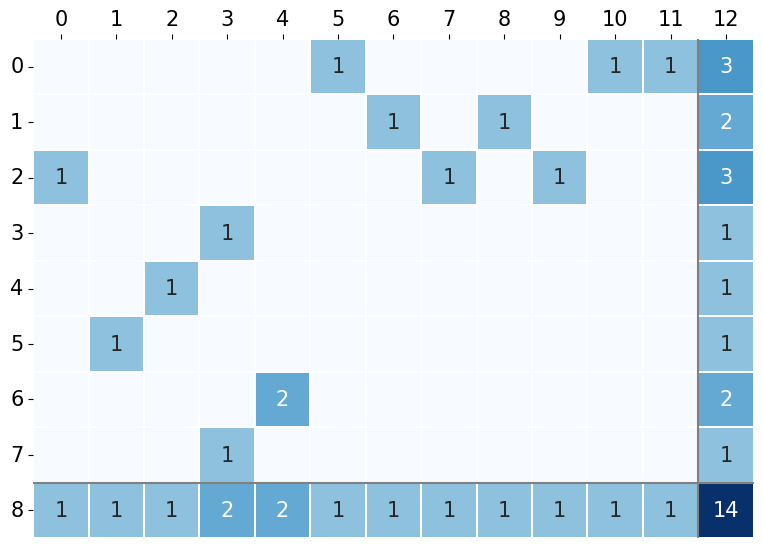

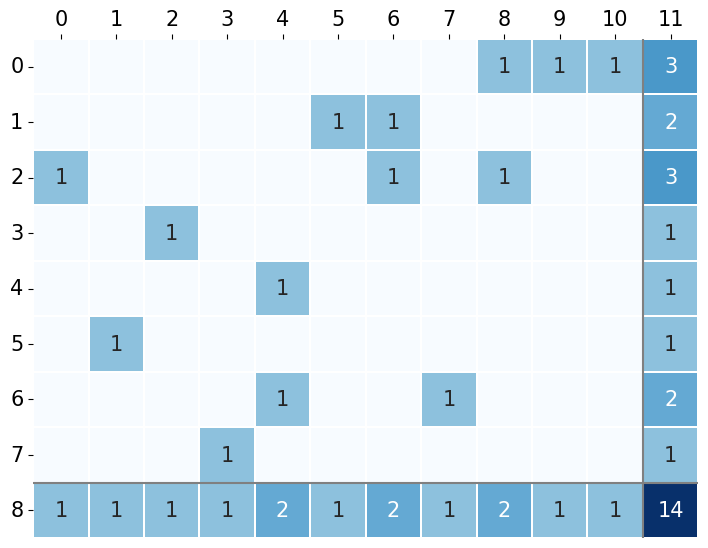

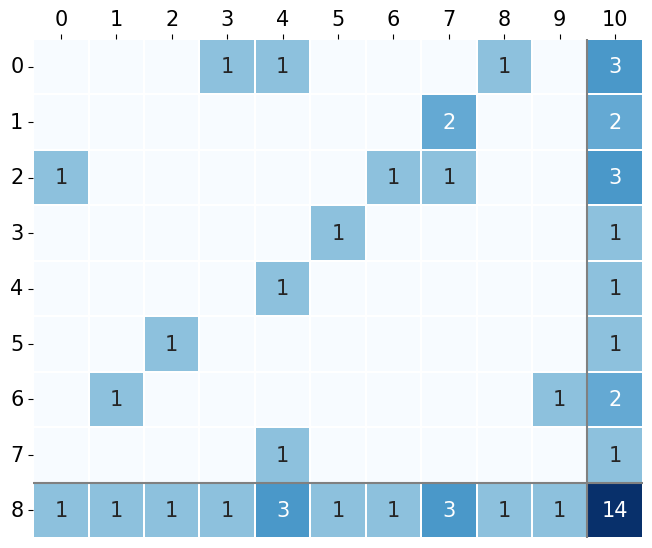

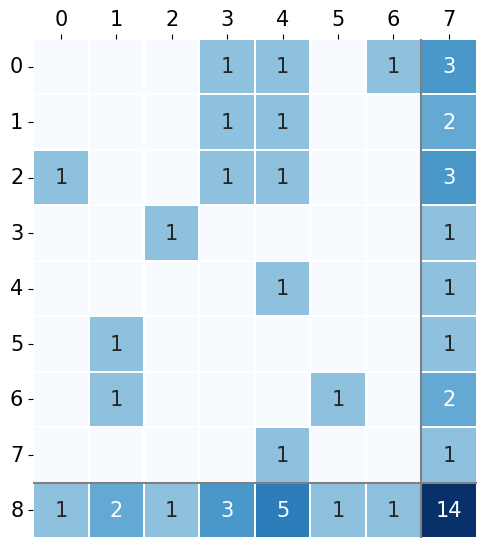

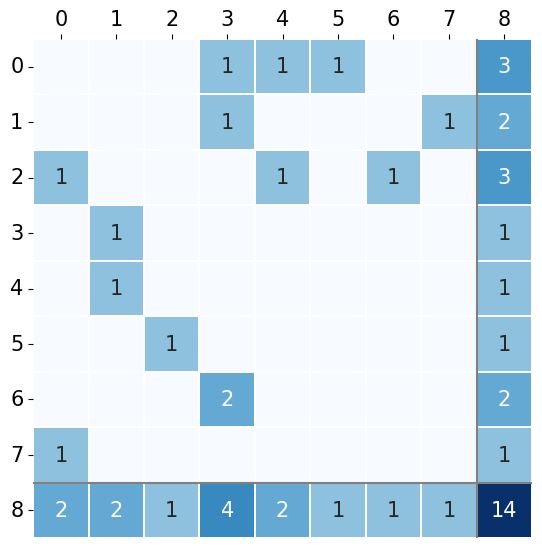

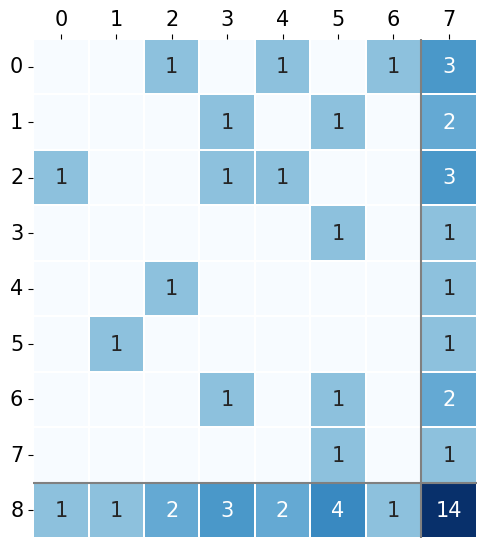

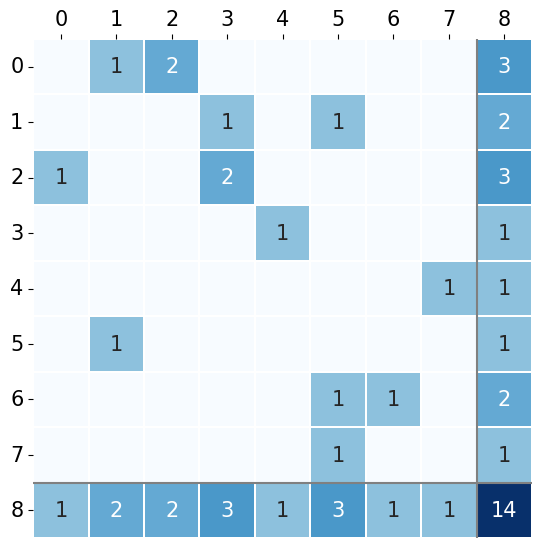

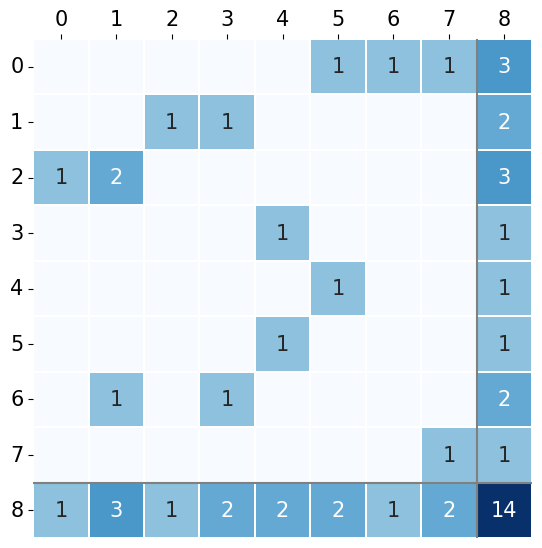

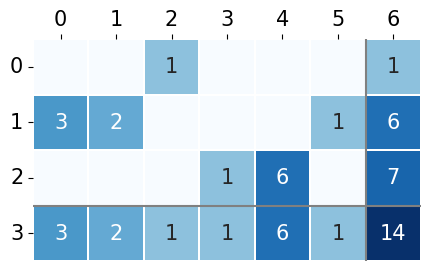

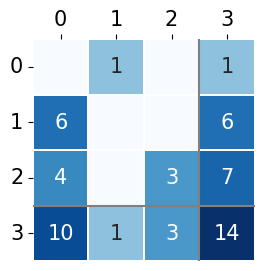

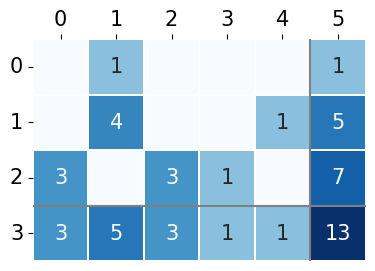

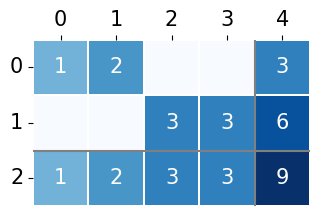

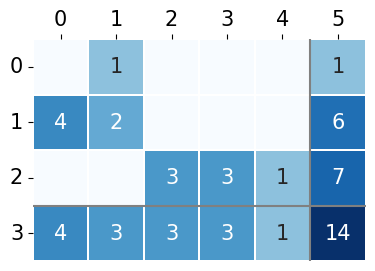

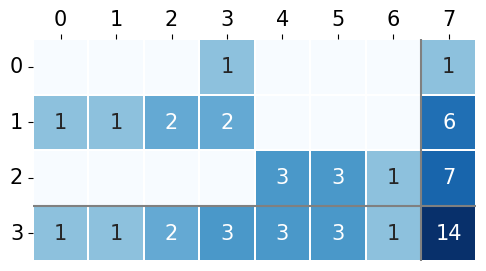

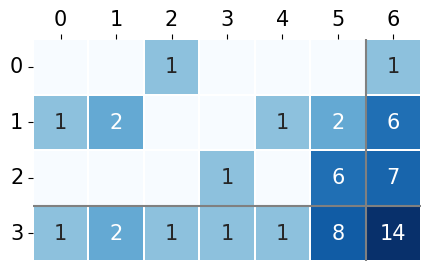

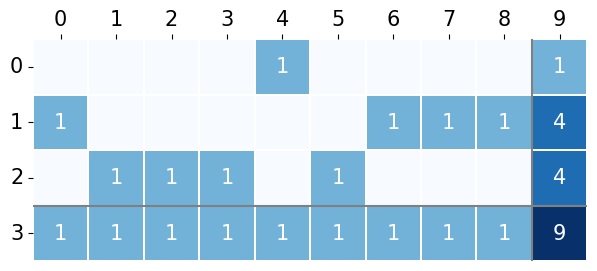

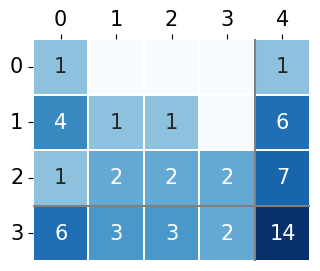

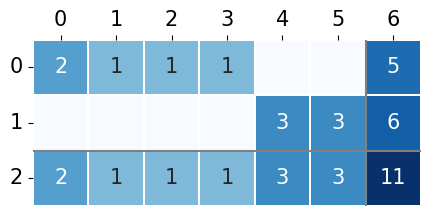

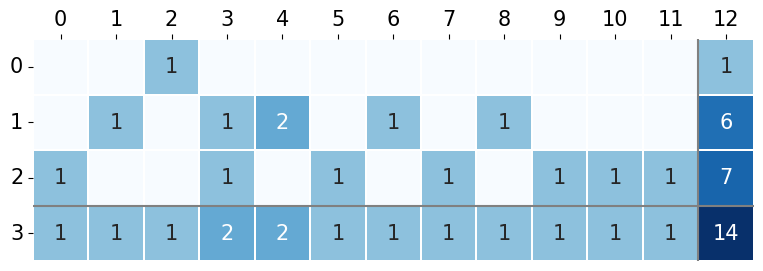

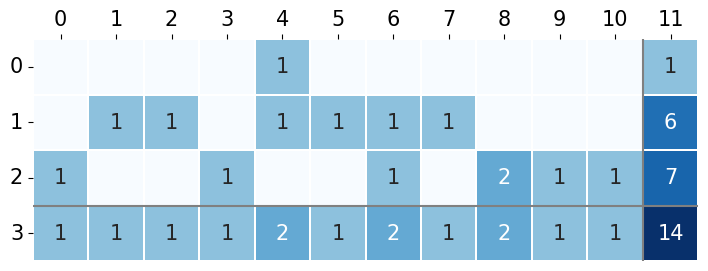

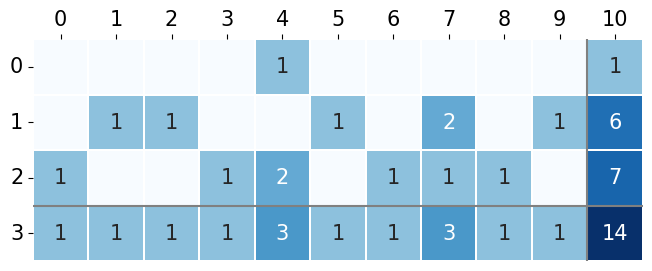

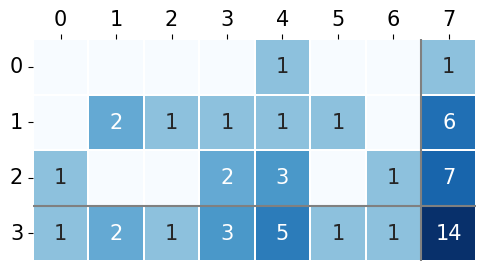

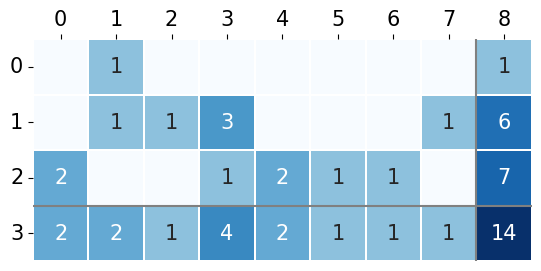

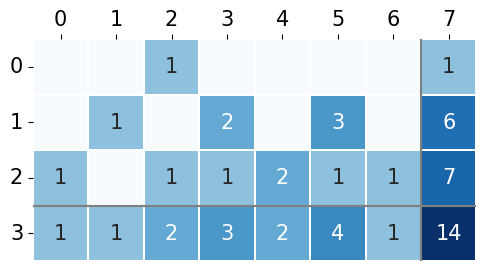

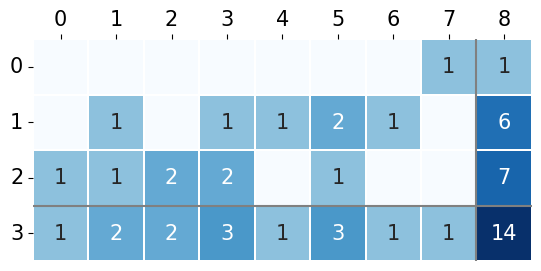

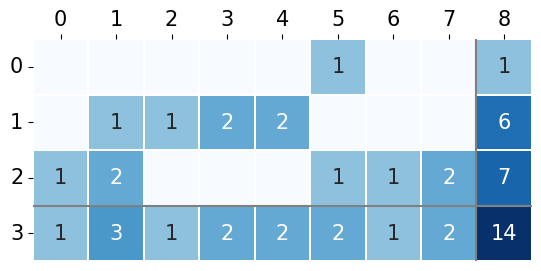

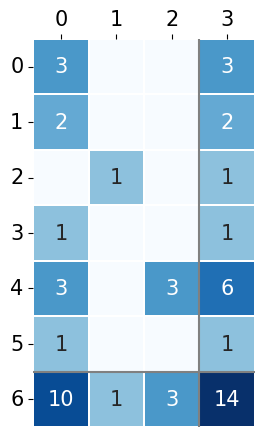

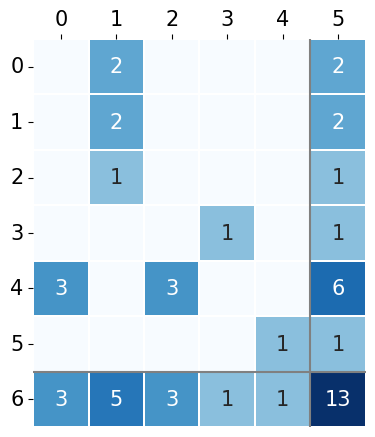

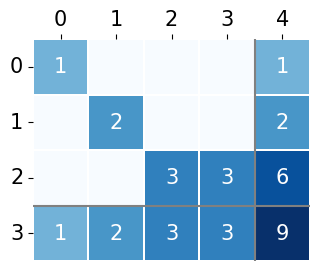

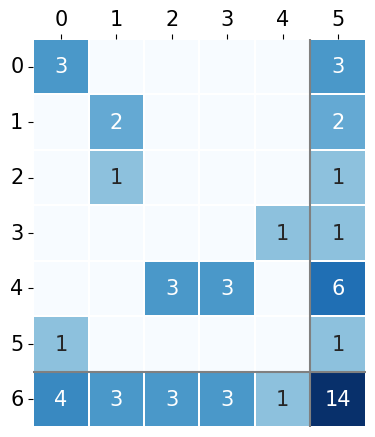

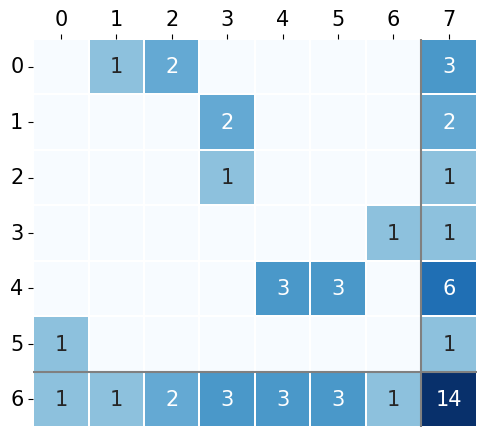

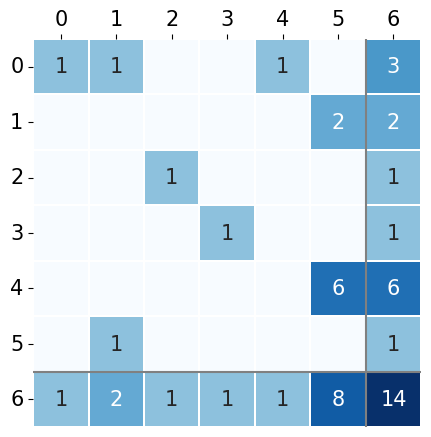

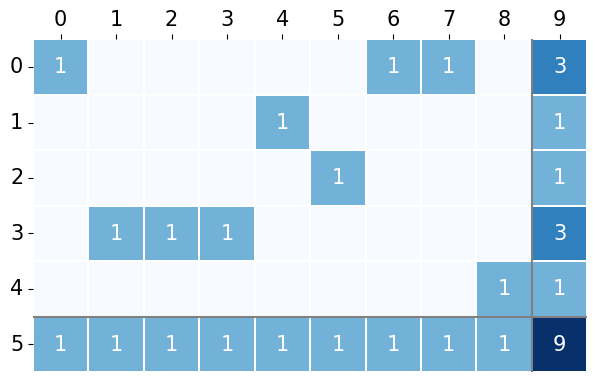

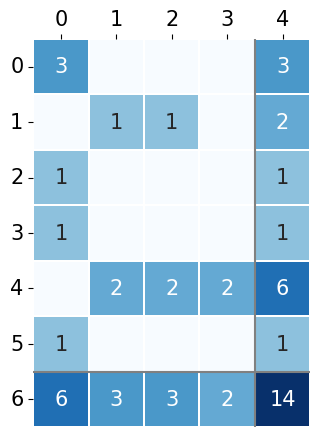

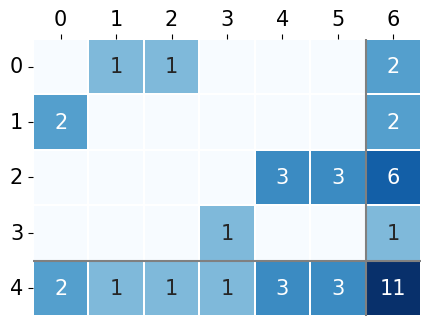

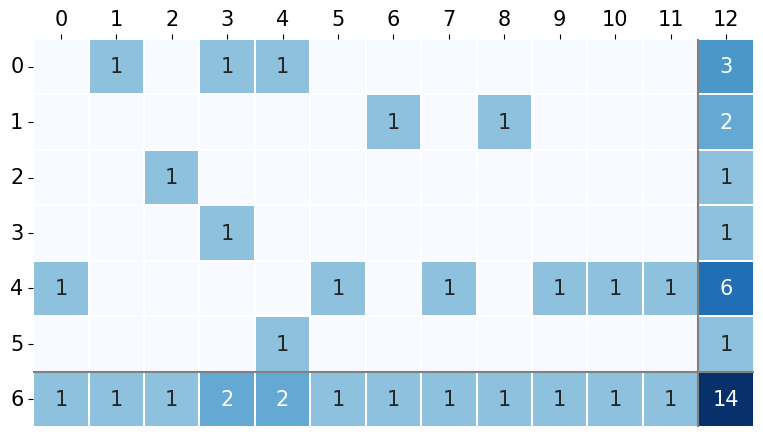

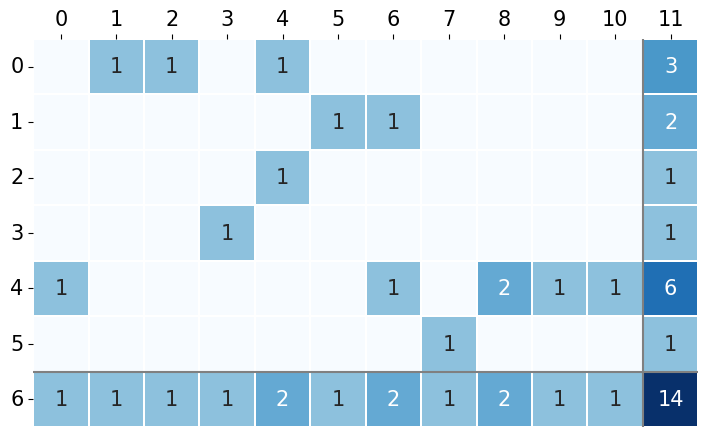

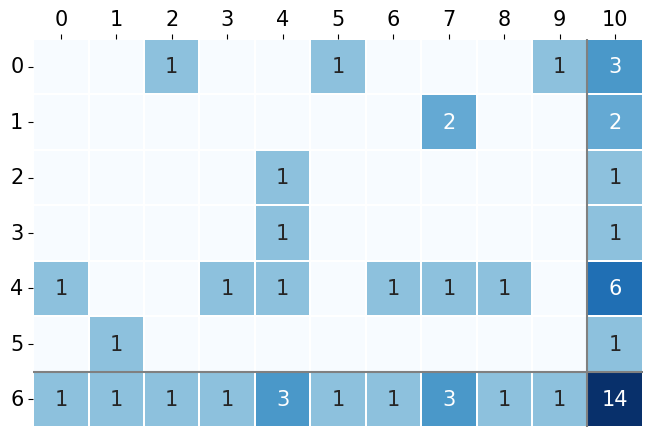

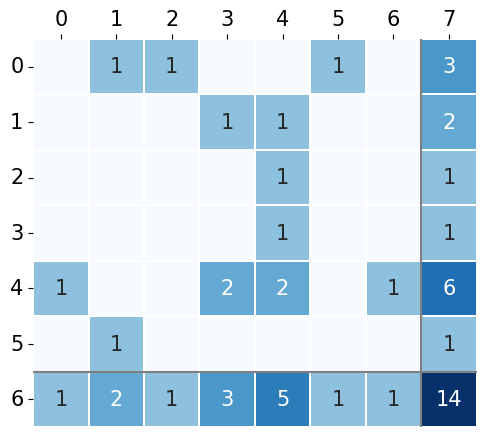

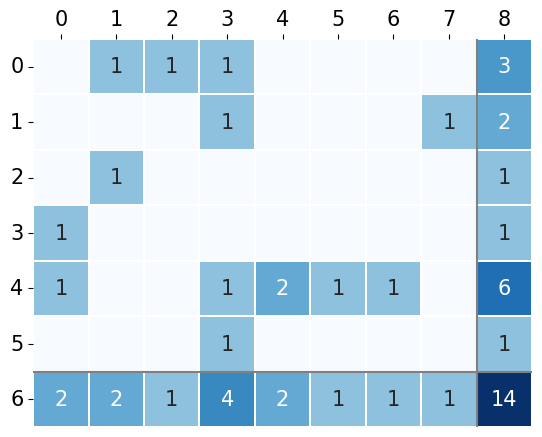

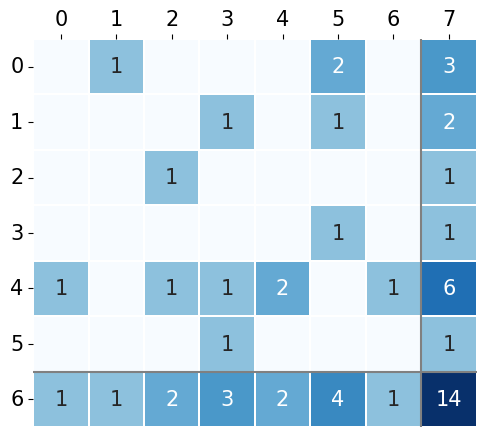

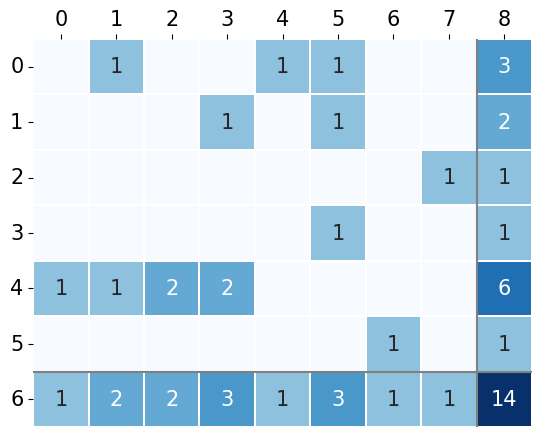

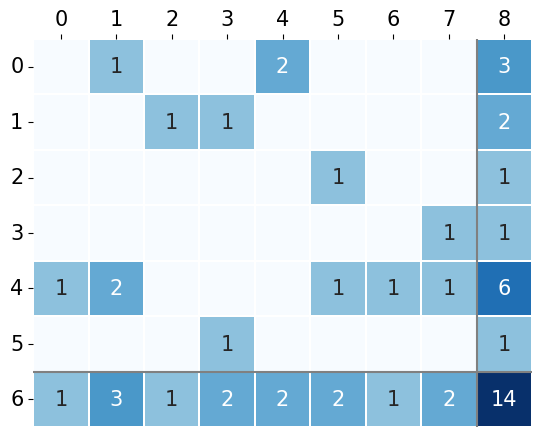

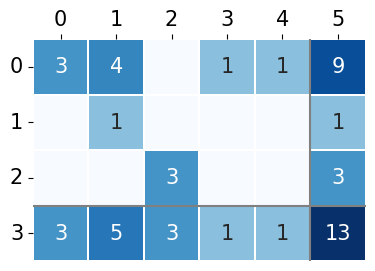

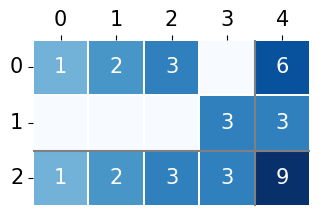

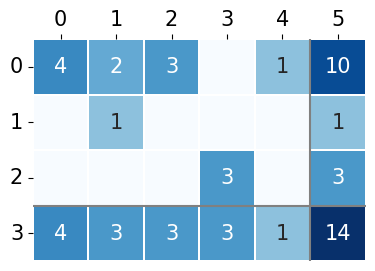

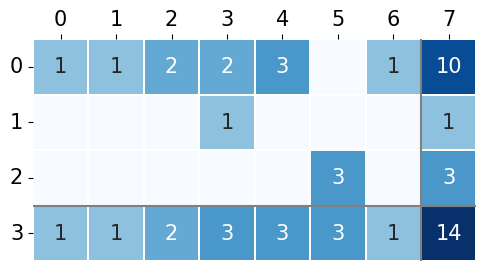

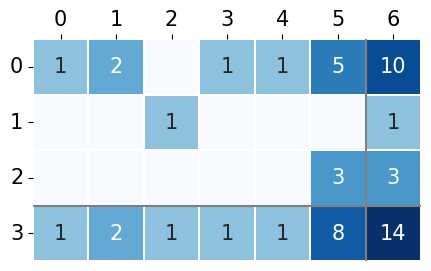

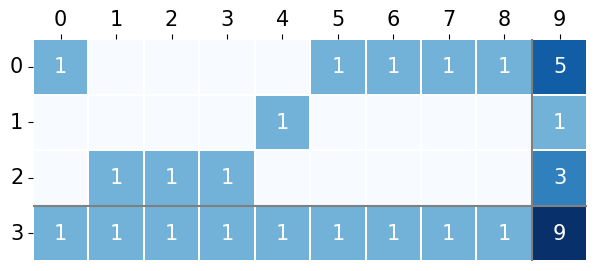

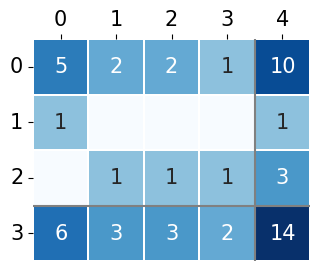

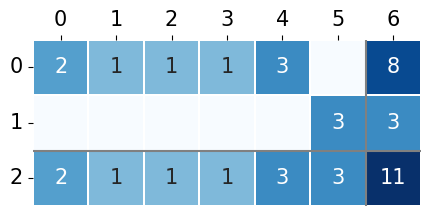

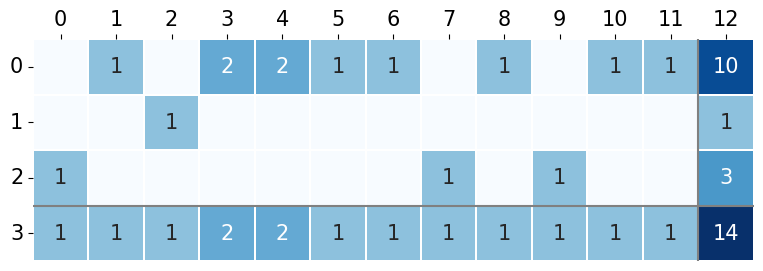

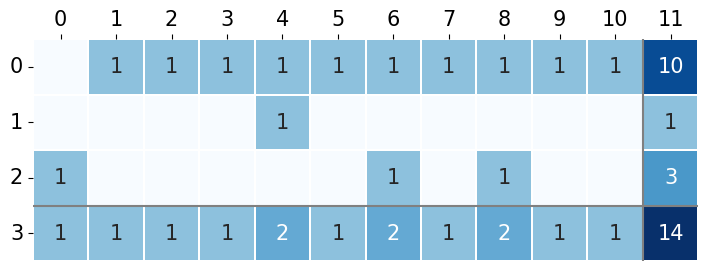

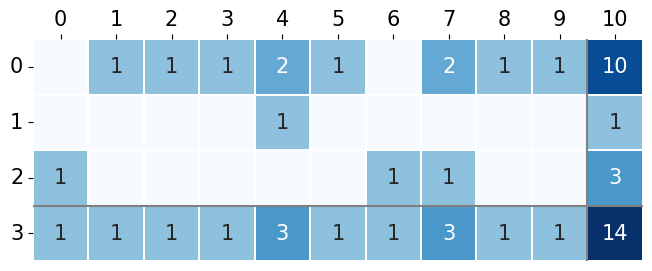

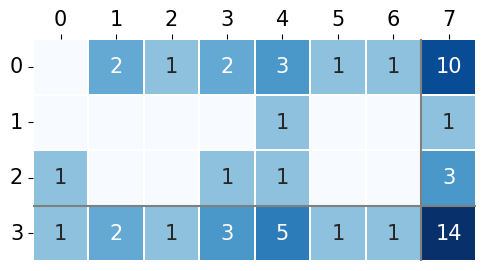

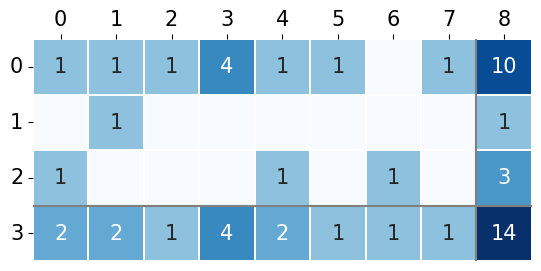

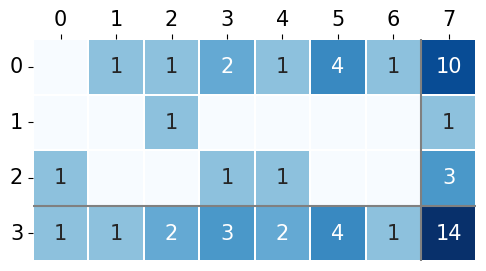

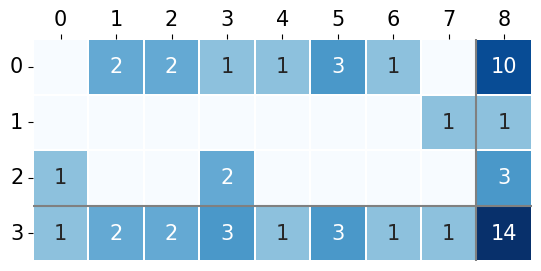

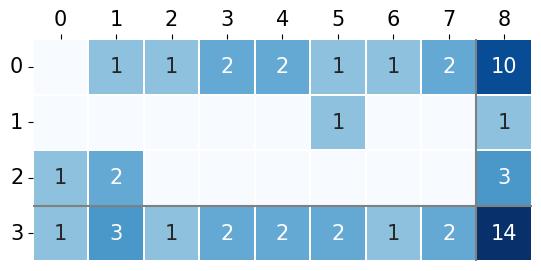

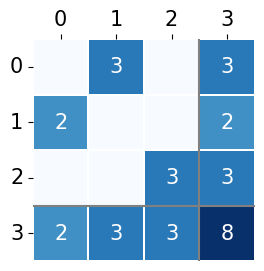

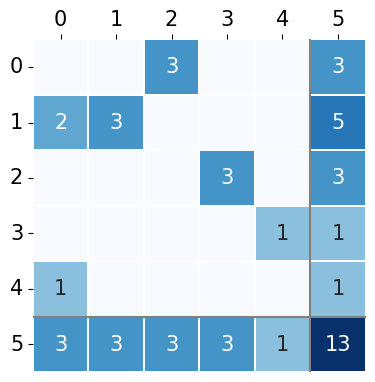

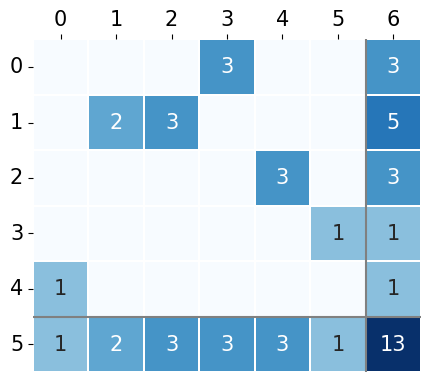

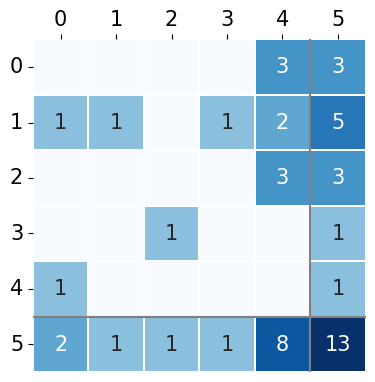

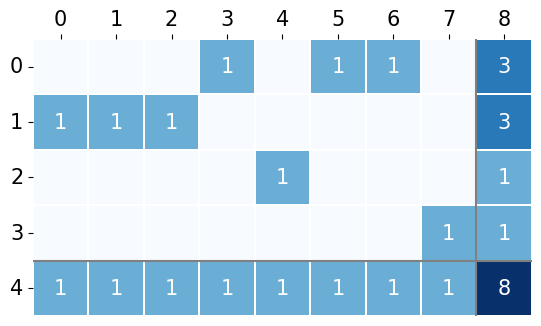

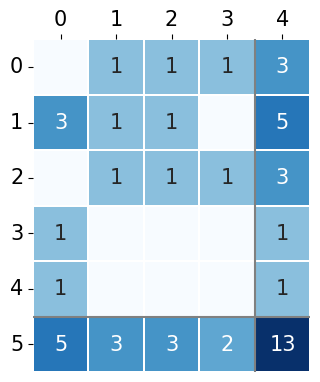

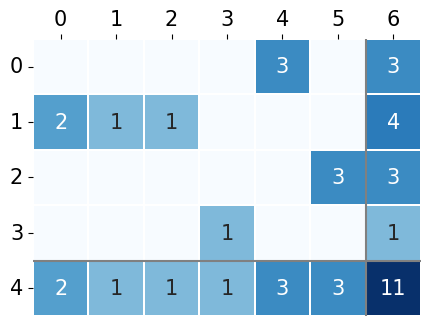

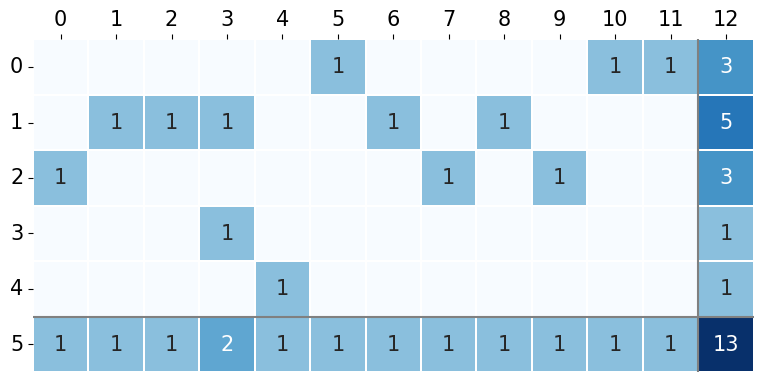

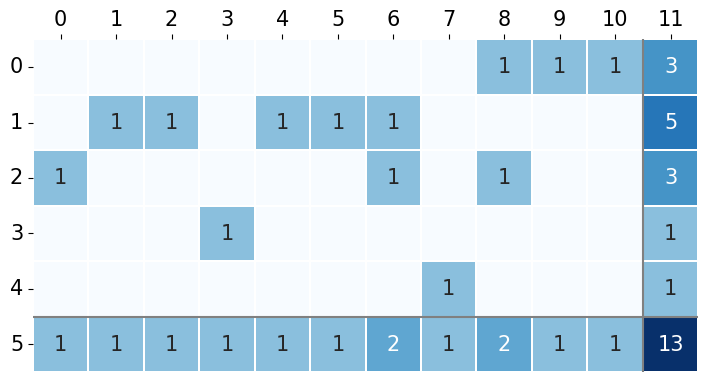

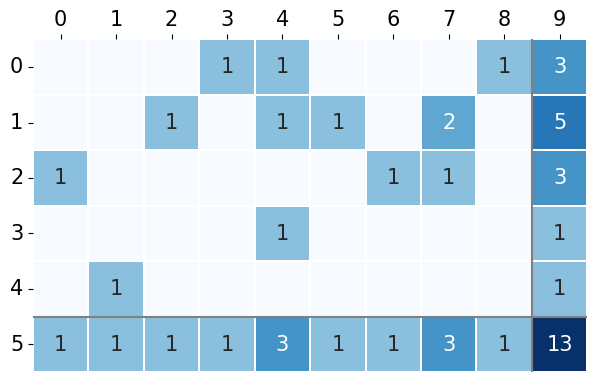

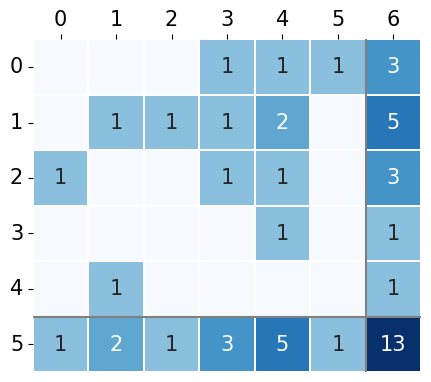

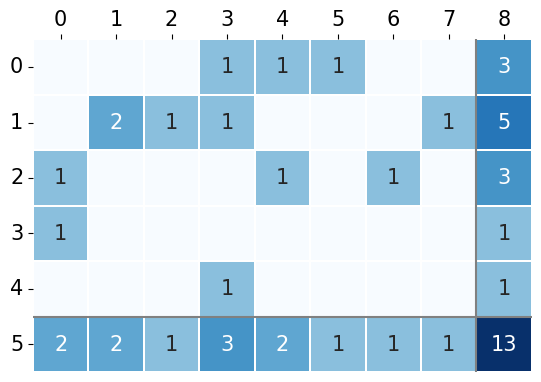

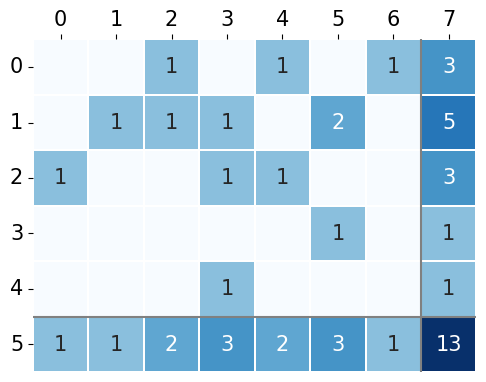

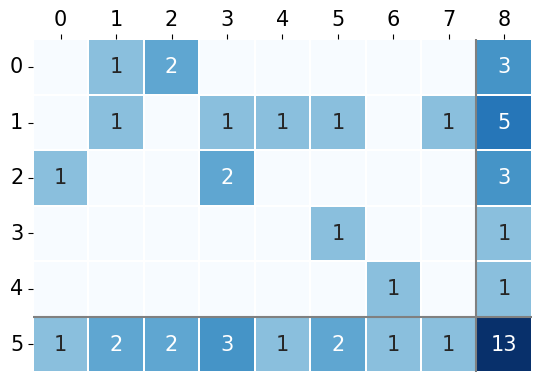

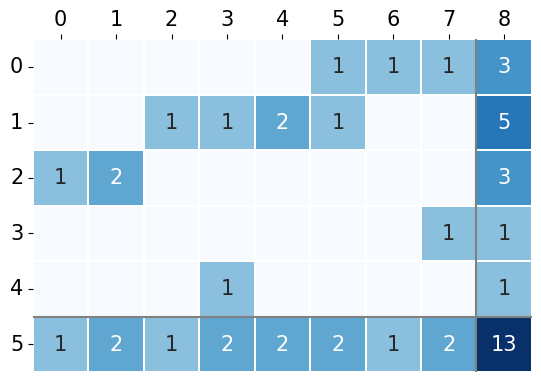

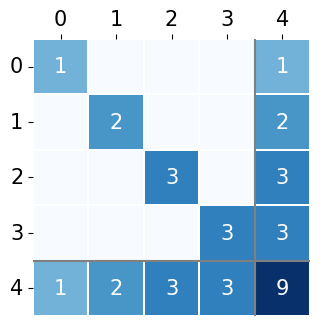

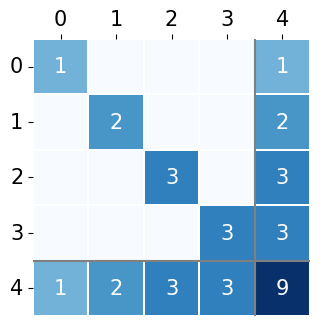

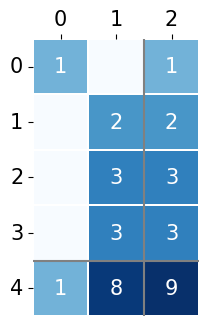

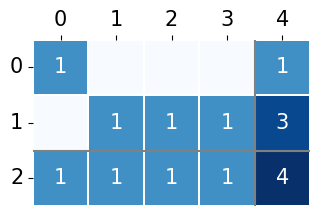

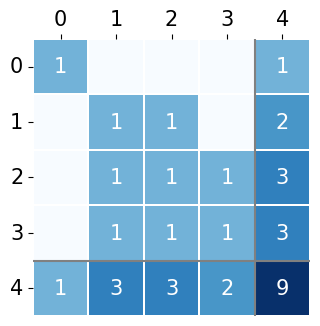

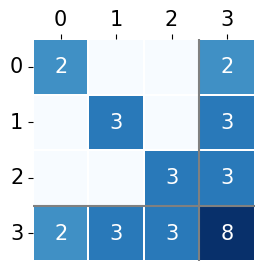

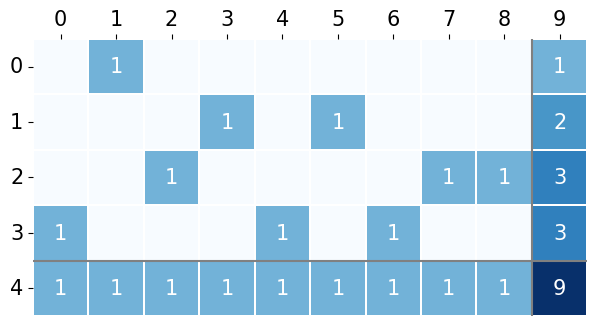

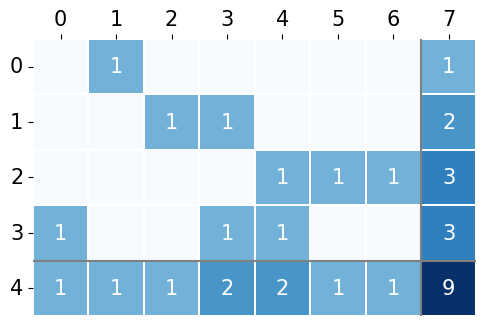

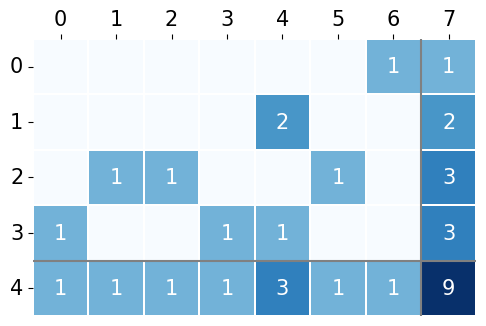

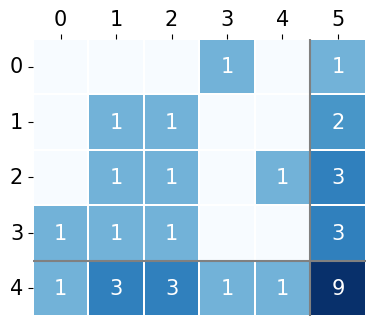

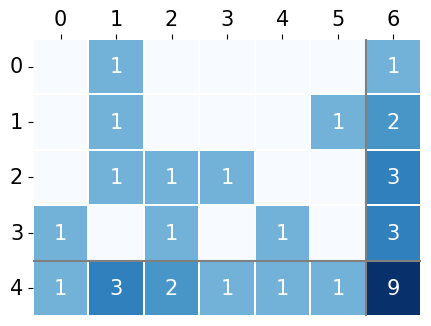

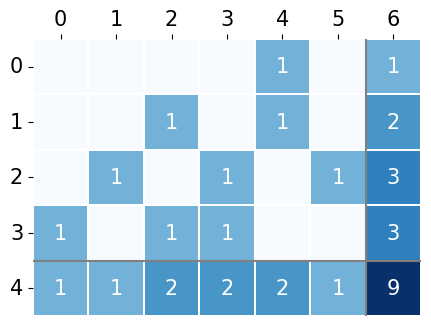

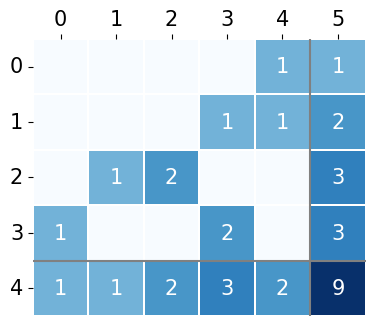

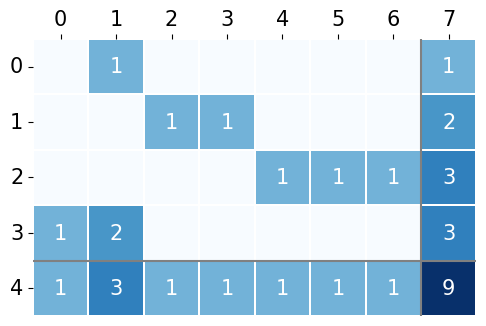

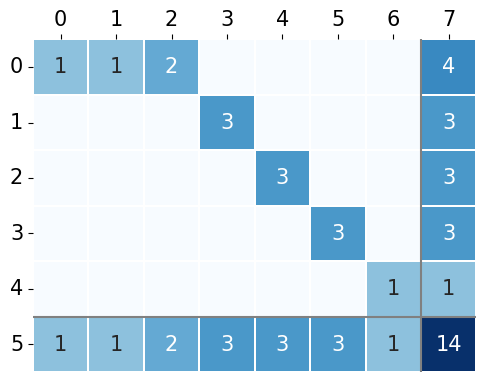

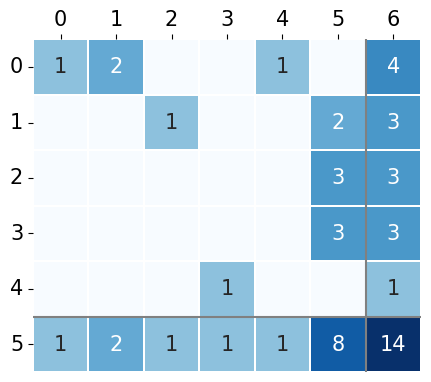

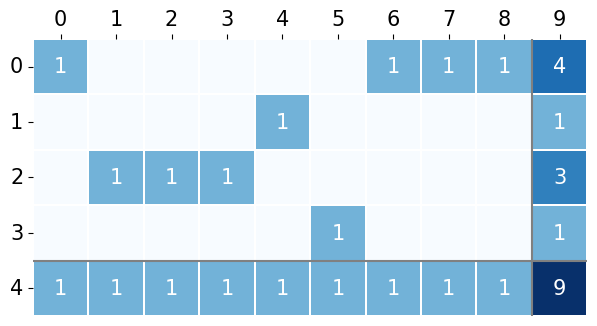

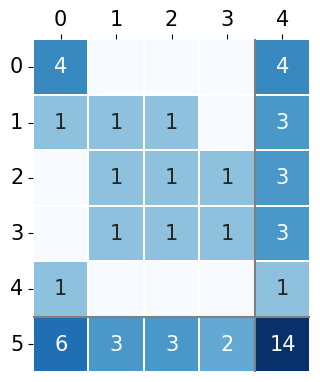

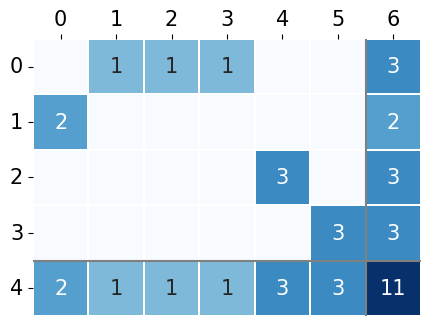

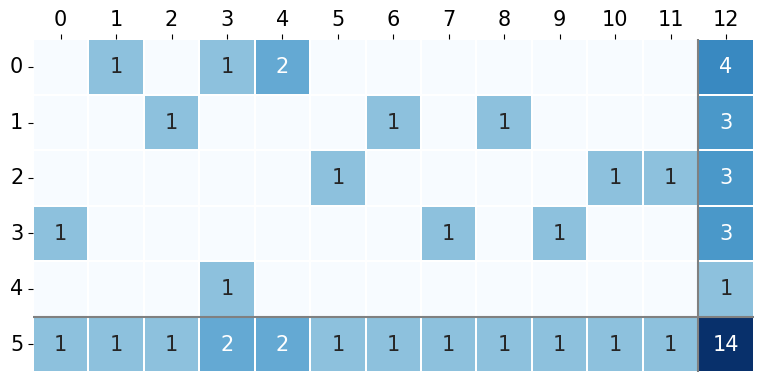

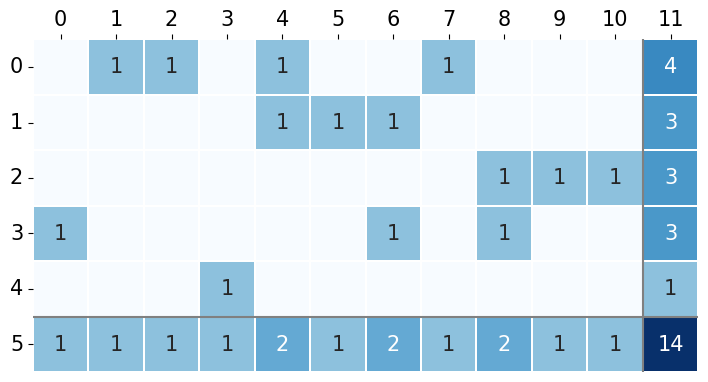

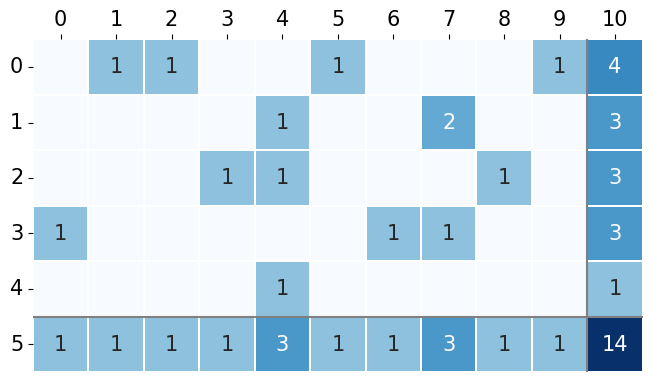

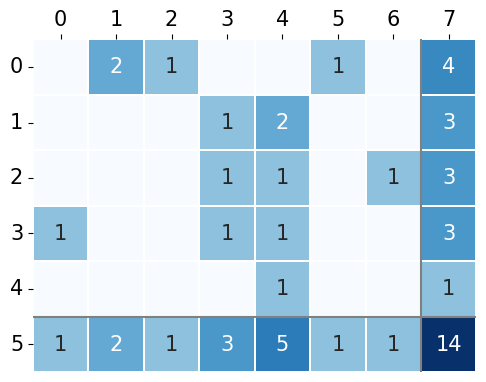

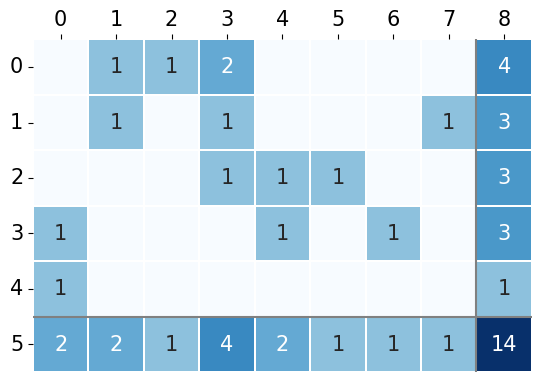

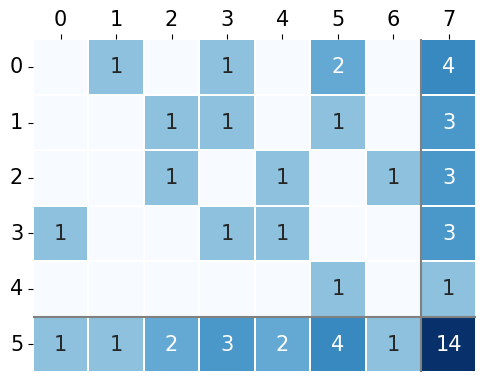

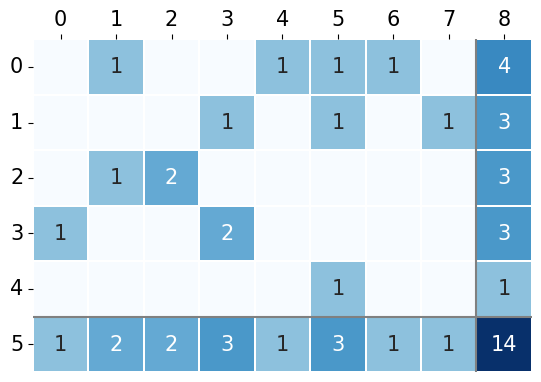

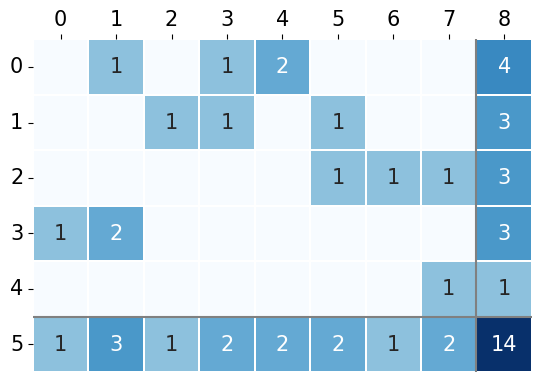

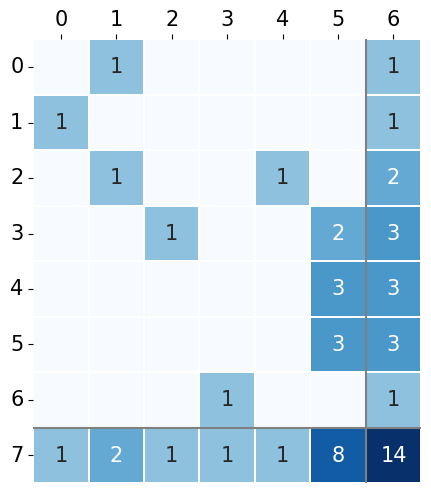

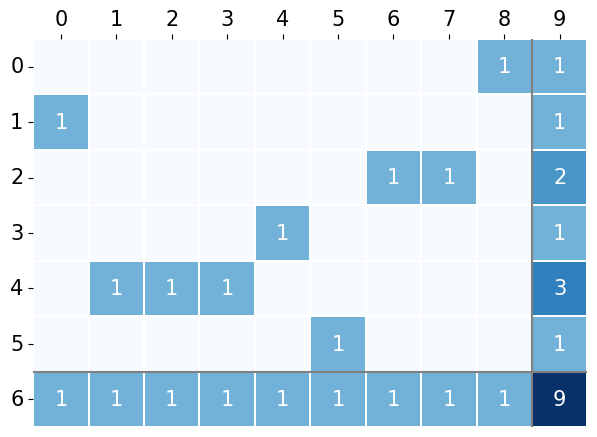

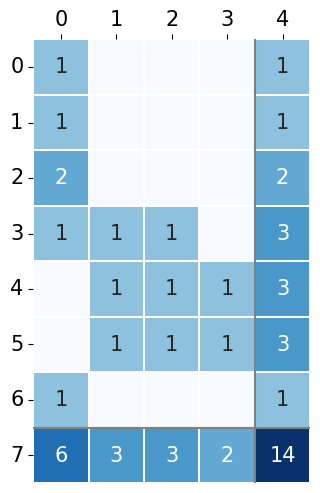

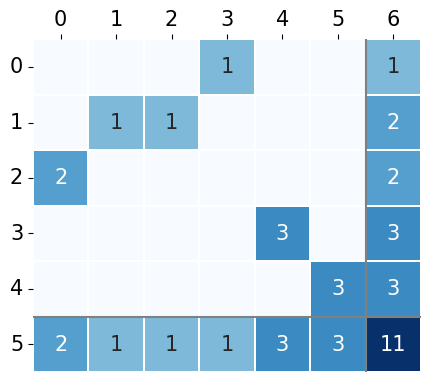

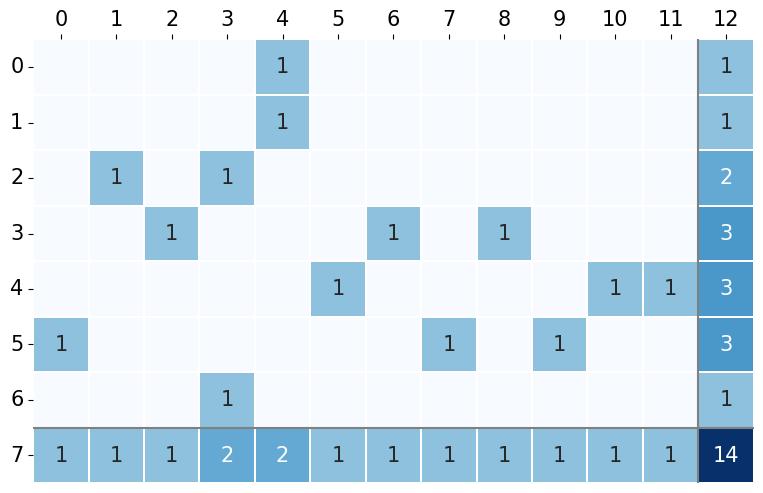

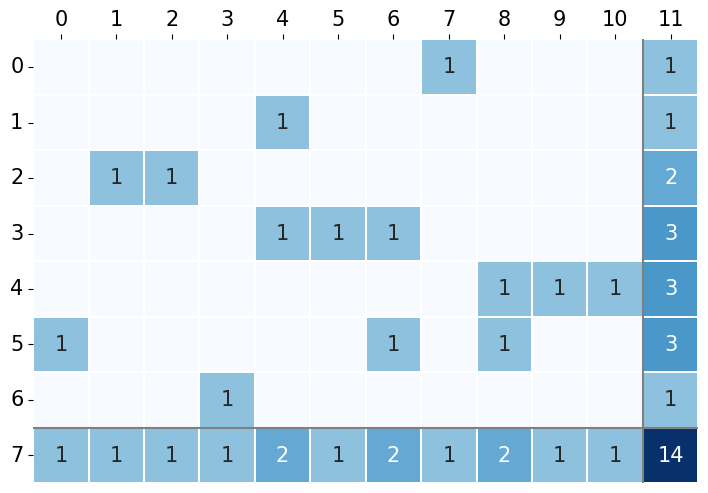

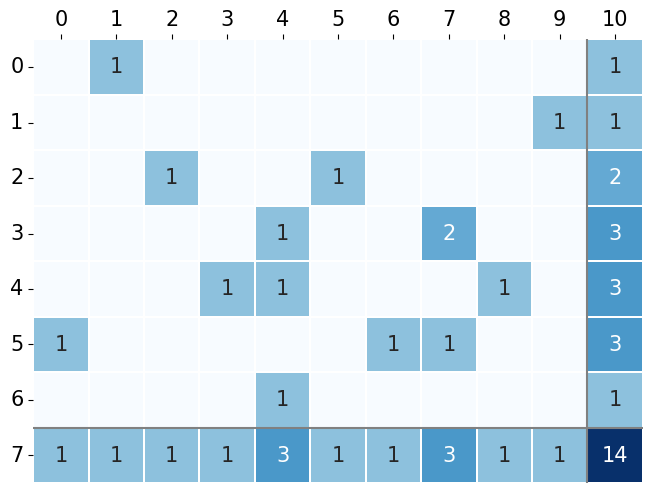

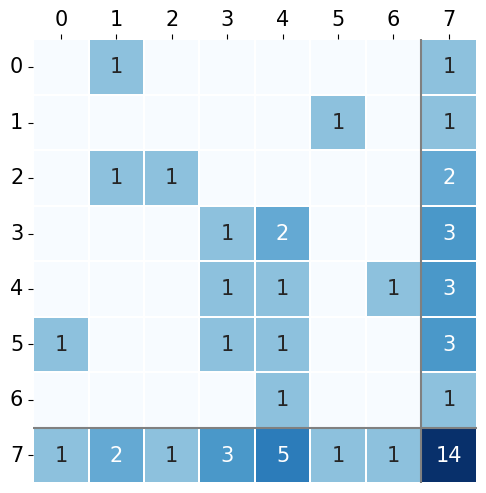

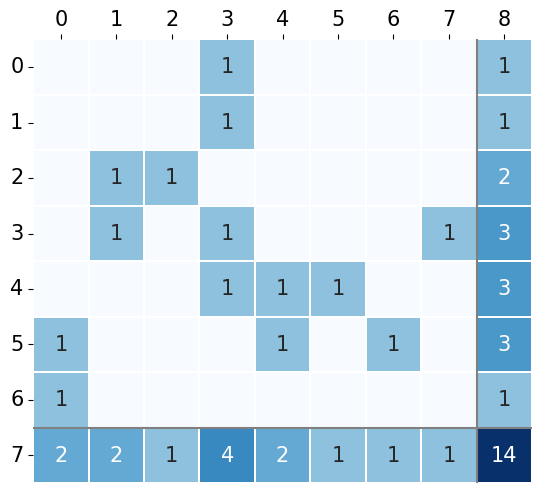

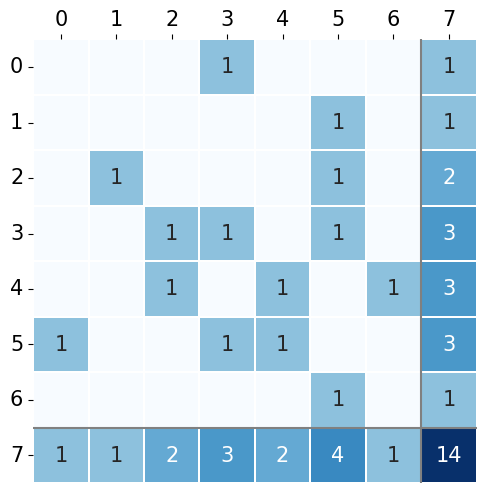

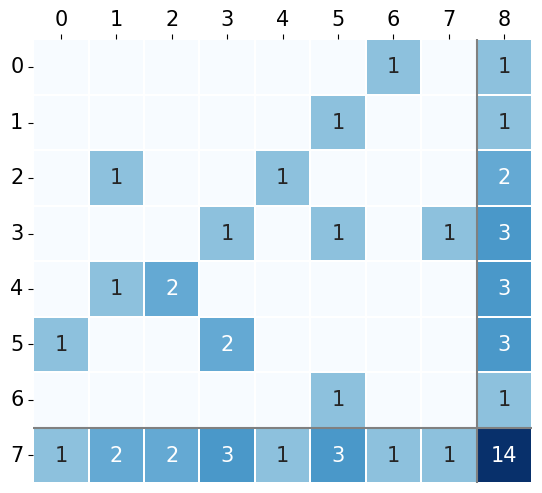

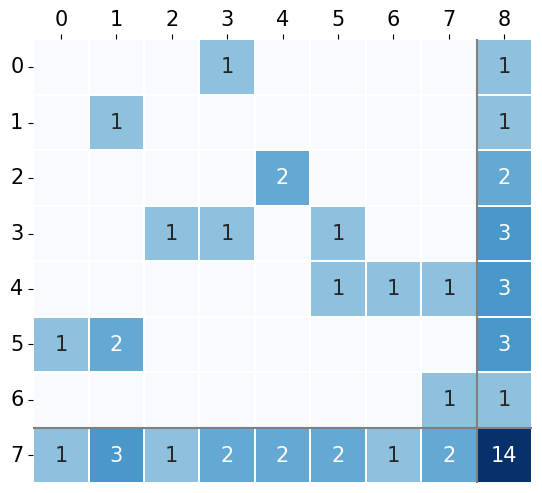

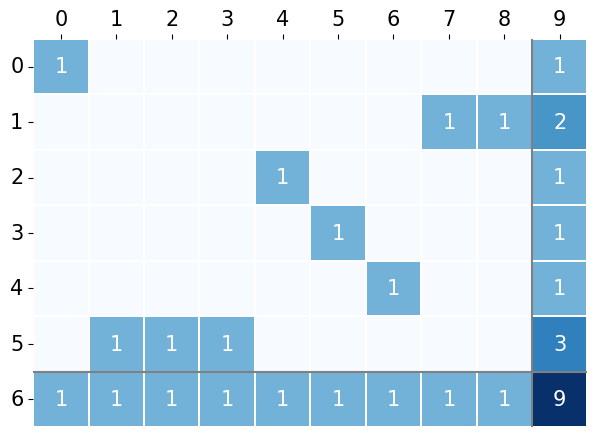

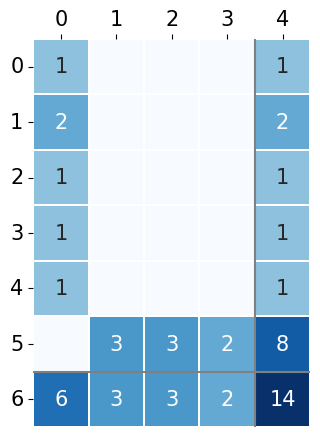

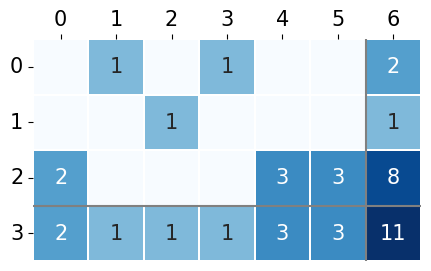

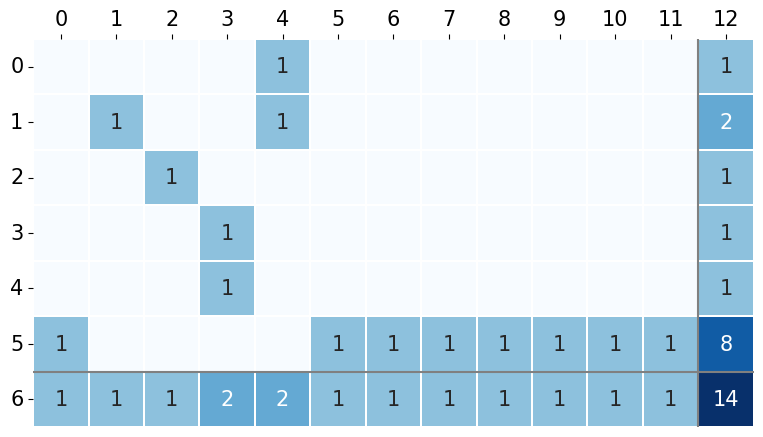

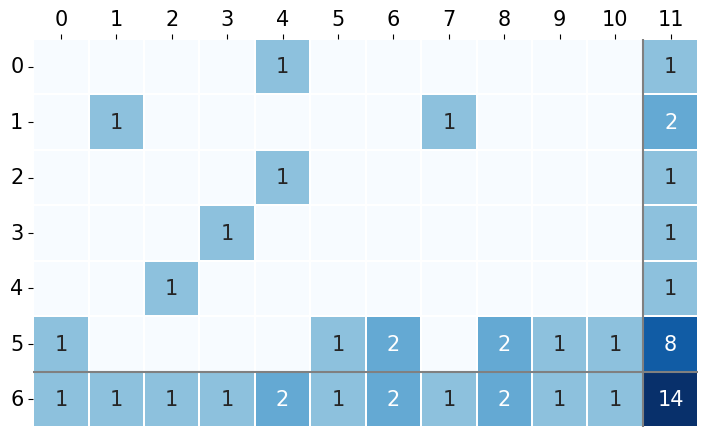

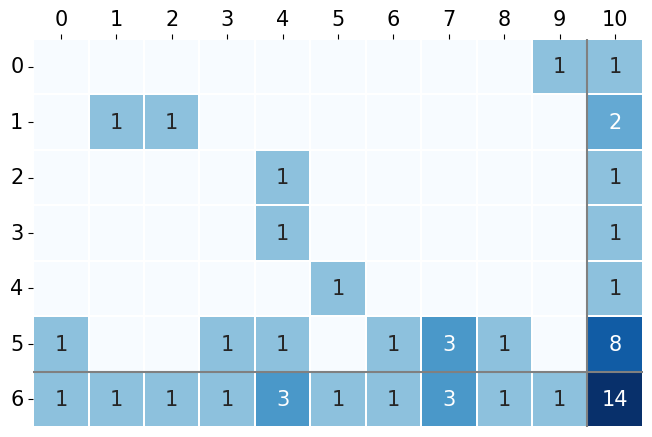

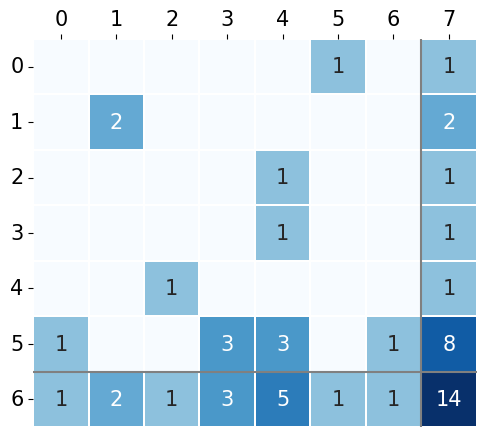

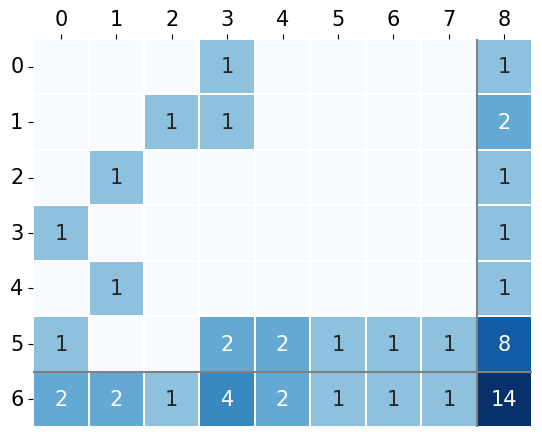

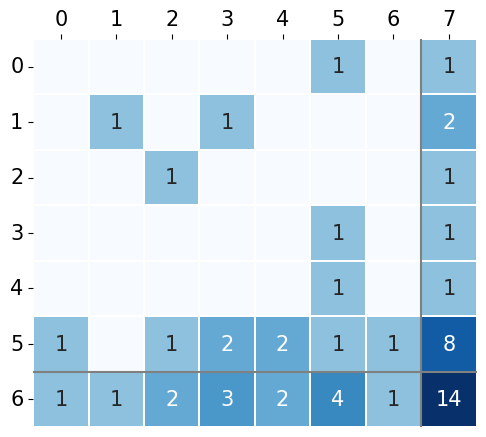

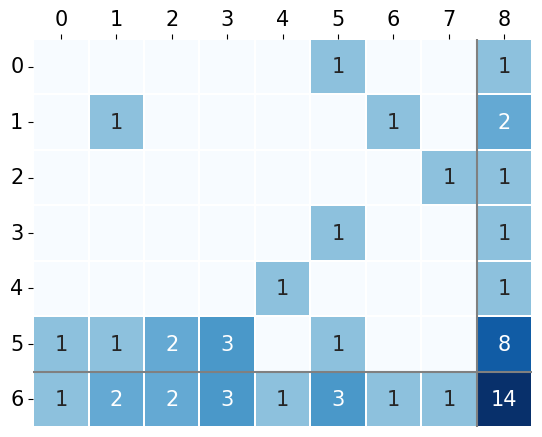

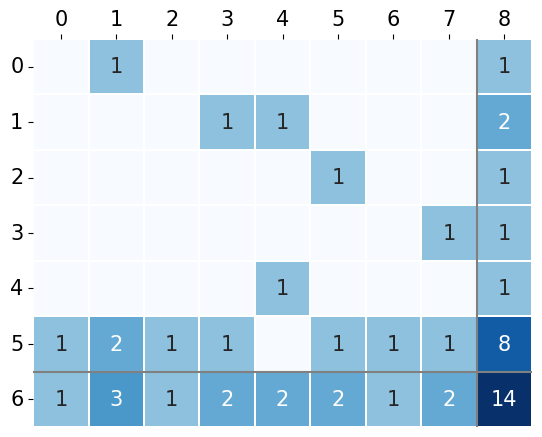

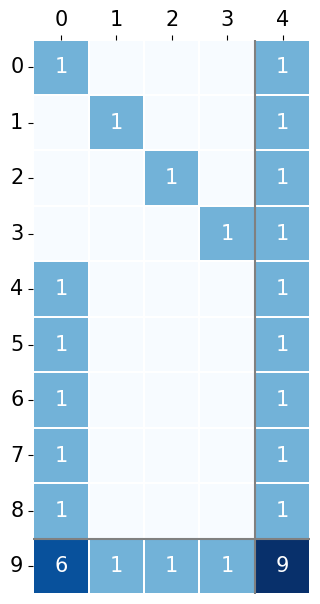

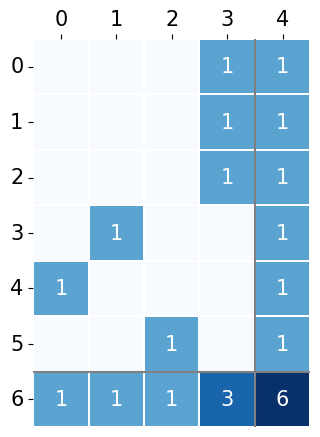

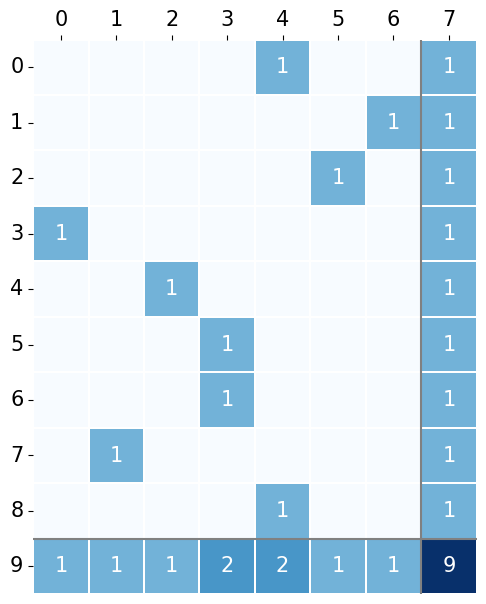

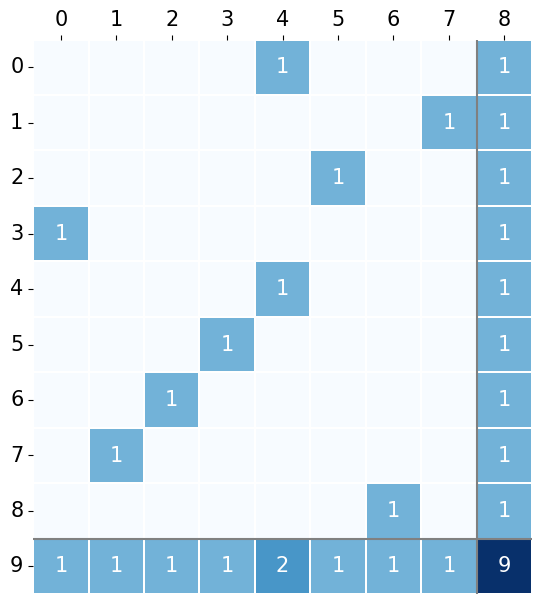

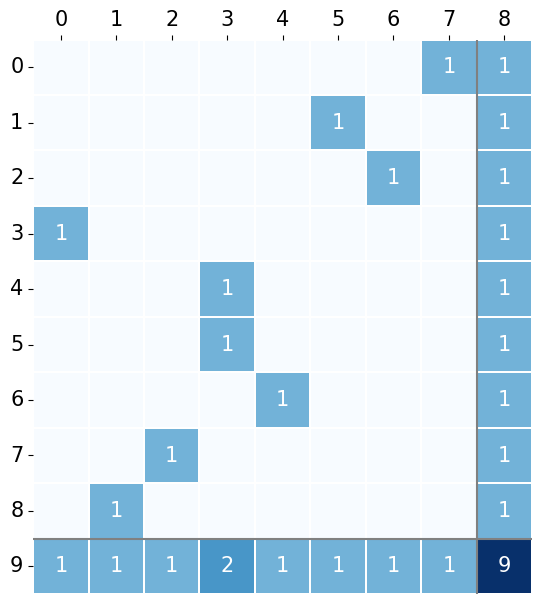

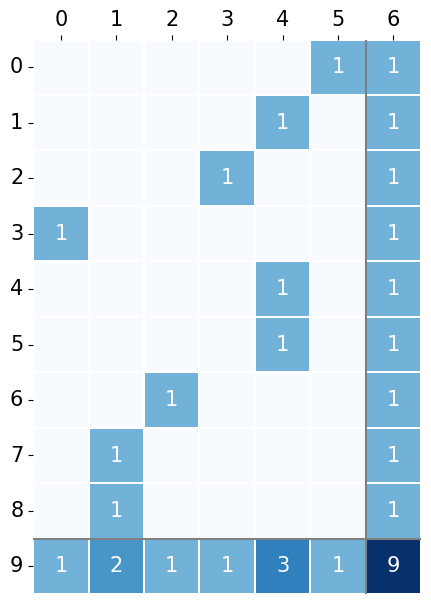

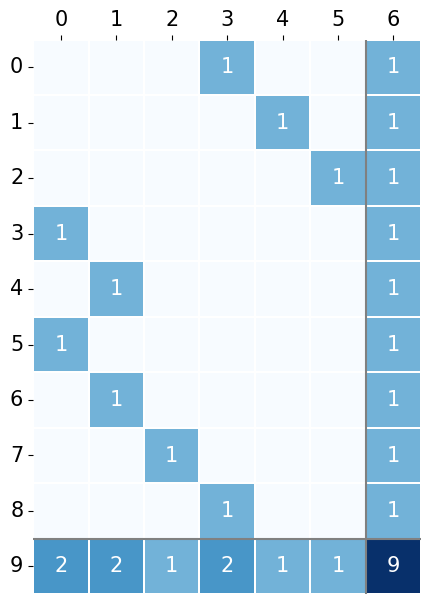

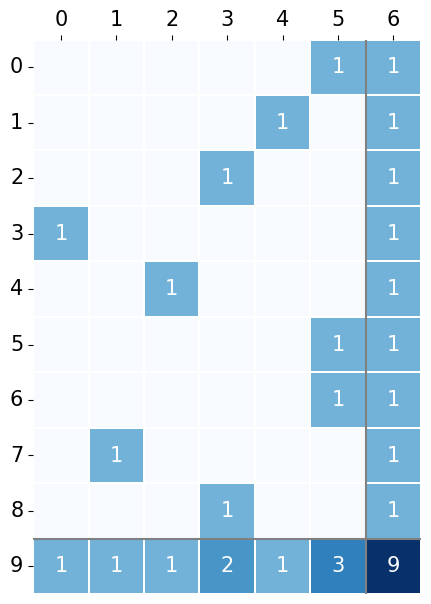

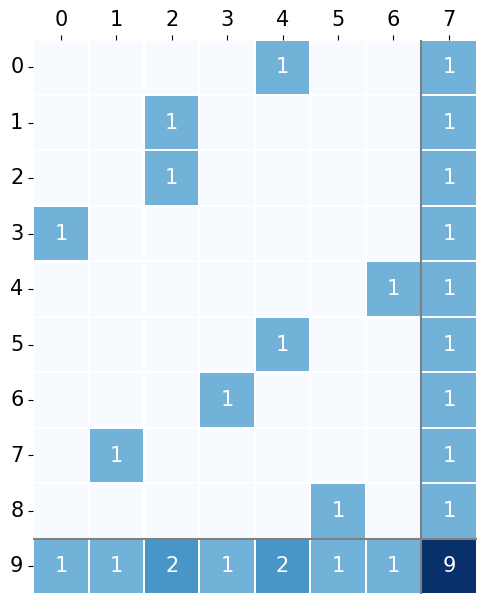

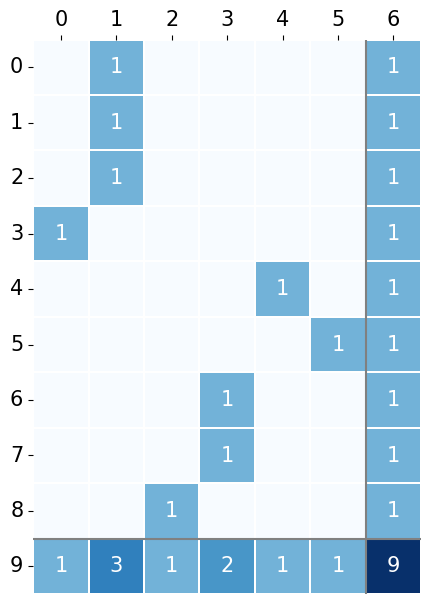

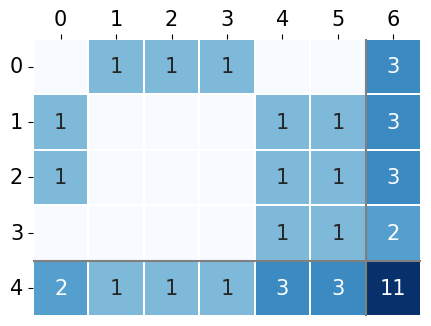

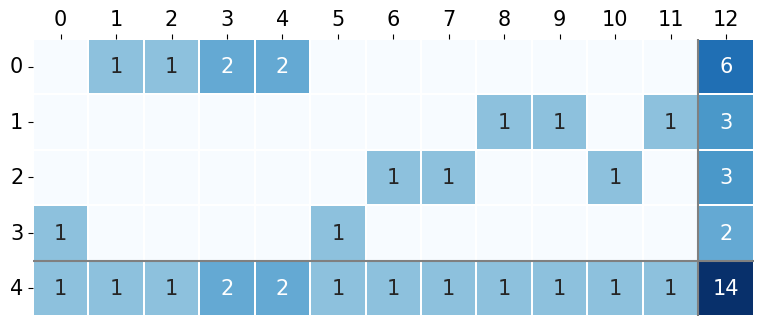

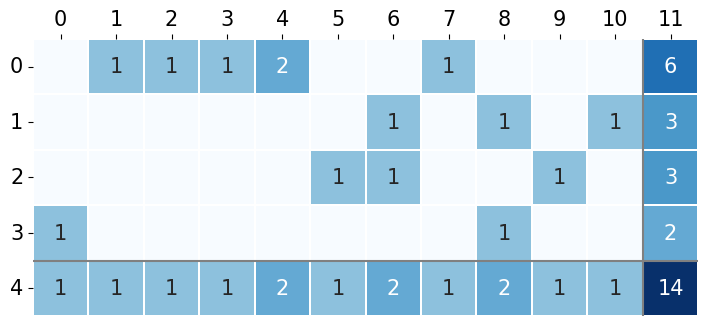

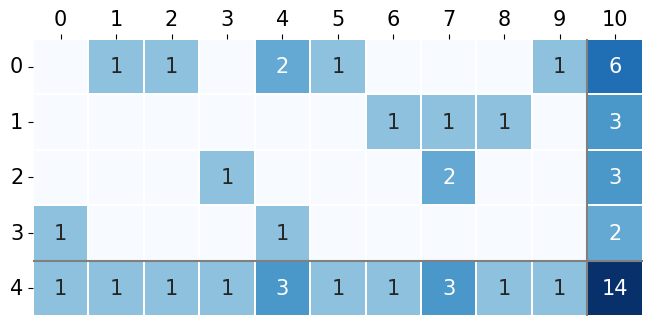

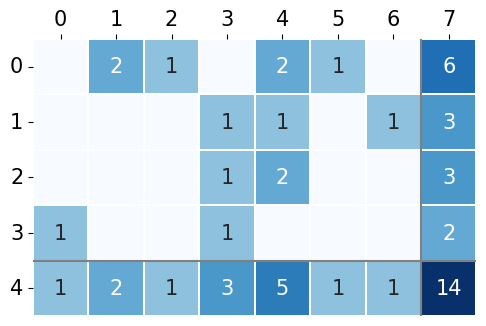

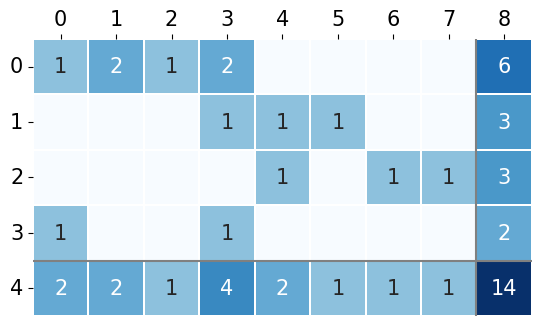

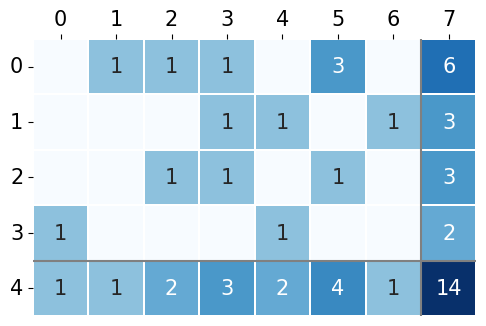

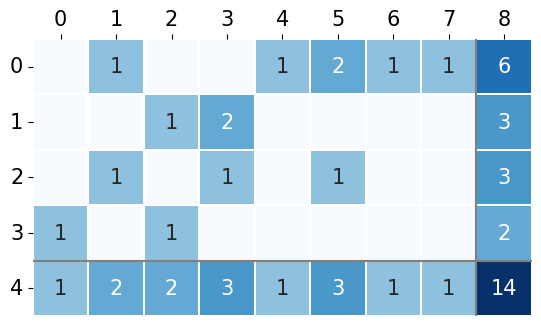

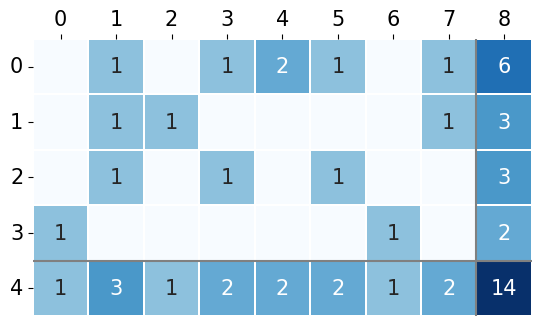

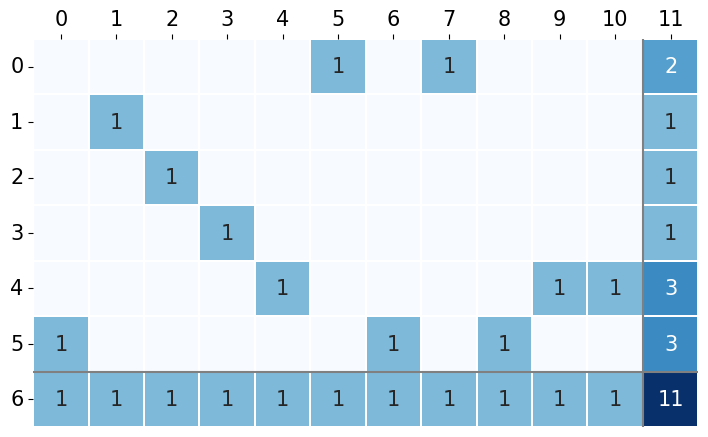

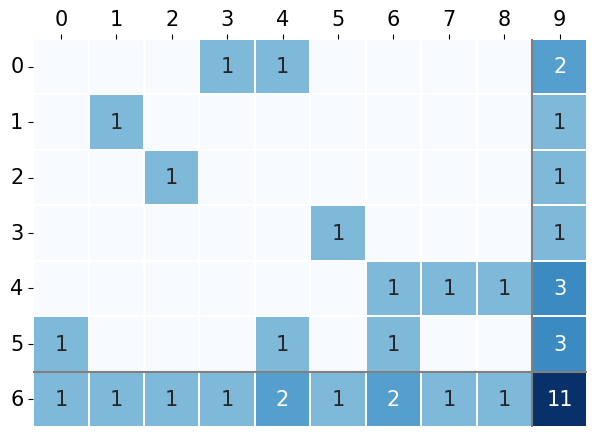

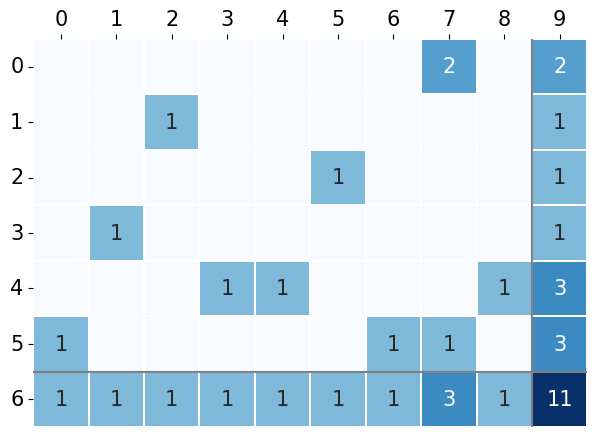

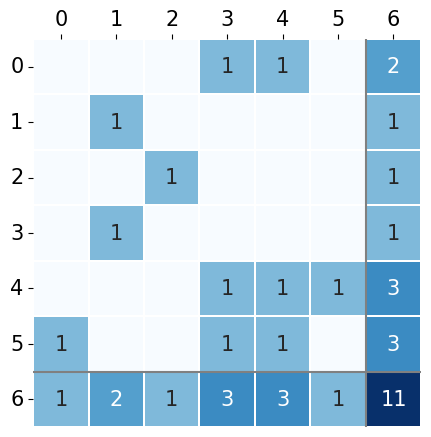

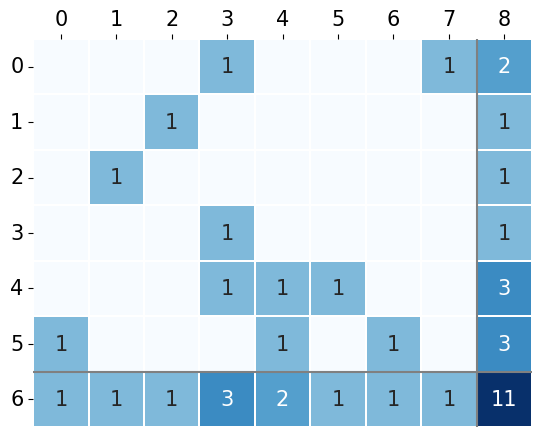

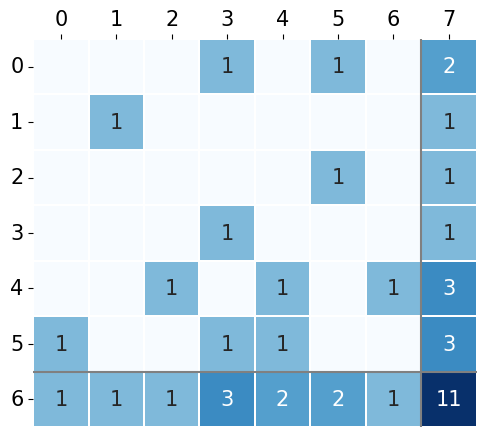

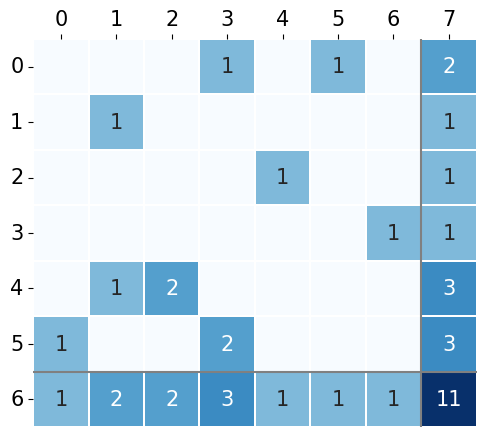

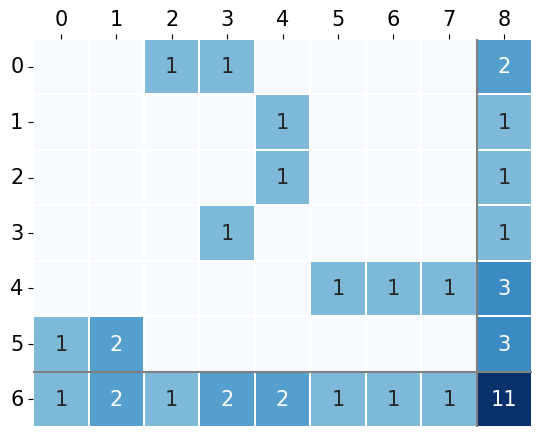

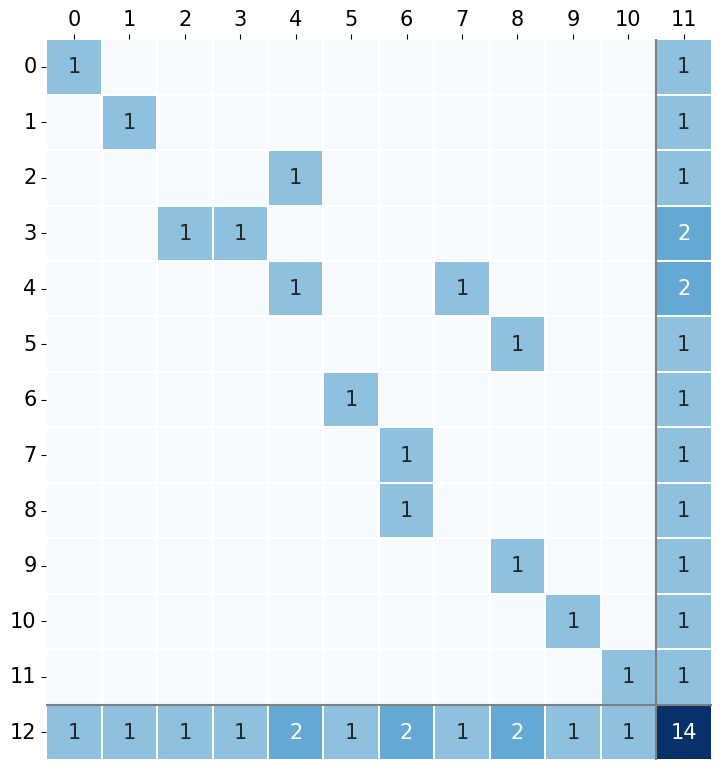

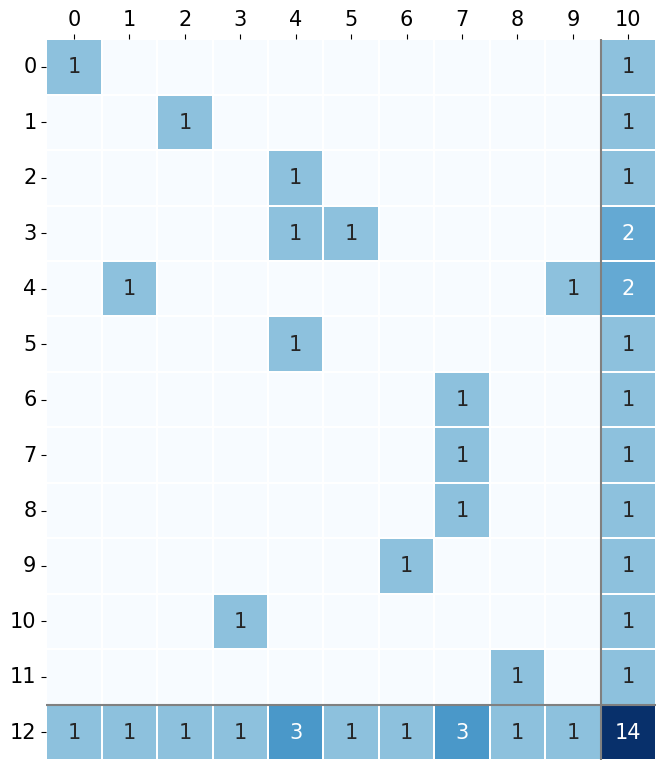

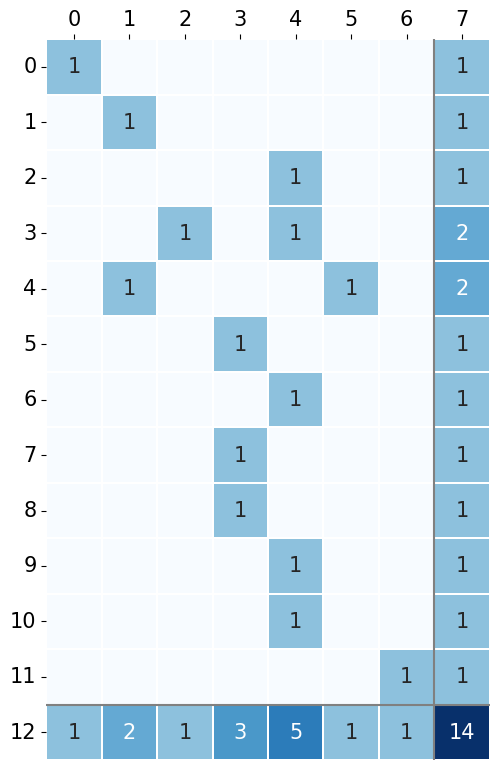

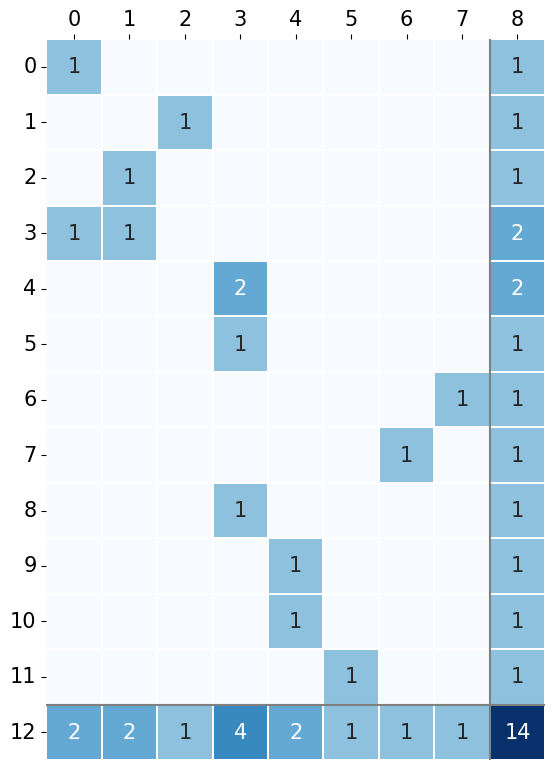

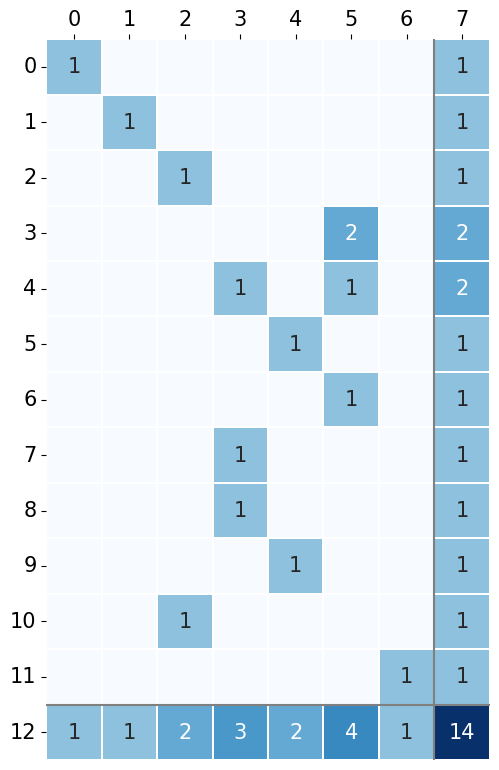

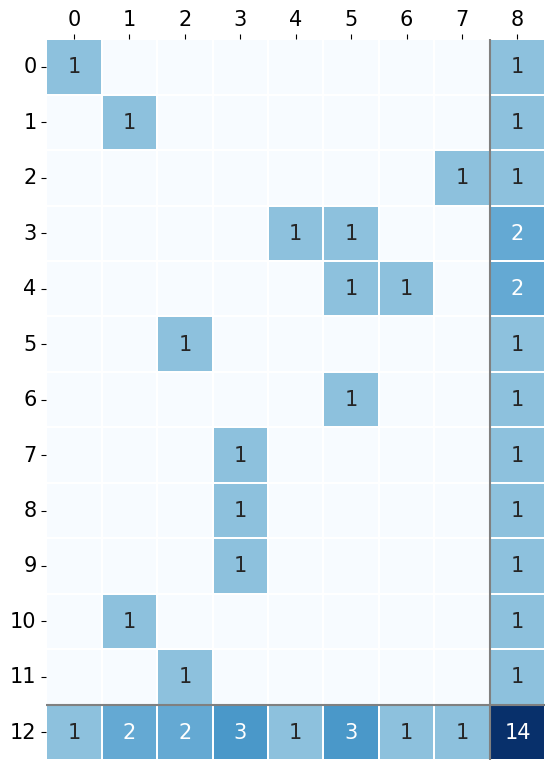

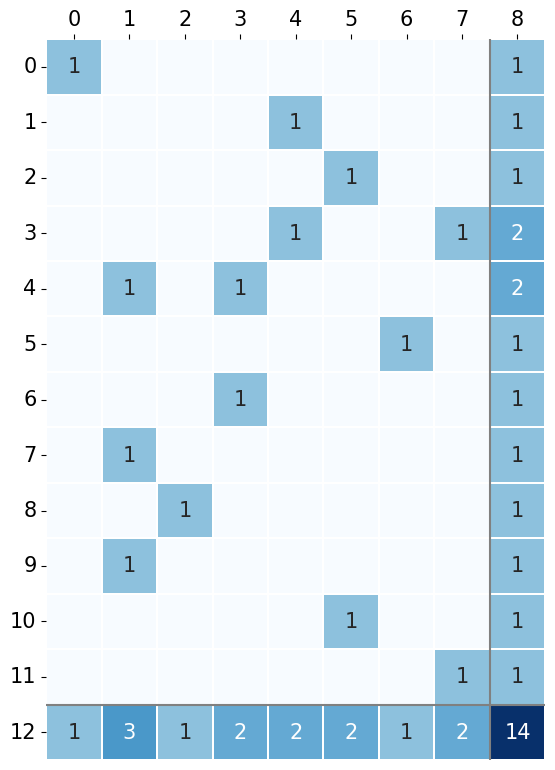

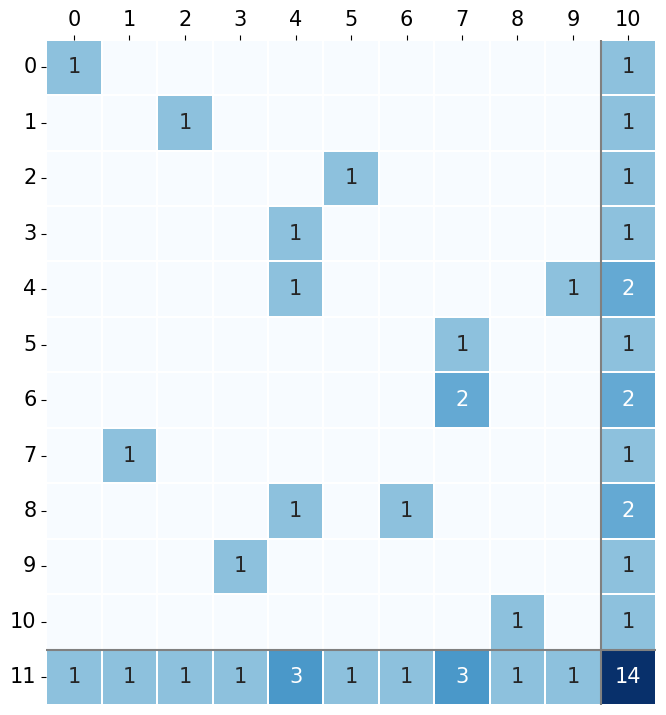

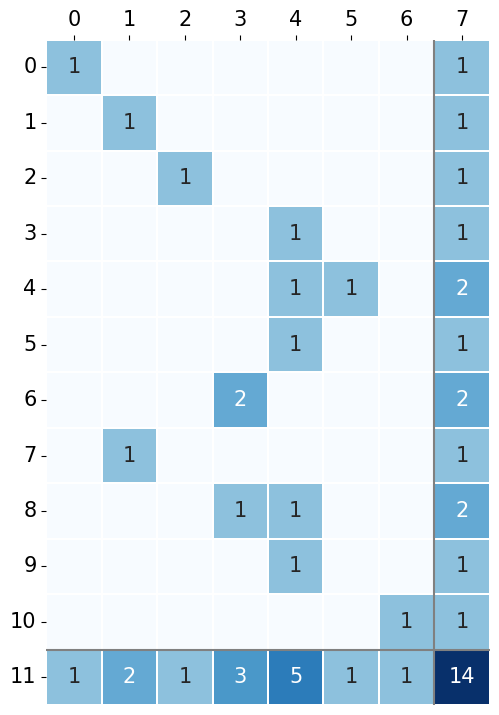

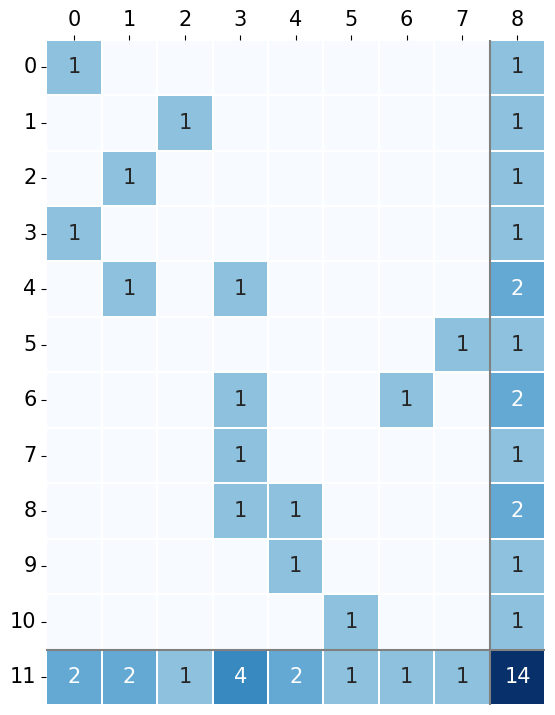

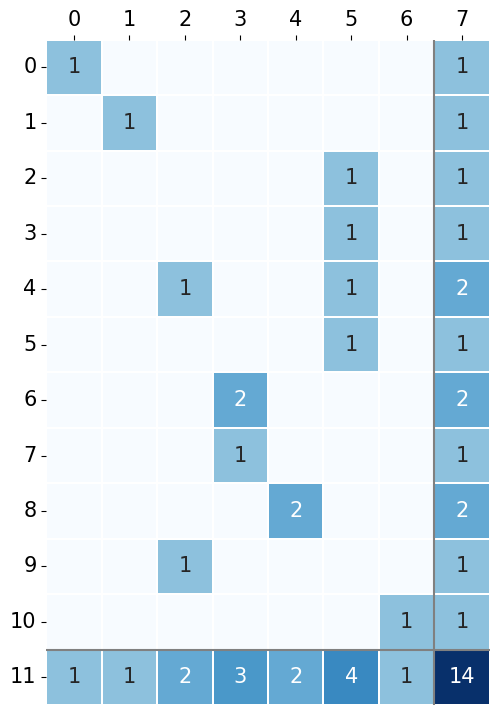

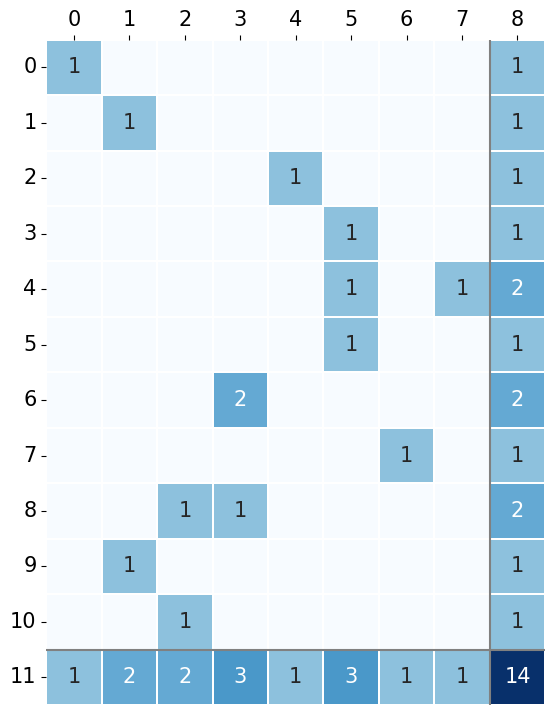

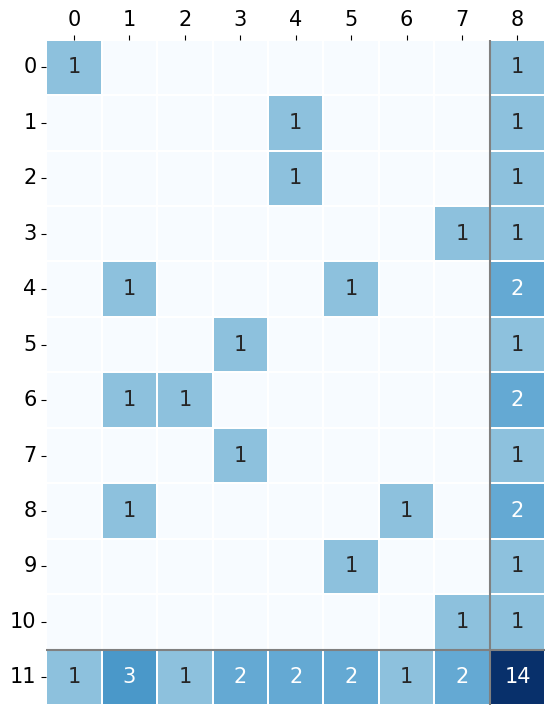

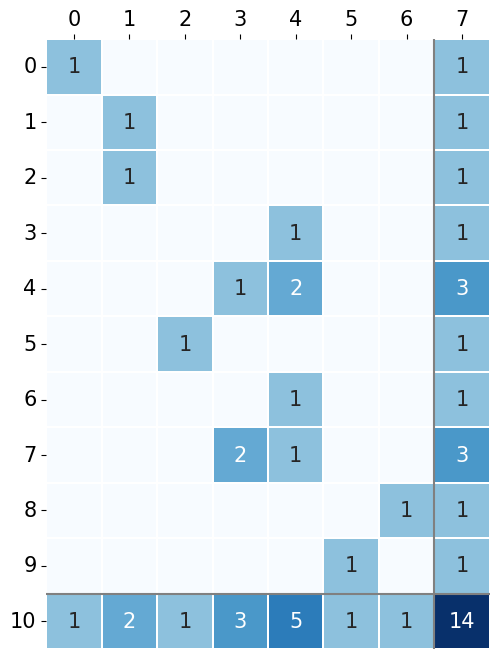

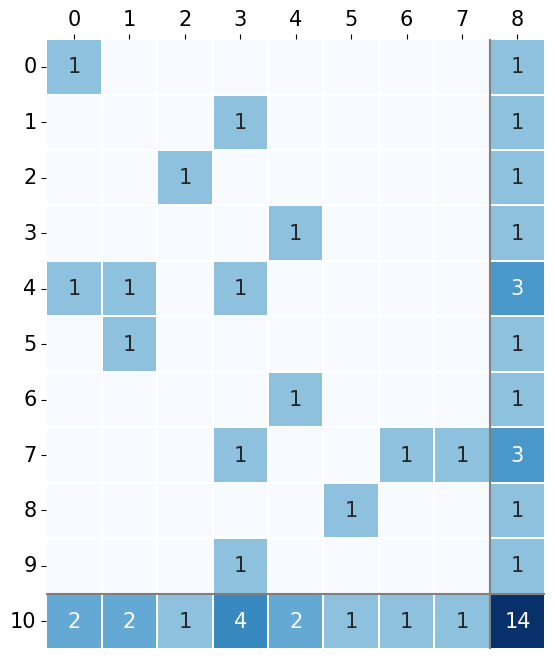

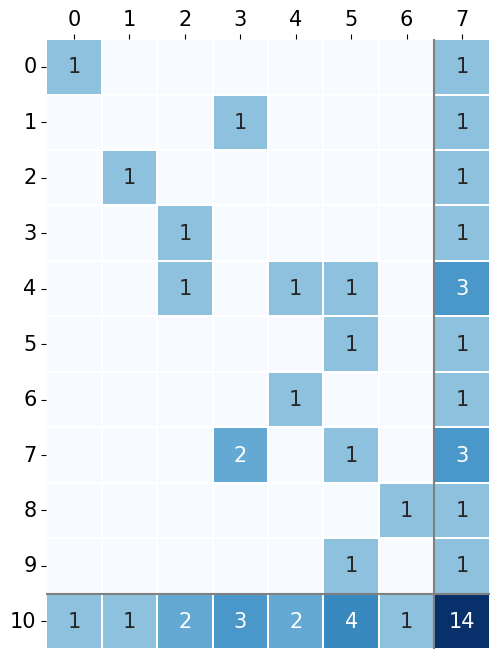

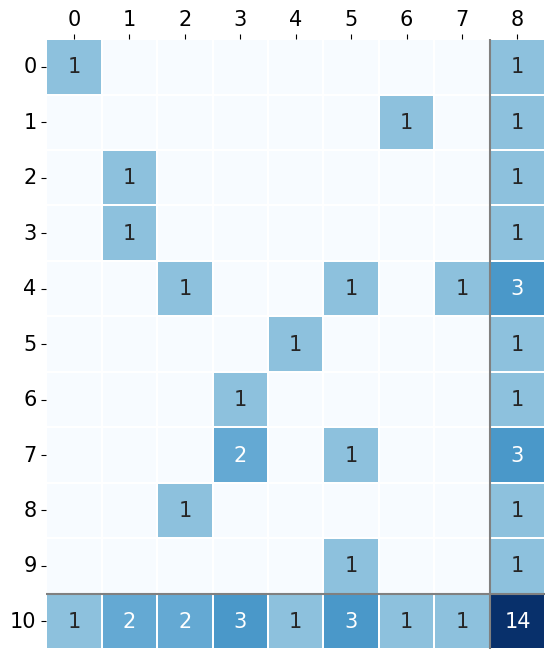

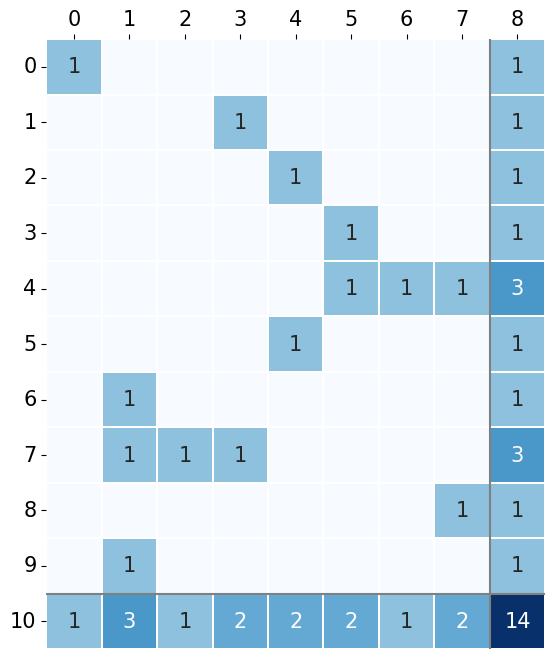

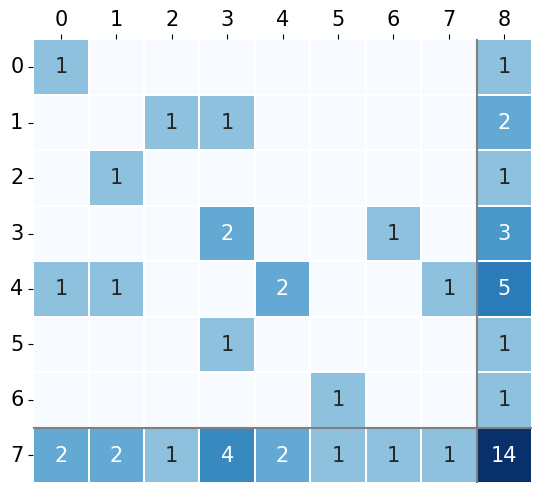

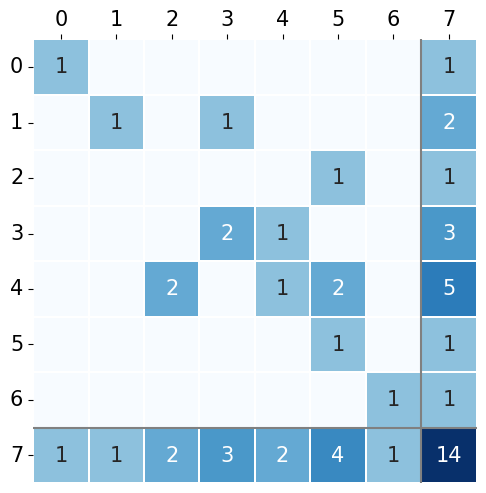

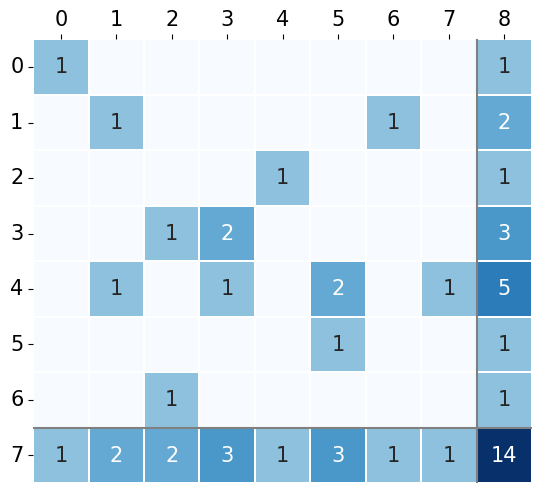

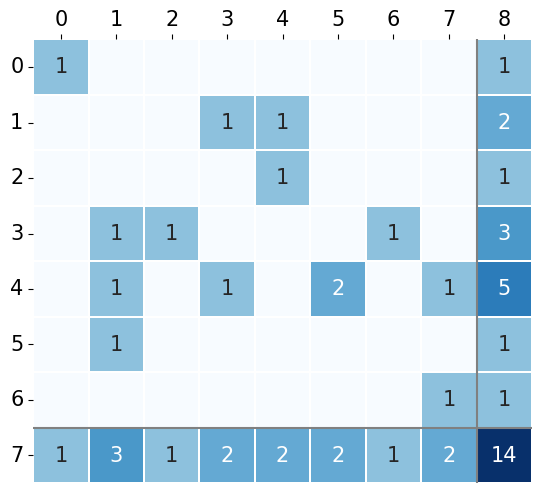

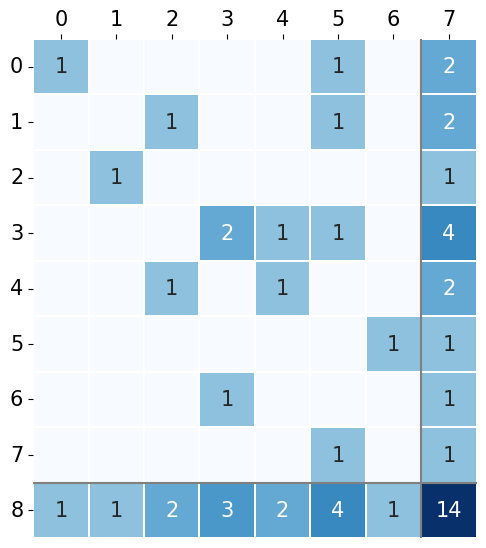

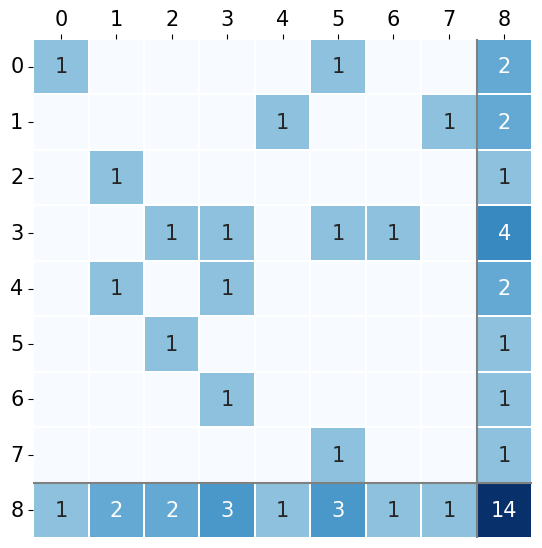

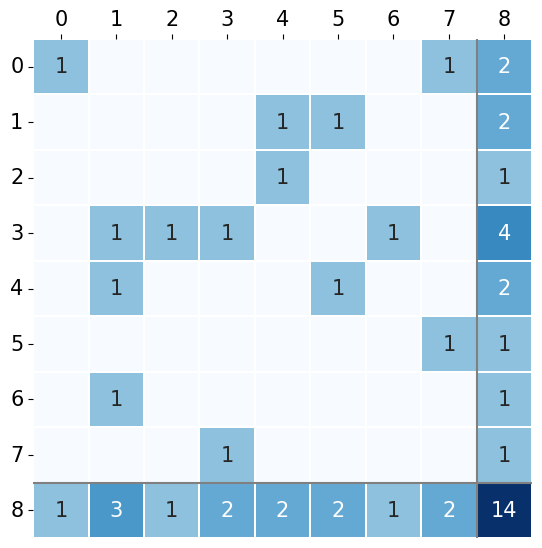

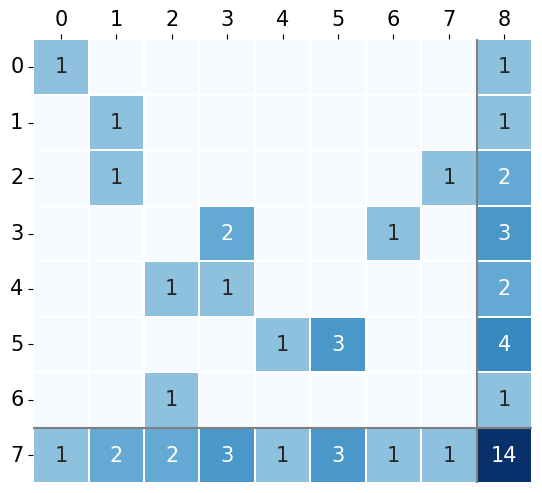

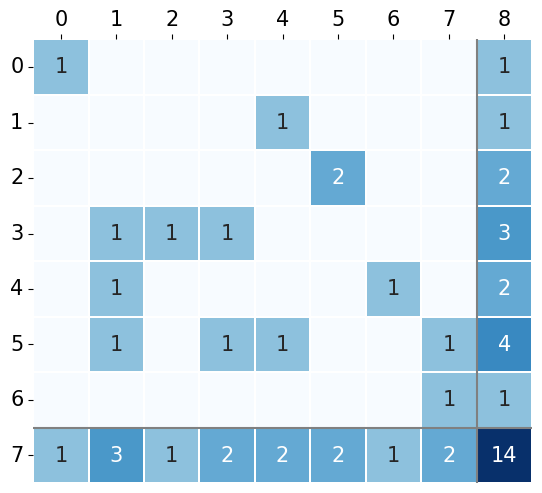

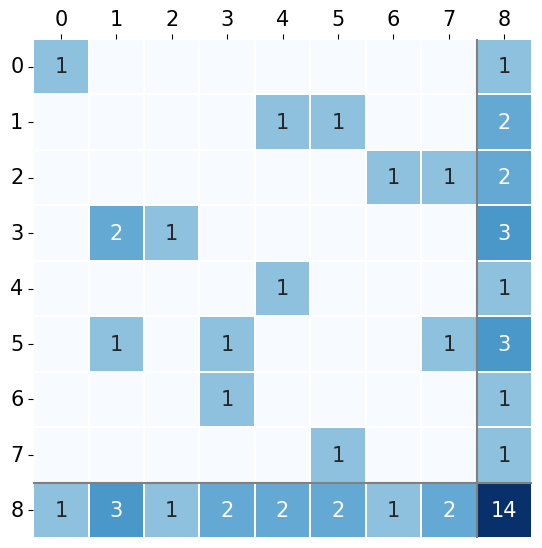

# Multivariate analysis<a id='6828f38c-2010-4949-a123-6a49dc423c74'>
---

## Principal Component Analysis<a id='050a75b9-28fe-408e-9210-8a6ebb3048d7'>

### First vs second principal component

Explained variance ratio: 100.00%


### Explained variance ratio

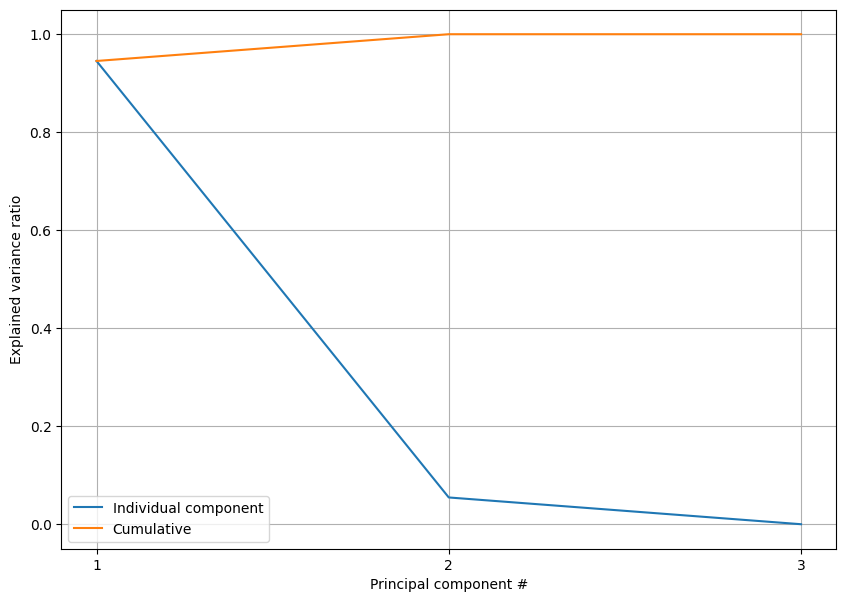

## Parallel coordinates<a id='d15571b3-763f-452d-be47-2b876c6885df'>

## Parallel categories<a id='f2d2d2d1-6935-4f10-b504-e0fd786d2bd3'>

In [8]:
report = edvart.DefaultReport(df)
report.show()

# Learning Utility

In [8]:
def learn_xgboost(X, y):
    parameters = {
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.5, 1, 1.5, 2, 2.5,],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
    }

    model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
    clf = GridSearchCV(
        model, 
        parameters, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        refit=True,
        n_jobs=-1)
    clf.fit(X, y)
    best_xgboost = clf.best_estimator_
    print(clf.best_score_)
    print(clf.best_params_)
    return best_xgboost

In [9]:
def explain(model, X=X, name="model", is_save=False, color_bar=False):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.plots.beeswarm(shap_values, max_display=20, plot_size=[10, 6], show=False, color_bar=color_bar)
    if is_save:
        plt.savefig(f'{artifacts_path}{name}_{version}_shap.png', bbox_inches='tight')
    plt.show()

# All vs RE

In [10]:
y_all = y.to_numpy().T.flatten()
X_all = pd.concat([X]*y.shape[1])

-8.130154647374813
{'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}


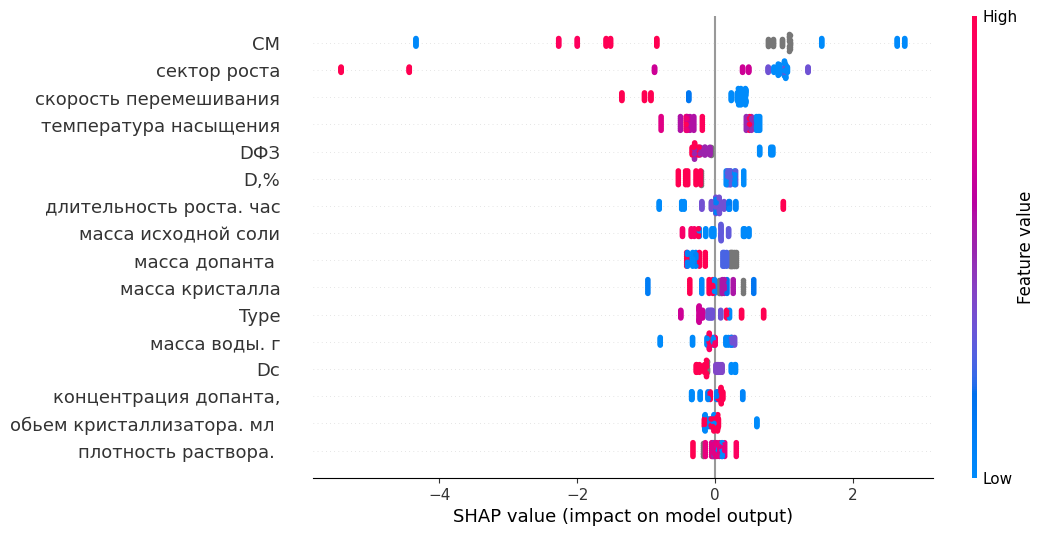

In [11]:
best_model = learn_xgboost(X_all, y_all)
explain(best_model, X=X_all, name="Mix", is_save=True, color_bar=True)

# Mushrooms and bacteria vs RE

In [12]:
y_bacteria = y[['D1', 'D2', 'D3', 'D4', 'D5']].to_numpy().T.flatten()
X_bacteria = pd.concat([X]*5)
y_mushrooms = y[['D6', 'D7', 'D8']].to_numpy().T.flatten()
X_mushrooms = pd.concat([X]*3)

-2.9931823185511996
{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.6}


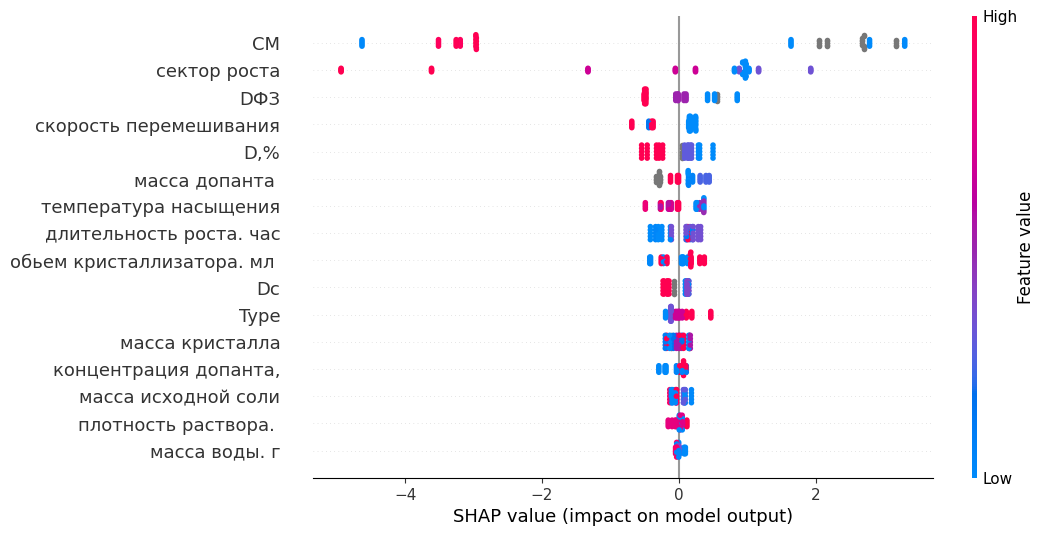

In [13]:
best_model = learn_xgboost(X_bacteria, y_bacteria)
explain(best_model, X=X_bacteria, name="Bacteria", is_save=True, color_bar=True)

-8.672193320592246
{'colsample_bytree': 1.0, 'gamma': 2.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}


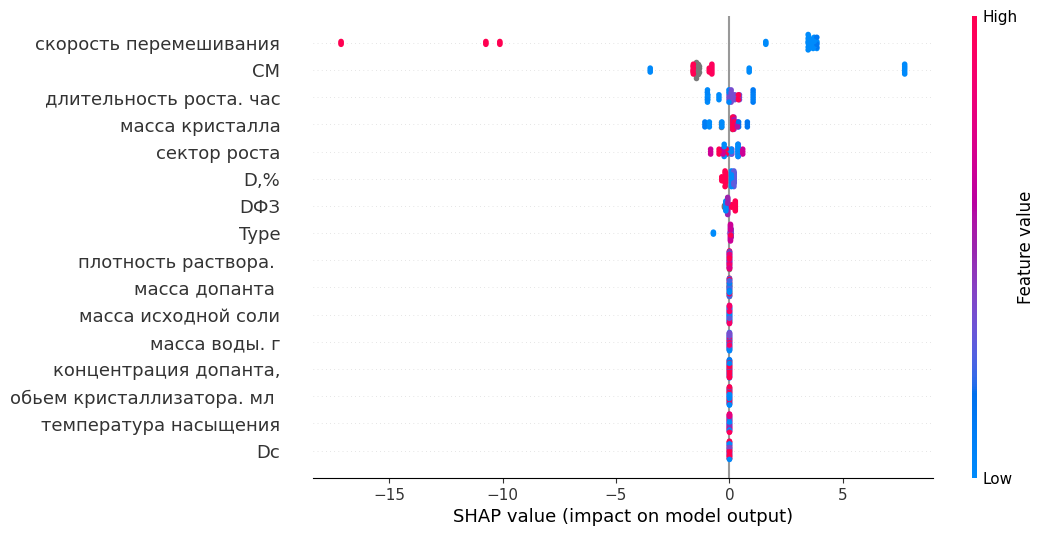

In [16]:
best_model = learn_xgboost(X_mushrooms, y_mushrooms)
explain(best_model, X=X_mushrooms, name="Mushrooms", is_save=True, color_bar=True)

# Individuals vs RE

D1


-1.6475921630859376
{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}


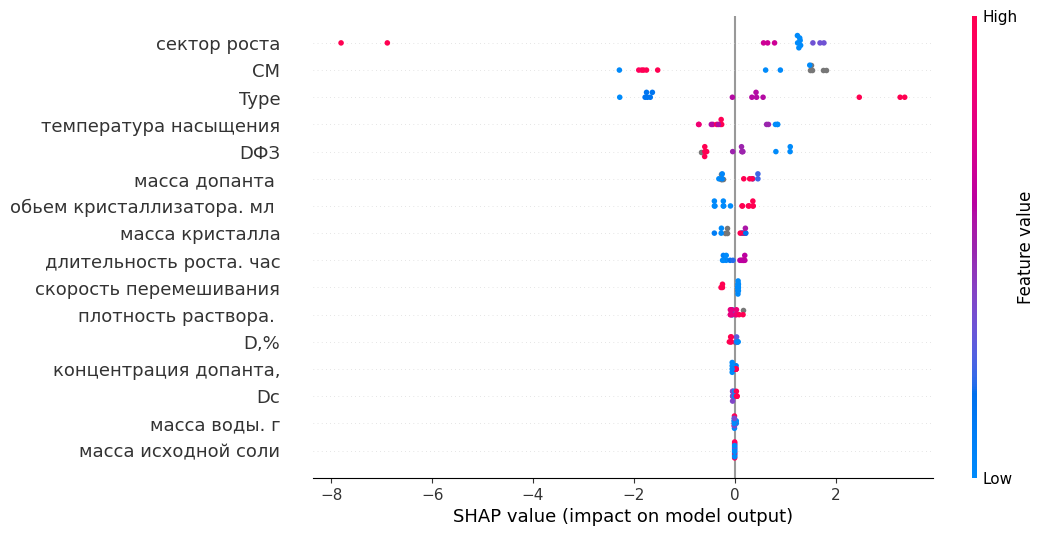

D2
-2.3597272237141924
{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}


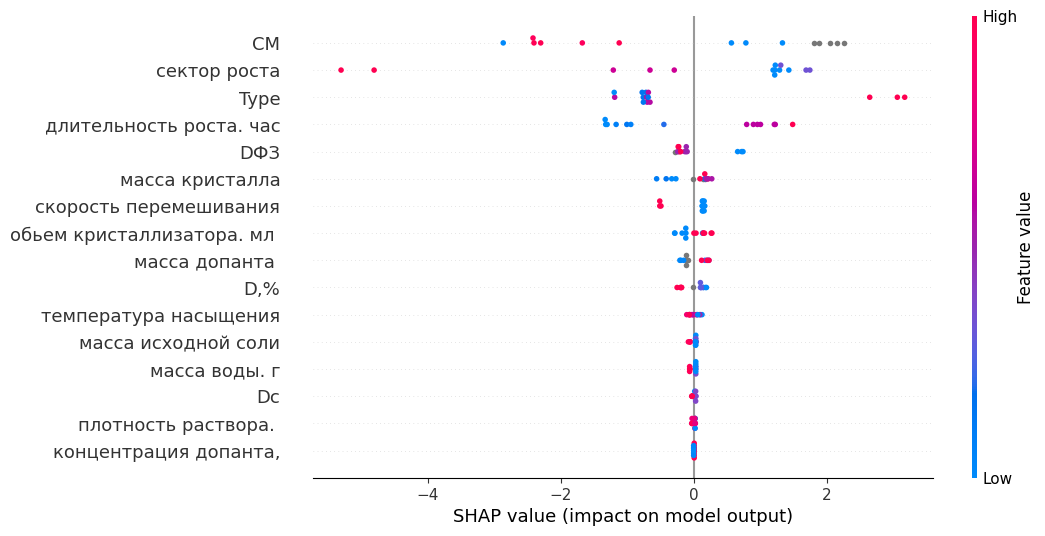

D3
-5.474114354451498
{'colsample_bytree': 0.8, 'gamma': 2.5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.6}


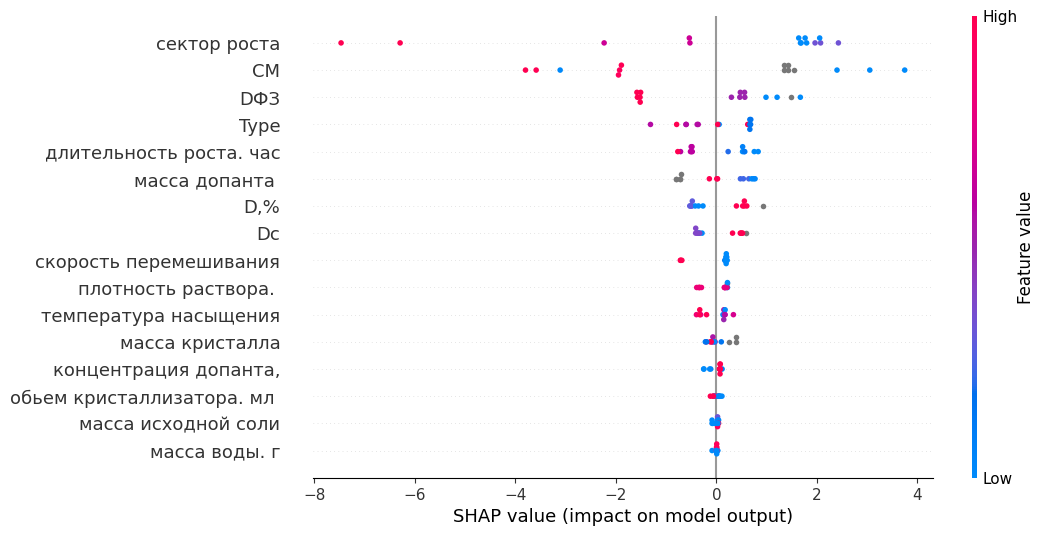

D4
-3.493939463297526
{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 1.0}


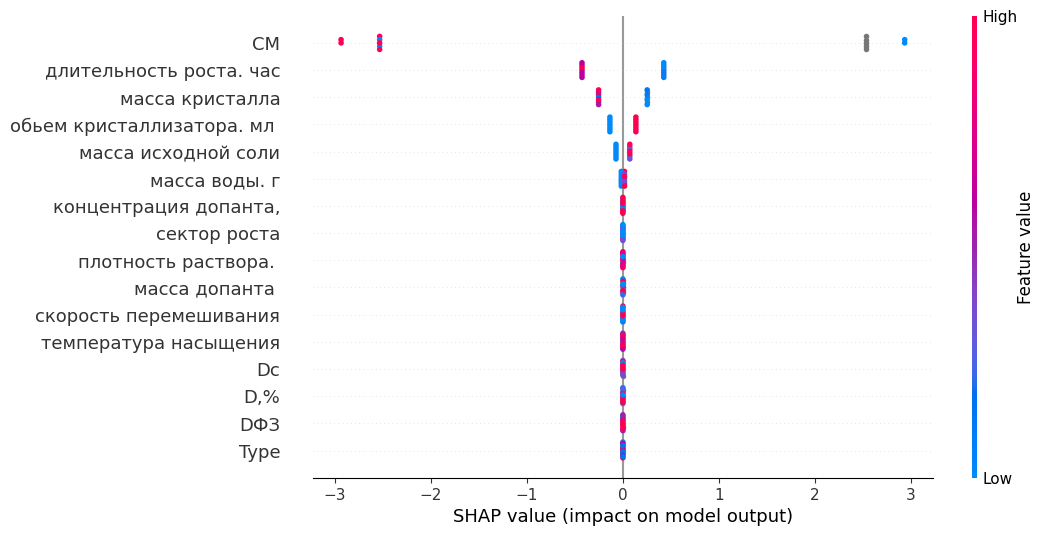

D5
-3.8746602376302084
{'colsample_bytree': 0.6, 'gamma': 2.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}


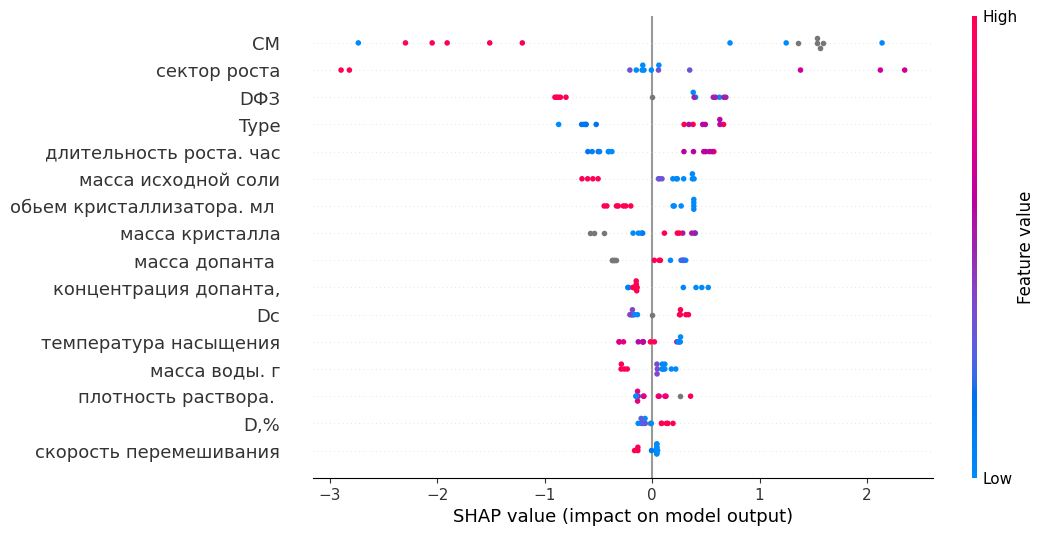

D6
-3.2139930725097656
{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 0.6}


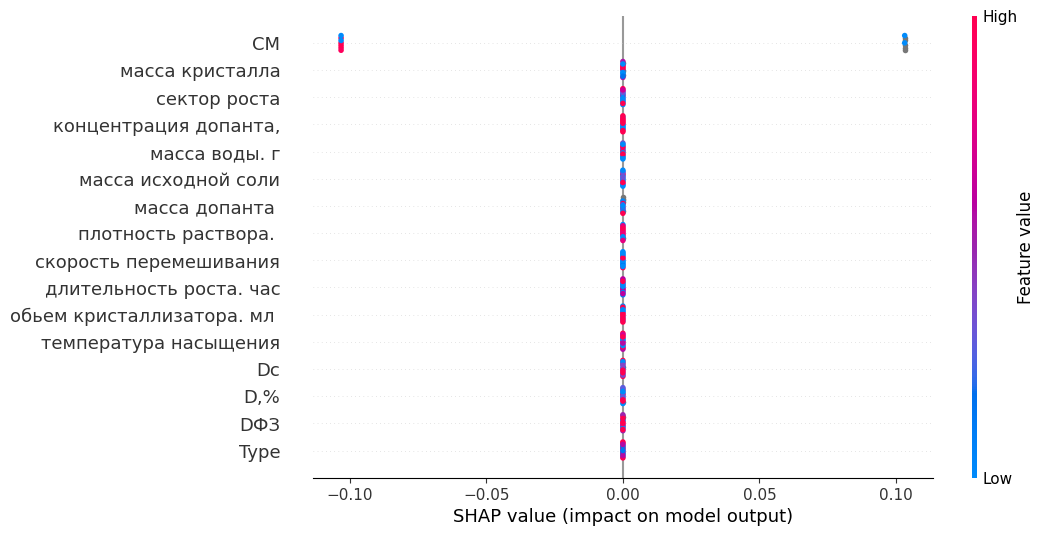

D7
-5.032611083984375
{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}


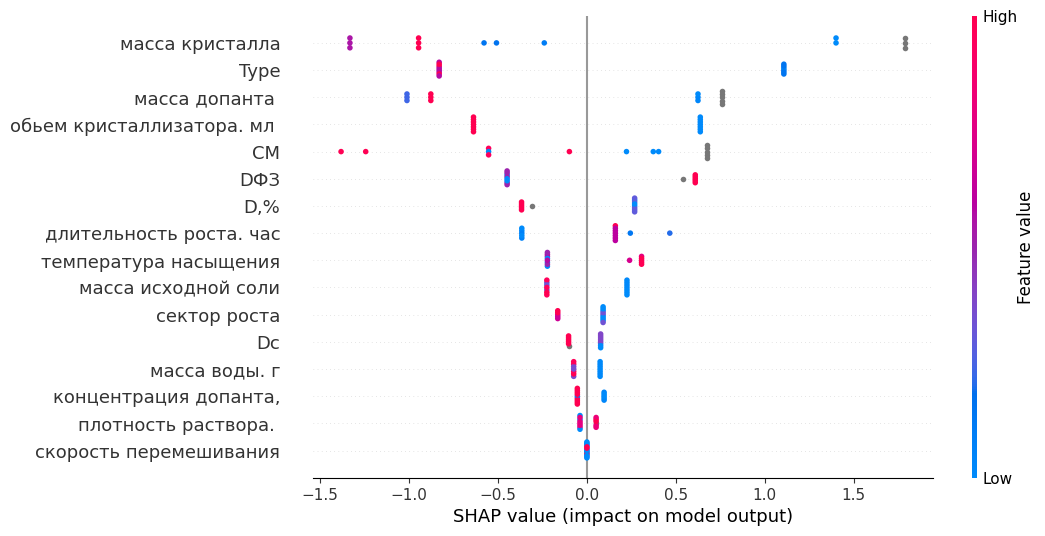

D8
-7.6560628255208325
{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}


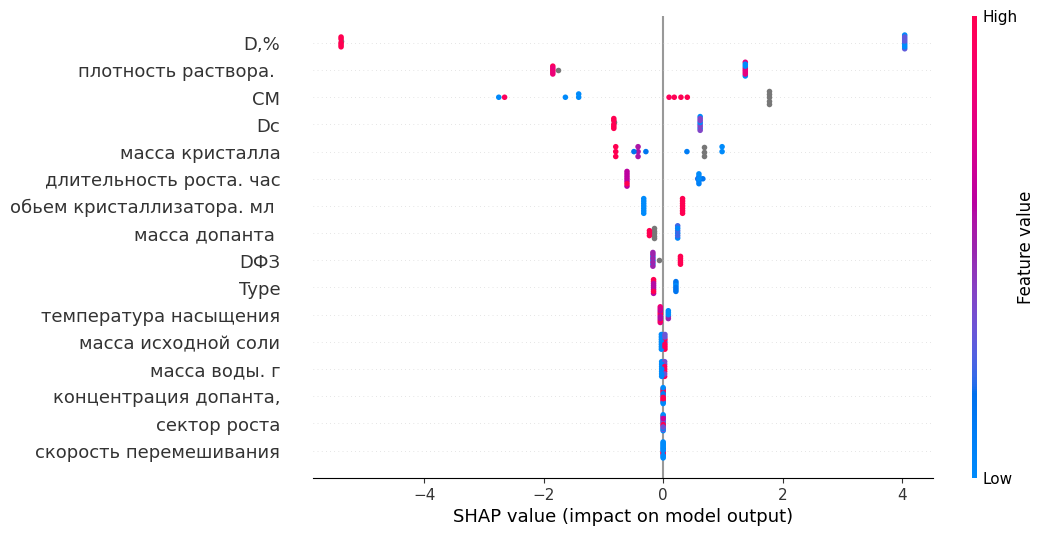

In [23]:
for col in y:
    print(col)
    best_model = learn_xgboost(X, y[col])
    explain(best_model, name=col, is_save=True, color_bar=True)